In [104]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from matplotlib.gridspec import GridSpec
from matplotlib import ticker


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

Doing the shifts for the spectra in a separate notebook

In [2]:
path = '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/'
x1ds = np.hstack((glob.glob('{}shifts/*x1d.fits'.format(path)), glob.glob('{}shifts/*sx1.fits'.format(path))))
x1ds

array(['/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo27010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo27020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo27040_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo28010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo27030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo28020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo28030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo28040_sx1.fits'],
      dtype='<U75')

Gaussian
[1.49548493e-16 5.21856086e-16 1.59880898e-01 1.69839766e-01]
101.01639137061001 km / s 39.72741575096366


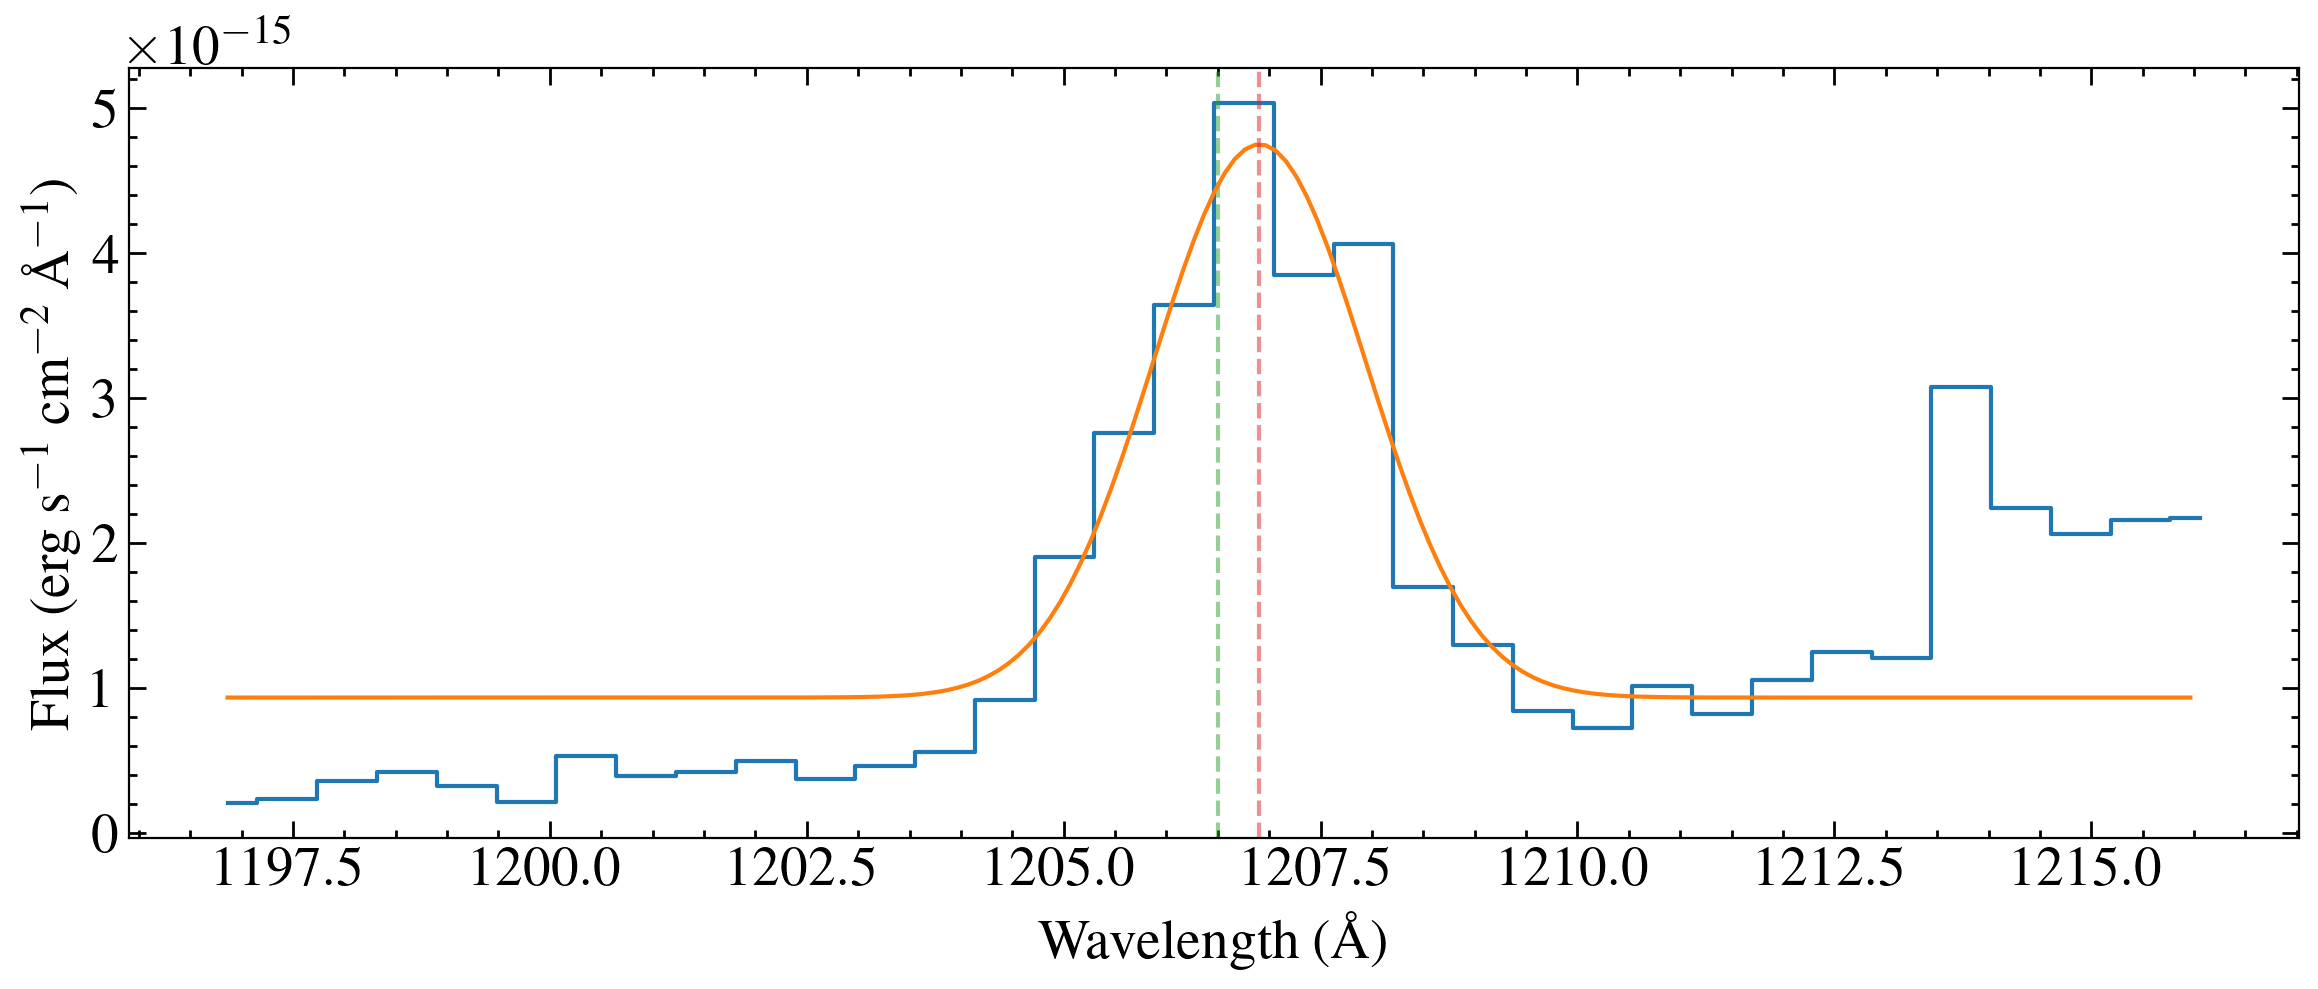

Gaussian
[1.53257654e-17 5.46165444e-17 4.98065421e-02 5.31523780e-02
 5.74538415e-17 1.08933832e-01]
104.92090949190785 km / s 12.053093774311556


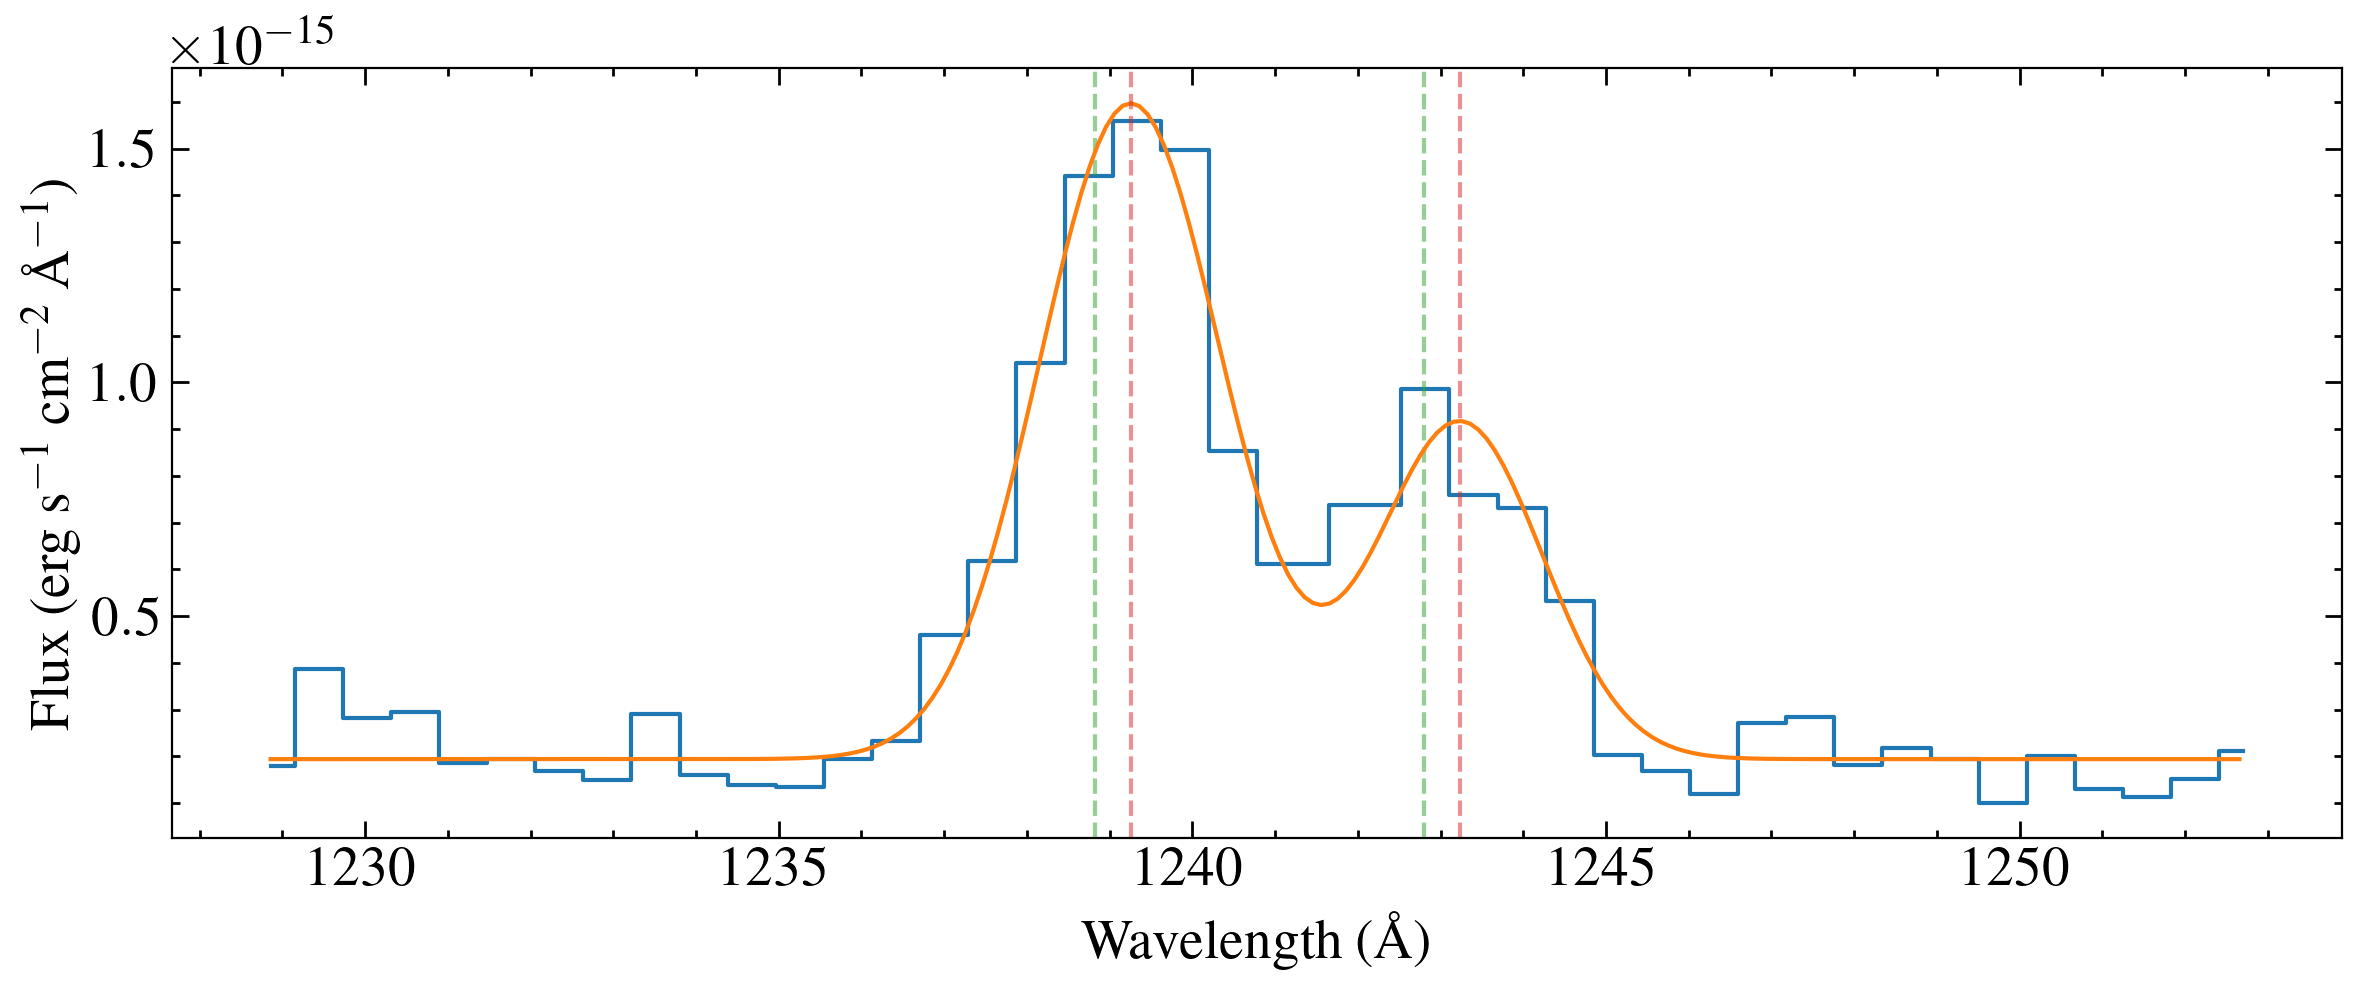

Gaussian
[4.07154144e-17 1.62017712e-16 4.77647218e-02 5.00462496e-02
 1.45528716e-16 1.04930879e-01]
104.11816396509158 km / s 10.274046272971376


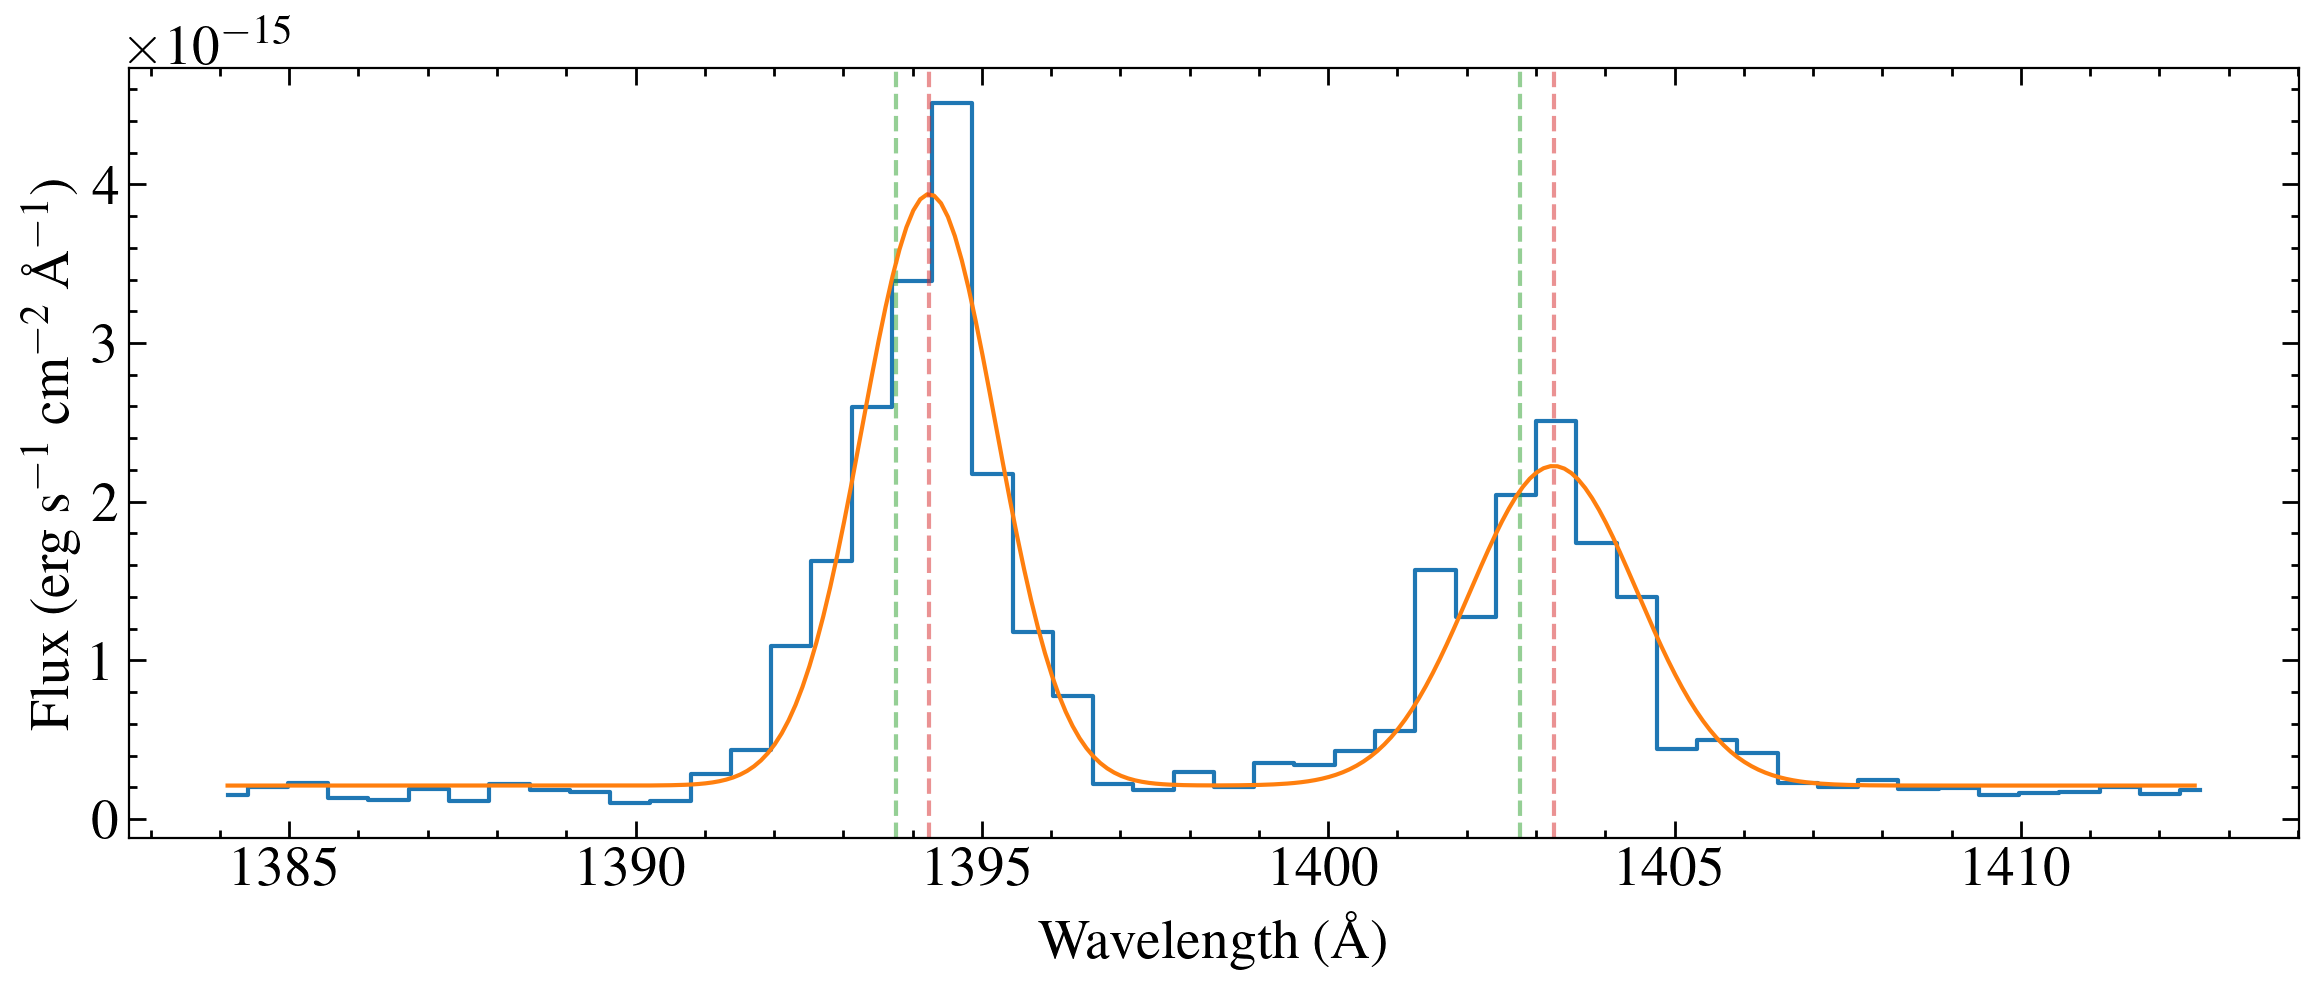

Gaussian
[9.81399268e-17 4.01940593e-16 3.76940478e-02 3.91917258e-02
 4.59552399e-16 5.37678518e-02]
82.56855520897389 km / s 7.299046588763147


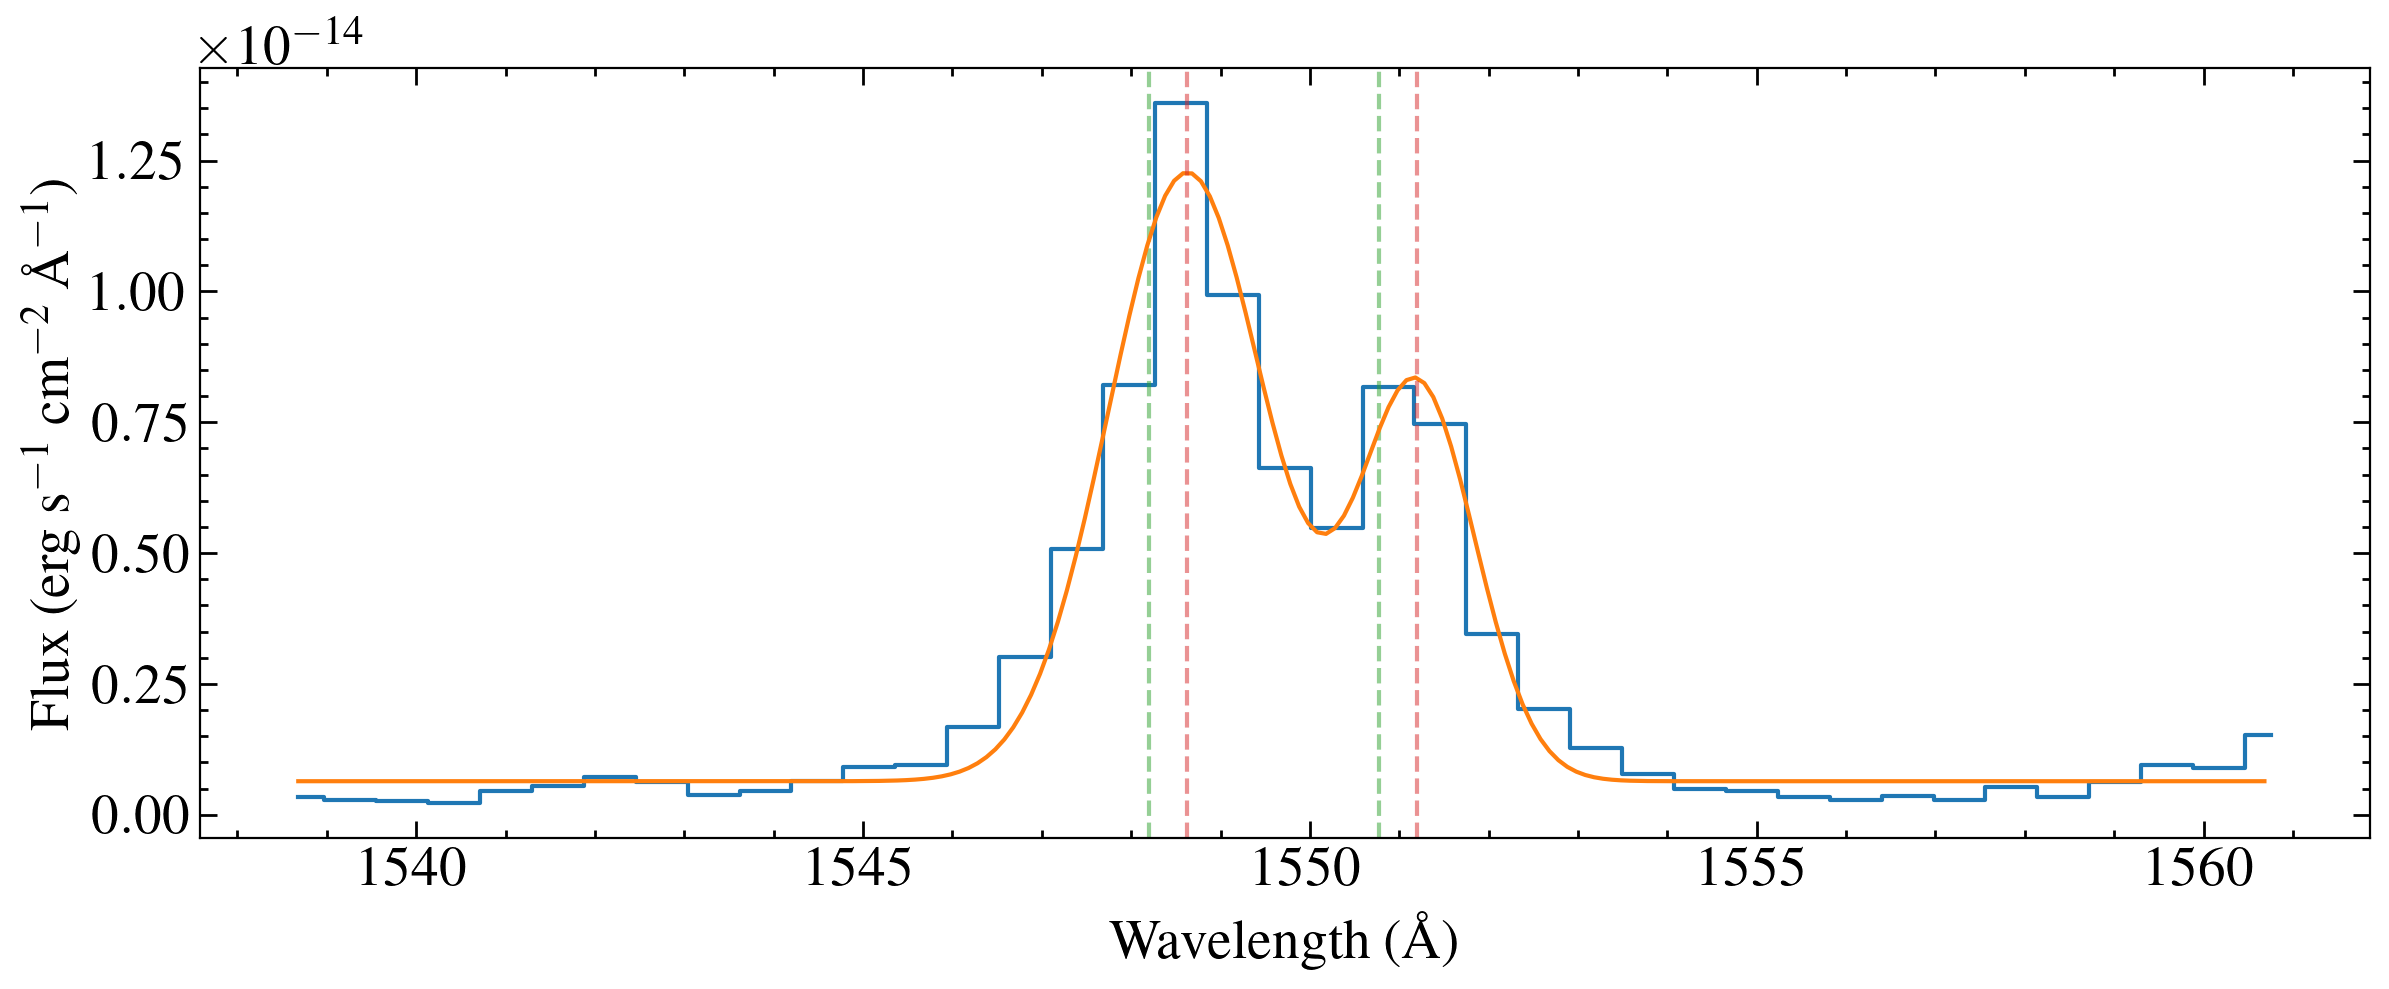

Gaussian
[1.12589960e-16 4.92631549e-16 3.47300238e-02 3.60996956e-02]
64.24574603834357 km / s 6.347032595795458


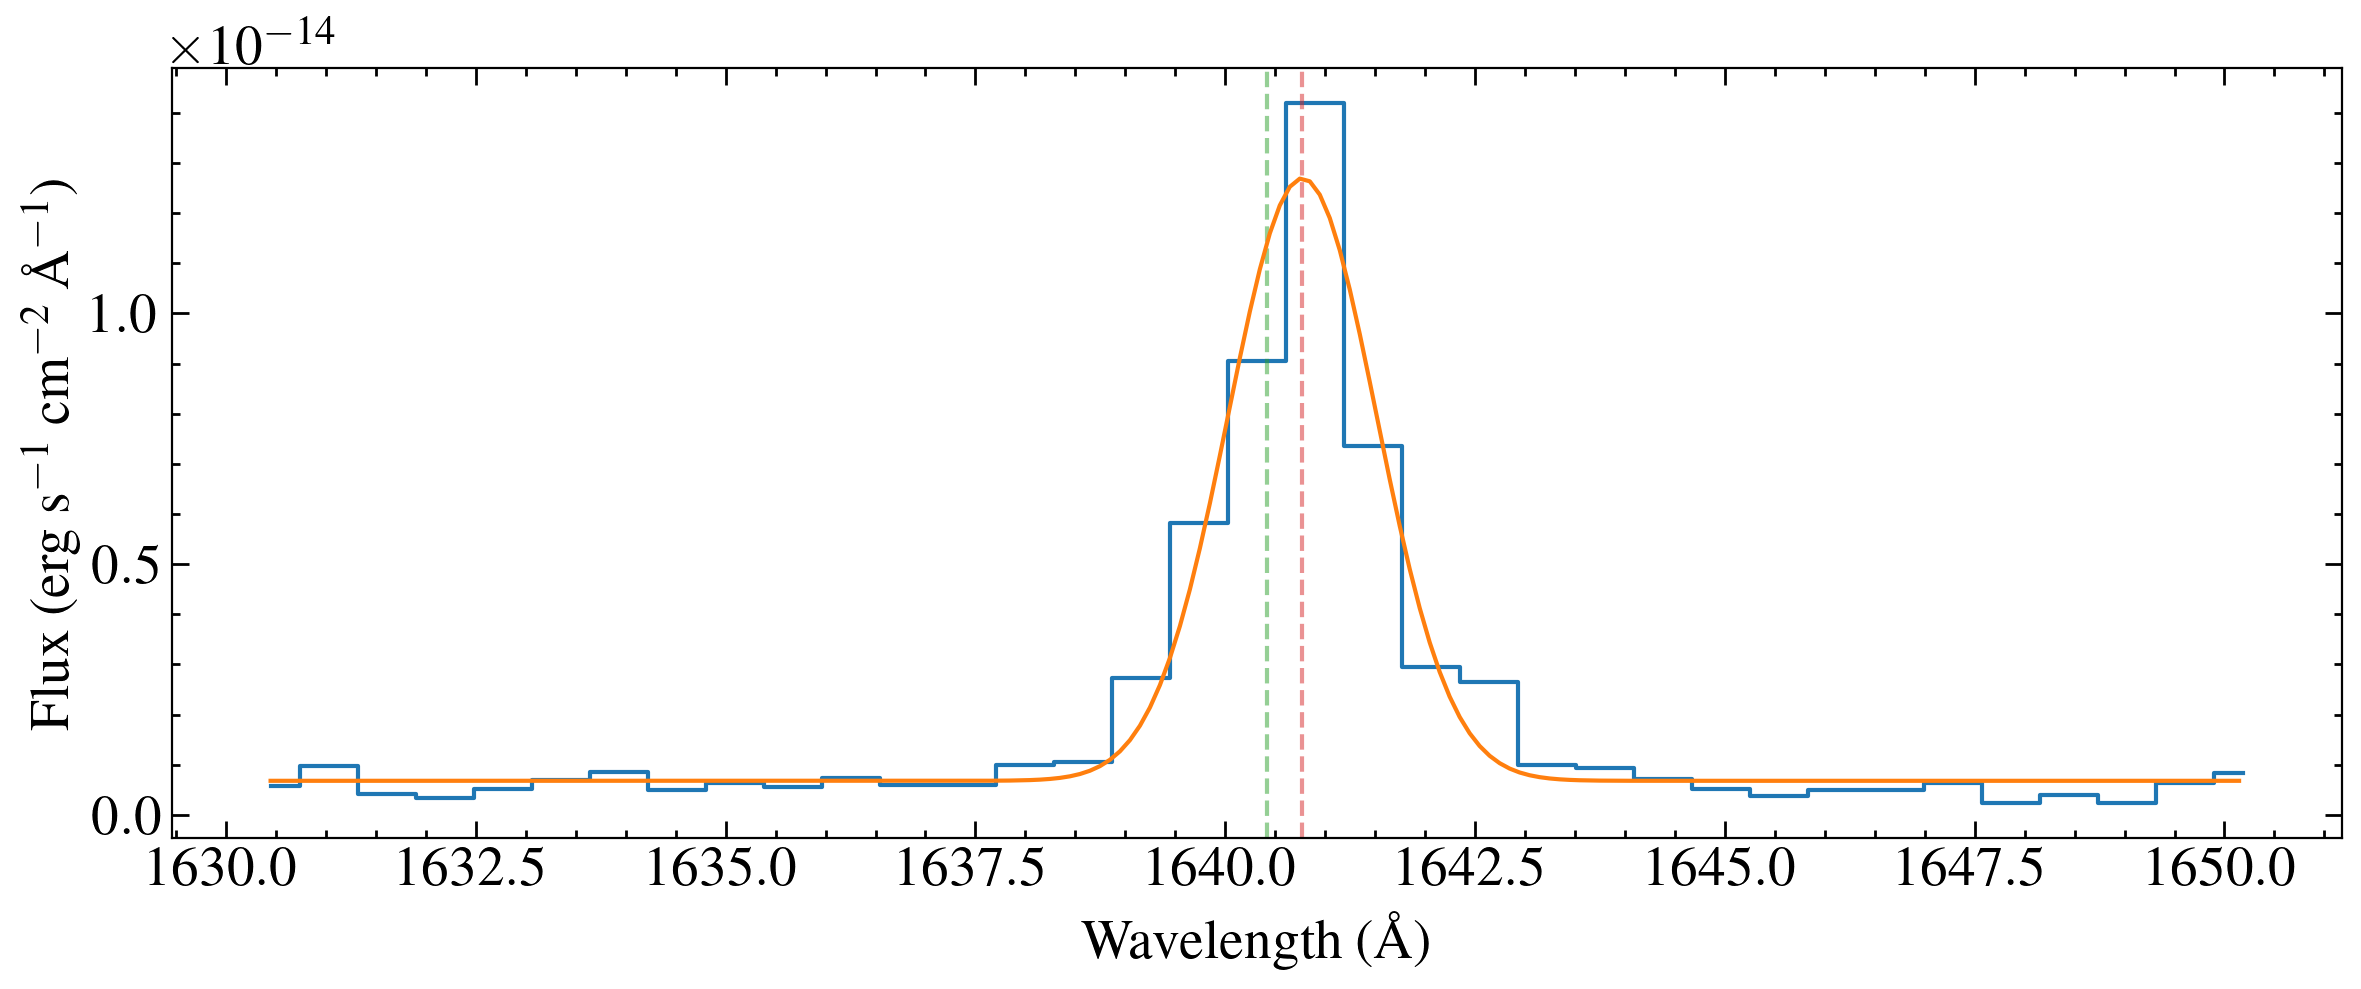

91.37395321498539 101.01639137061001 15.826472786190159


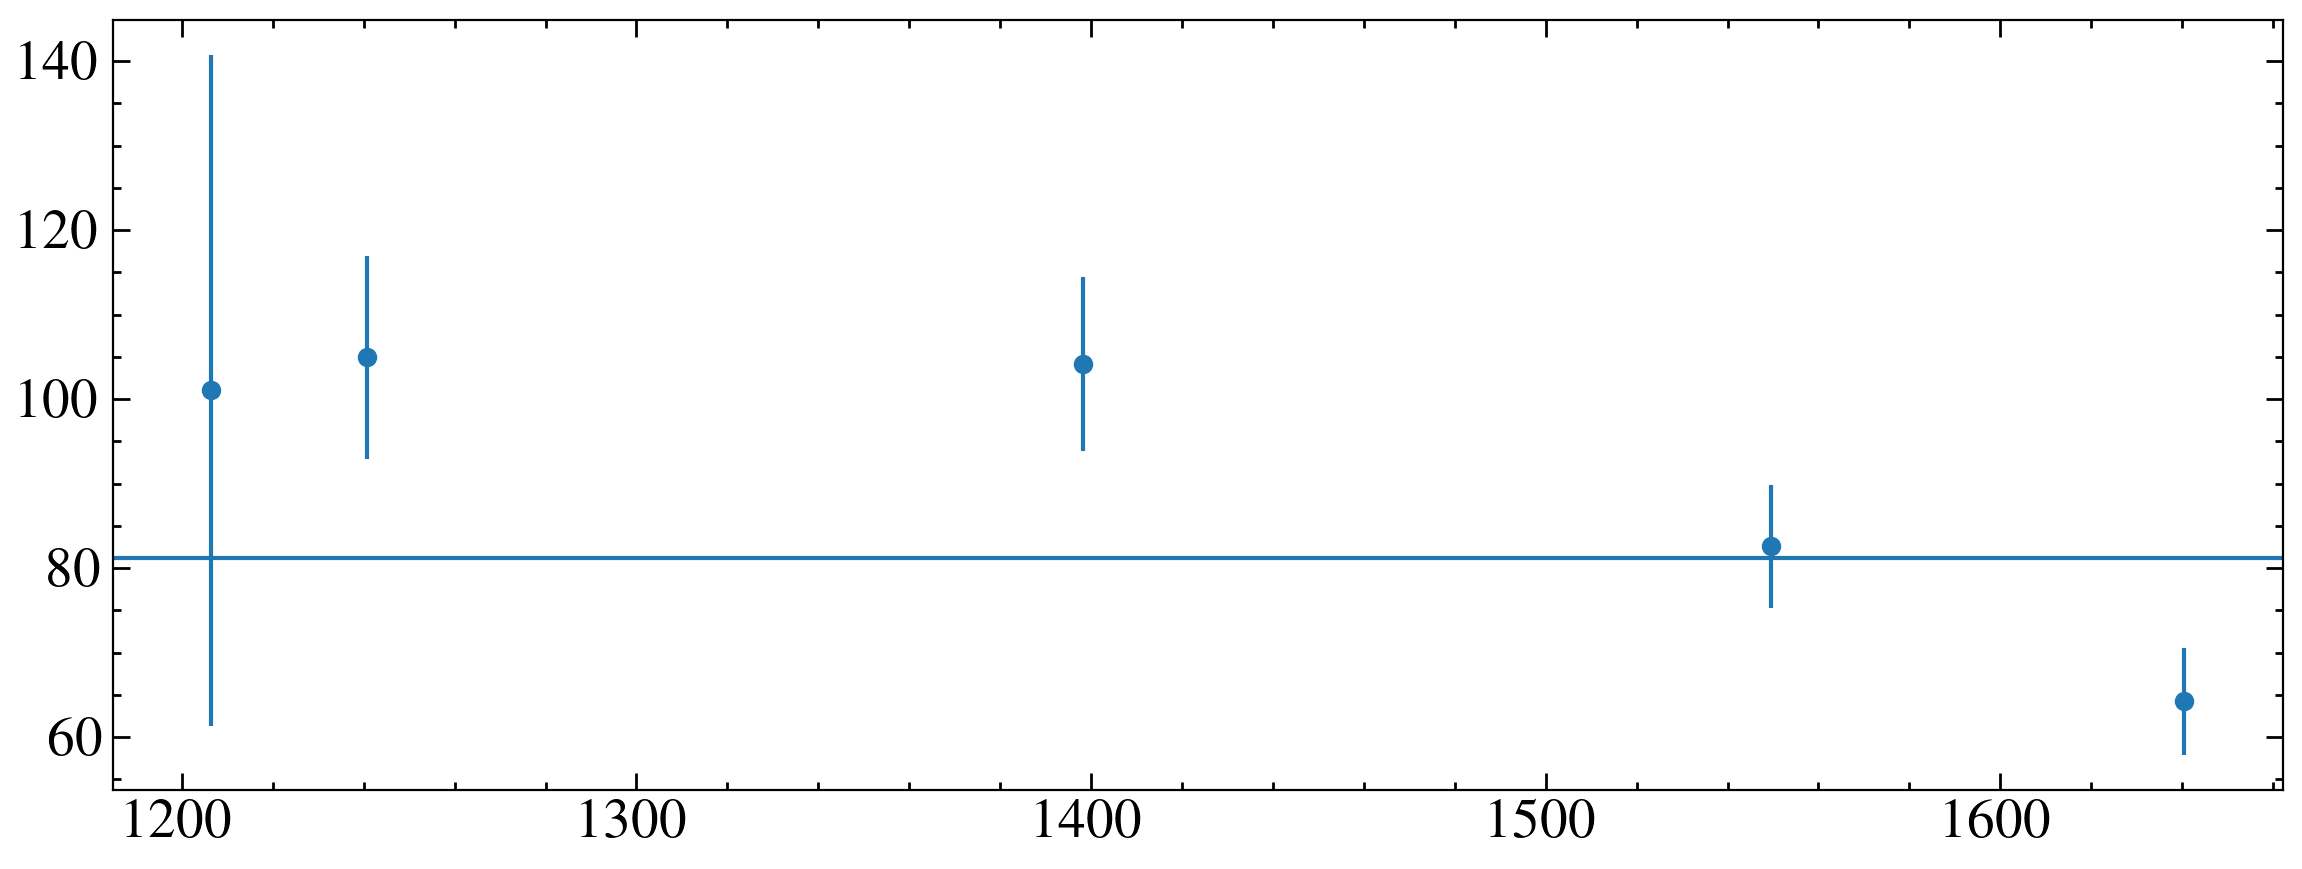

Gaussian
[1.25649887e-16 4.64669743e-16 1.25911347e-01 1.32885206e-01]
76.33127496443622 km / s 31.286617004456126


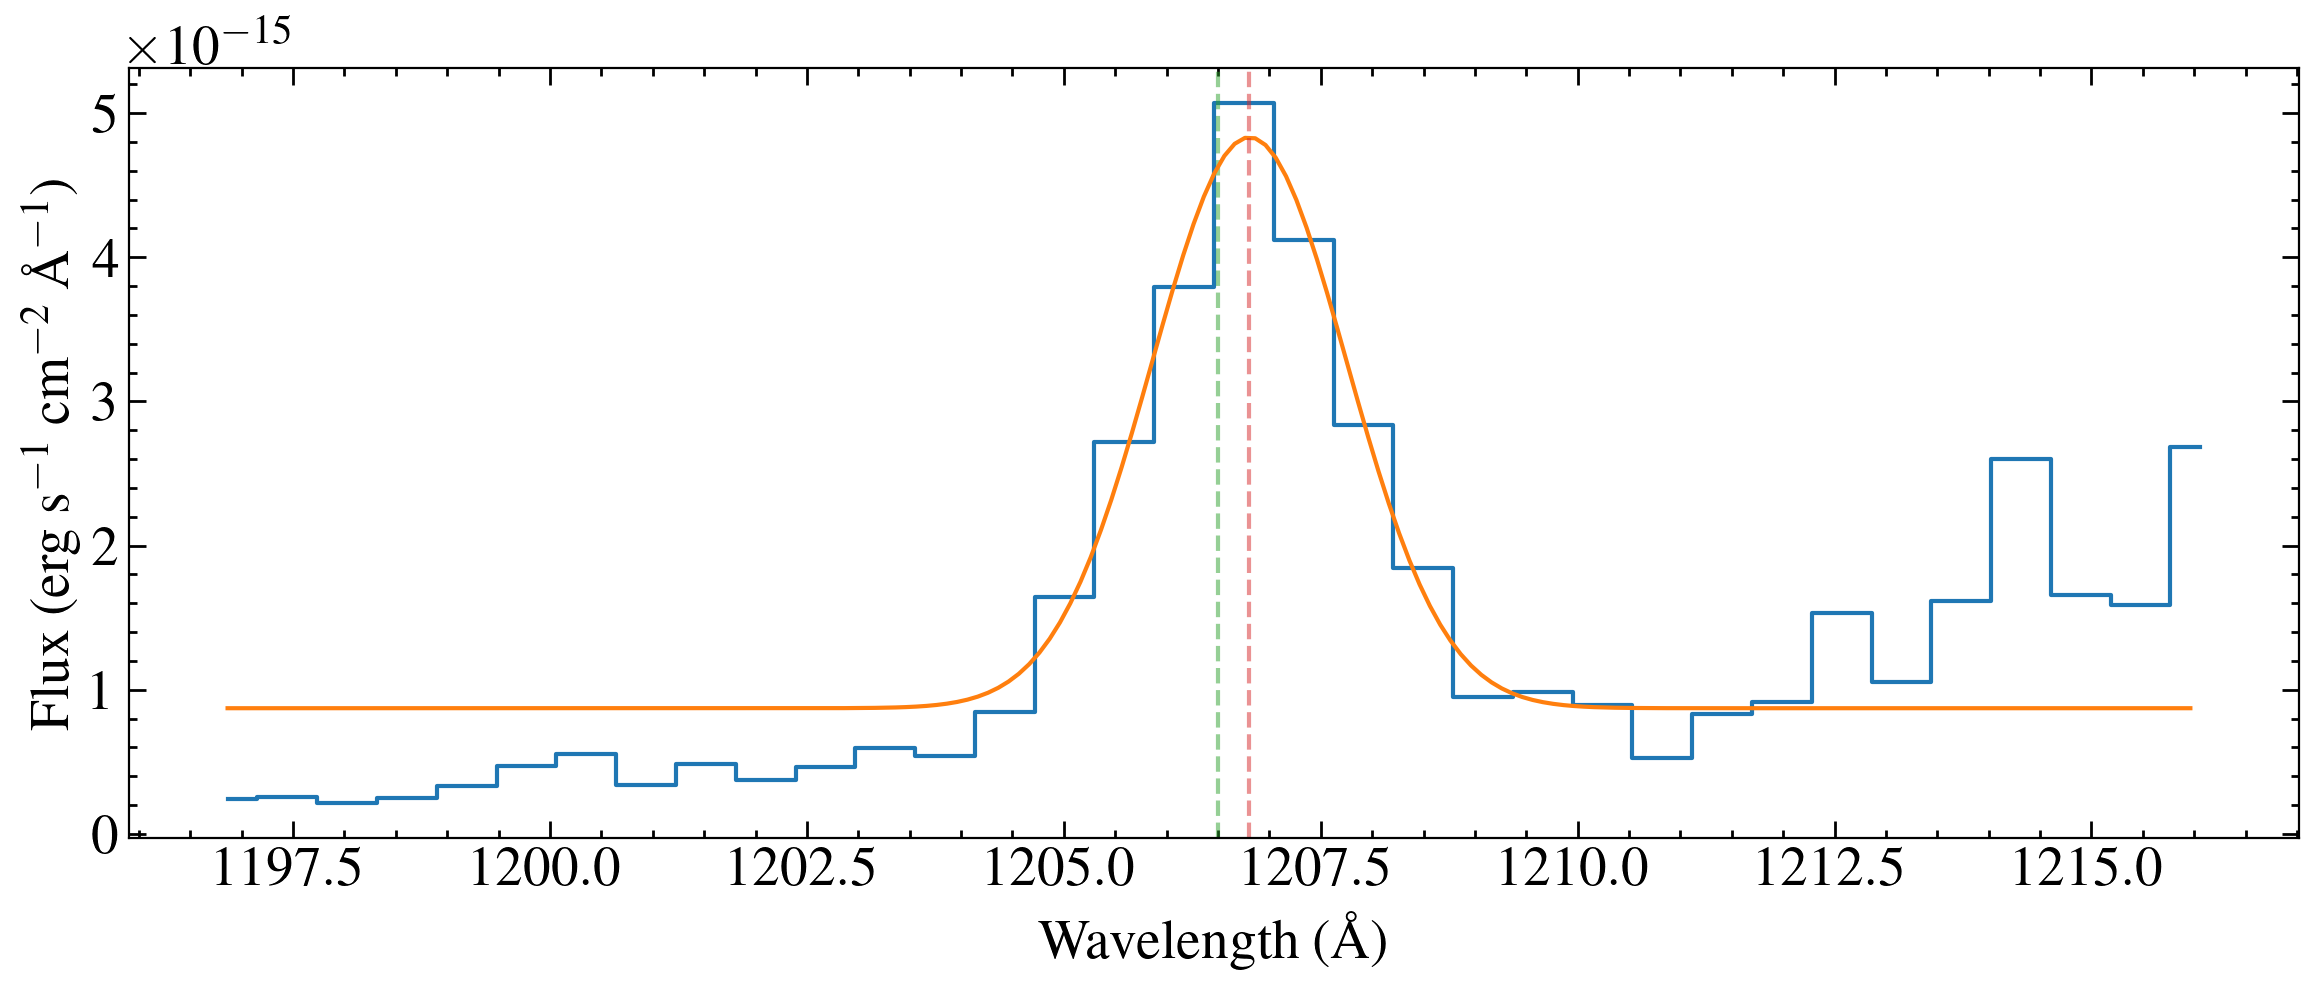

Gaussian
[1.84945193e-17 6.37504967e-17 7.56501342e-02 7.89869708e-02
 6.52074957e-17 1.46934818e-01]
58.91614471414405 km / s 18.307196673853966


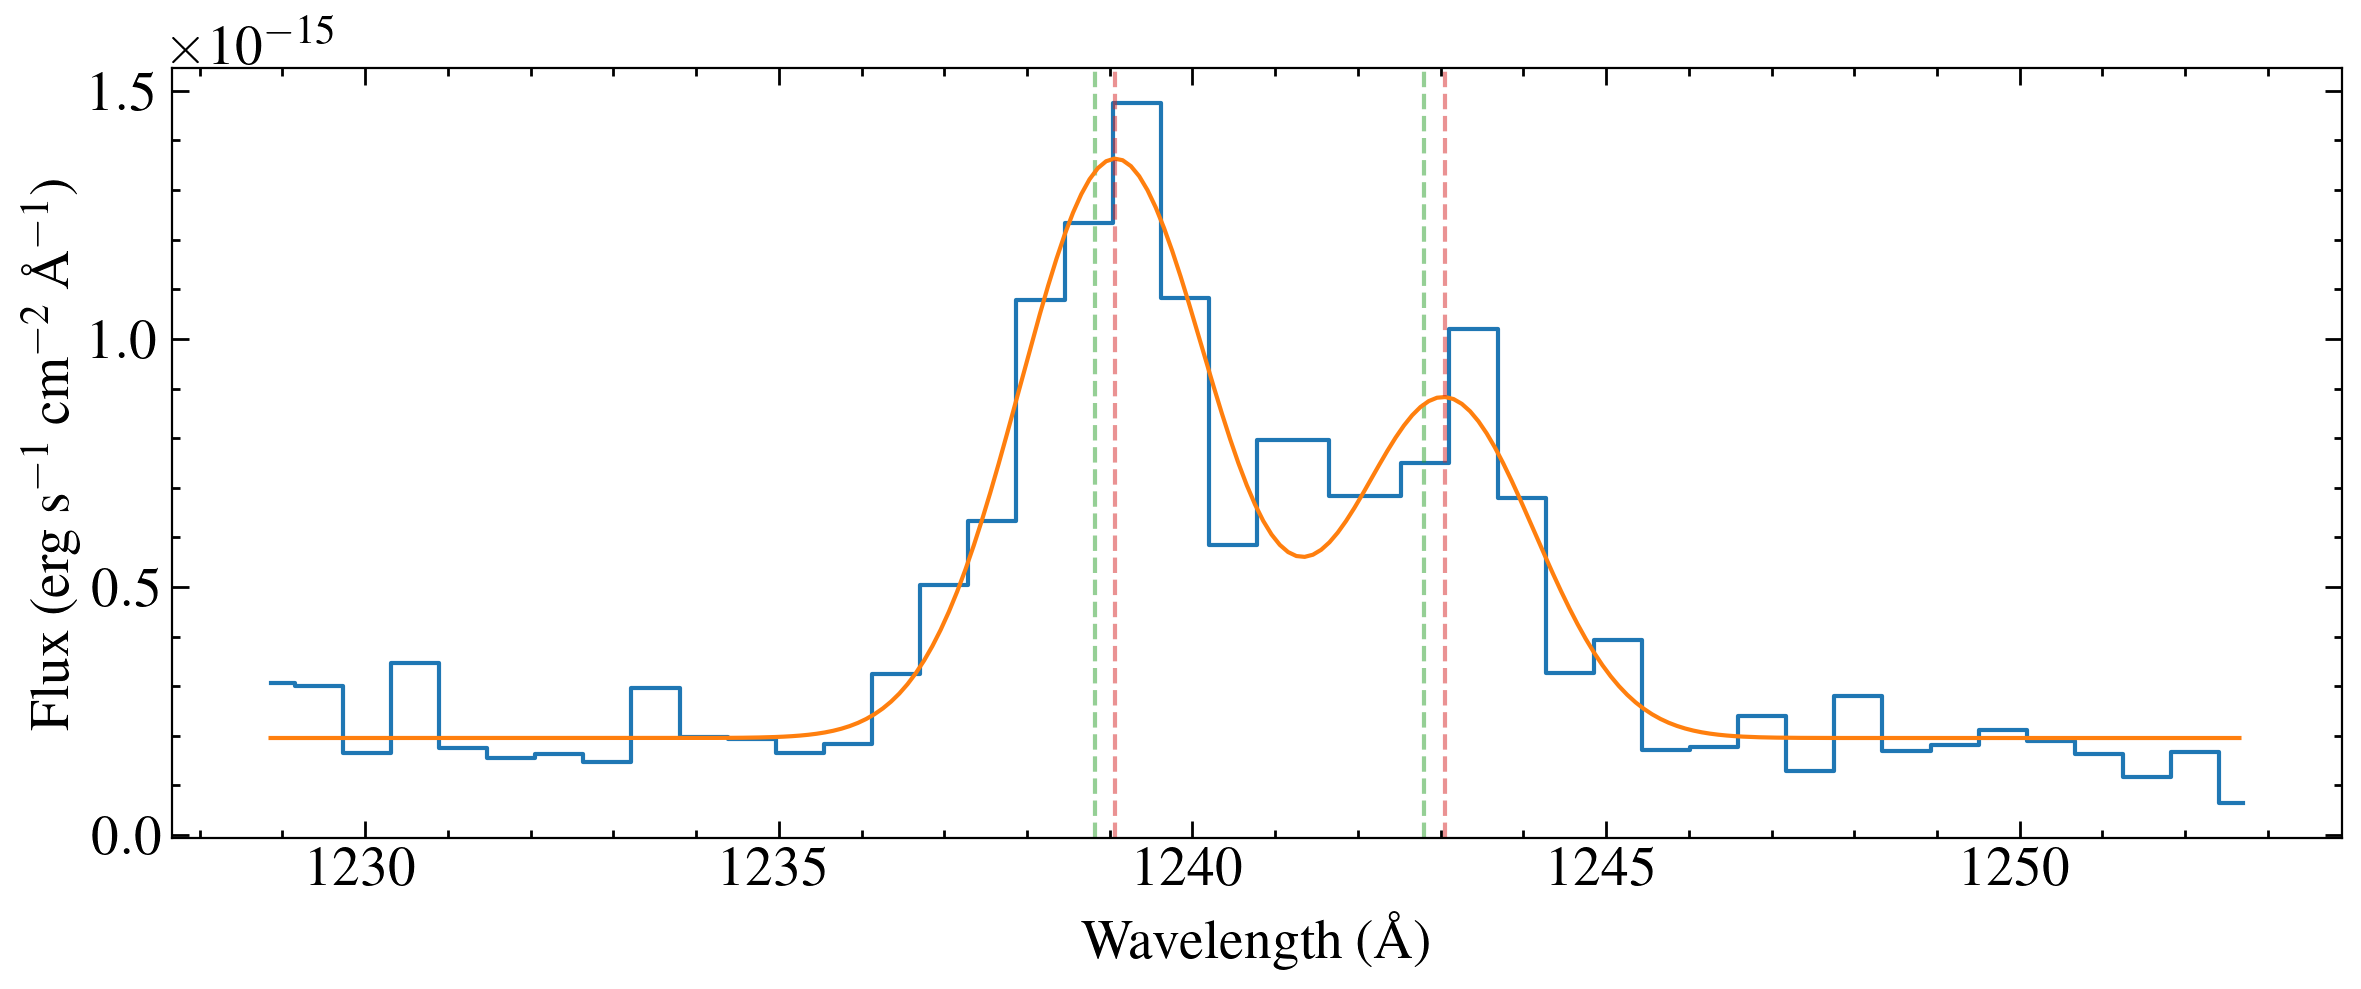

Gaussian
[2.78485159e-17 1.18085932e-16 2.91175724e-02 3.03411780e-02
 1.09882570e-16 6.90469408e-02]
87.92311908602558 km / s 6.263101184360387


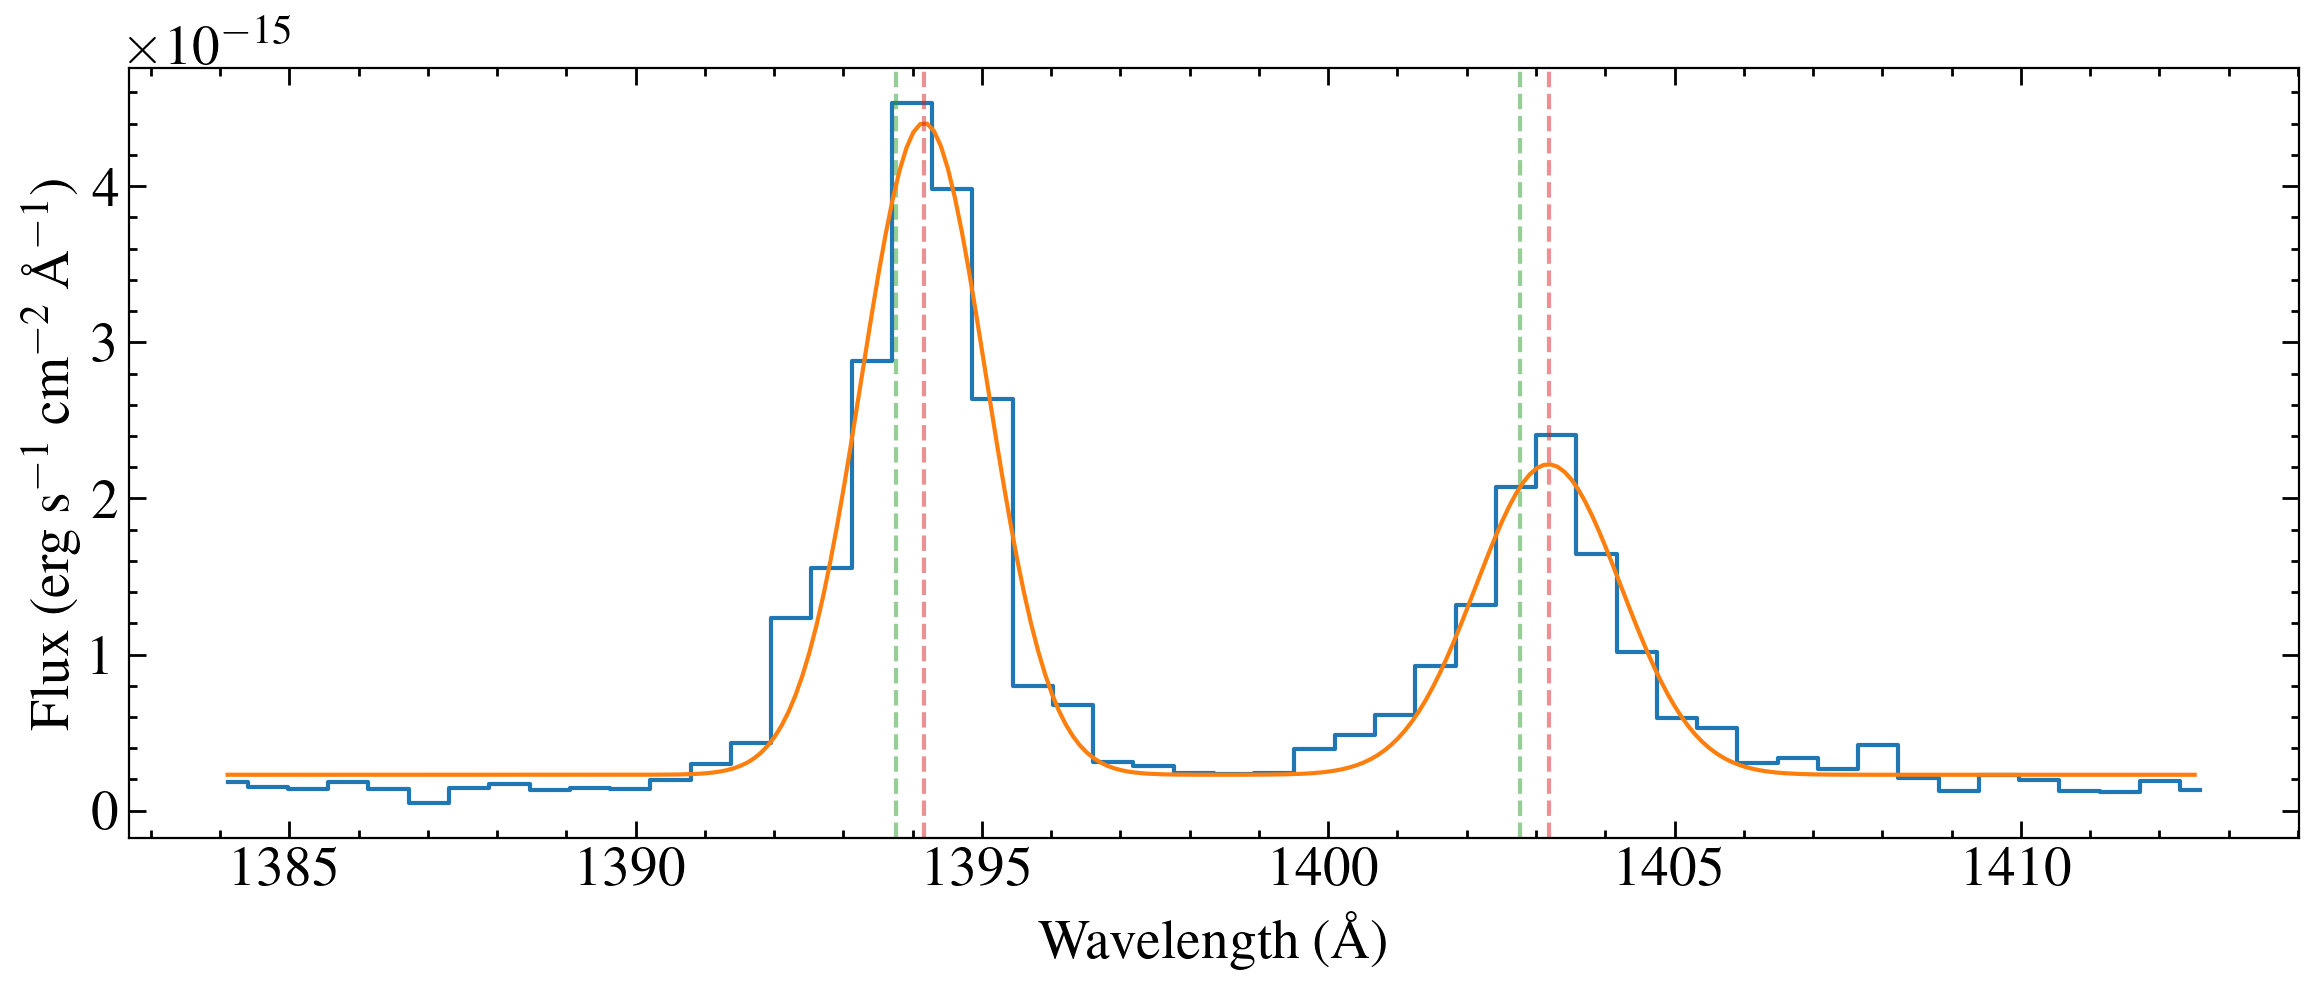

Gaussian
[8.05670285e-17 3.32682718e-16 3.29407543e-02 3.33724769e-02
 3.57767969e-16 5.35976627e-02]
70.97436091541915 km / s 6.378622472166974


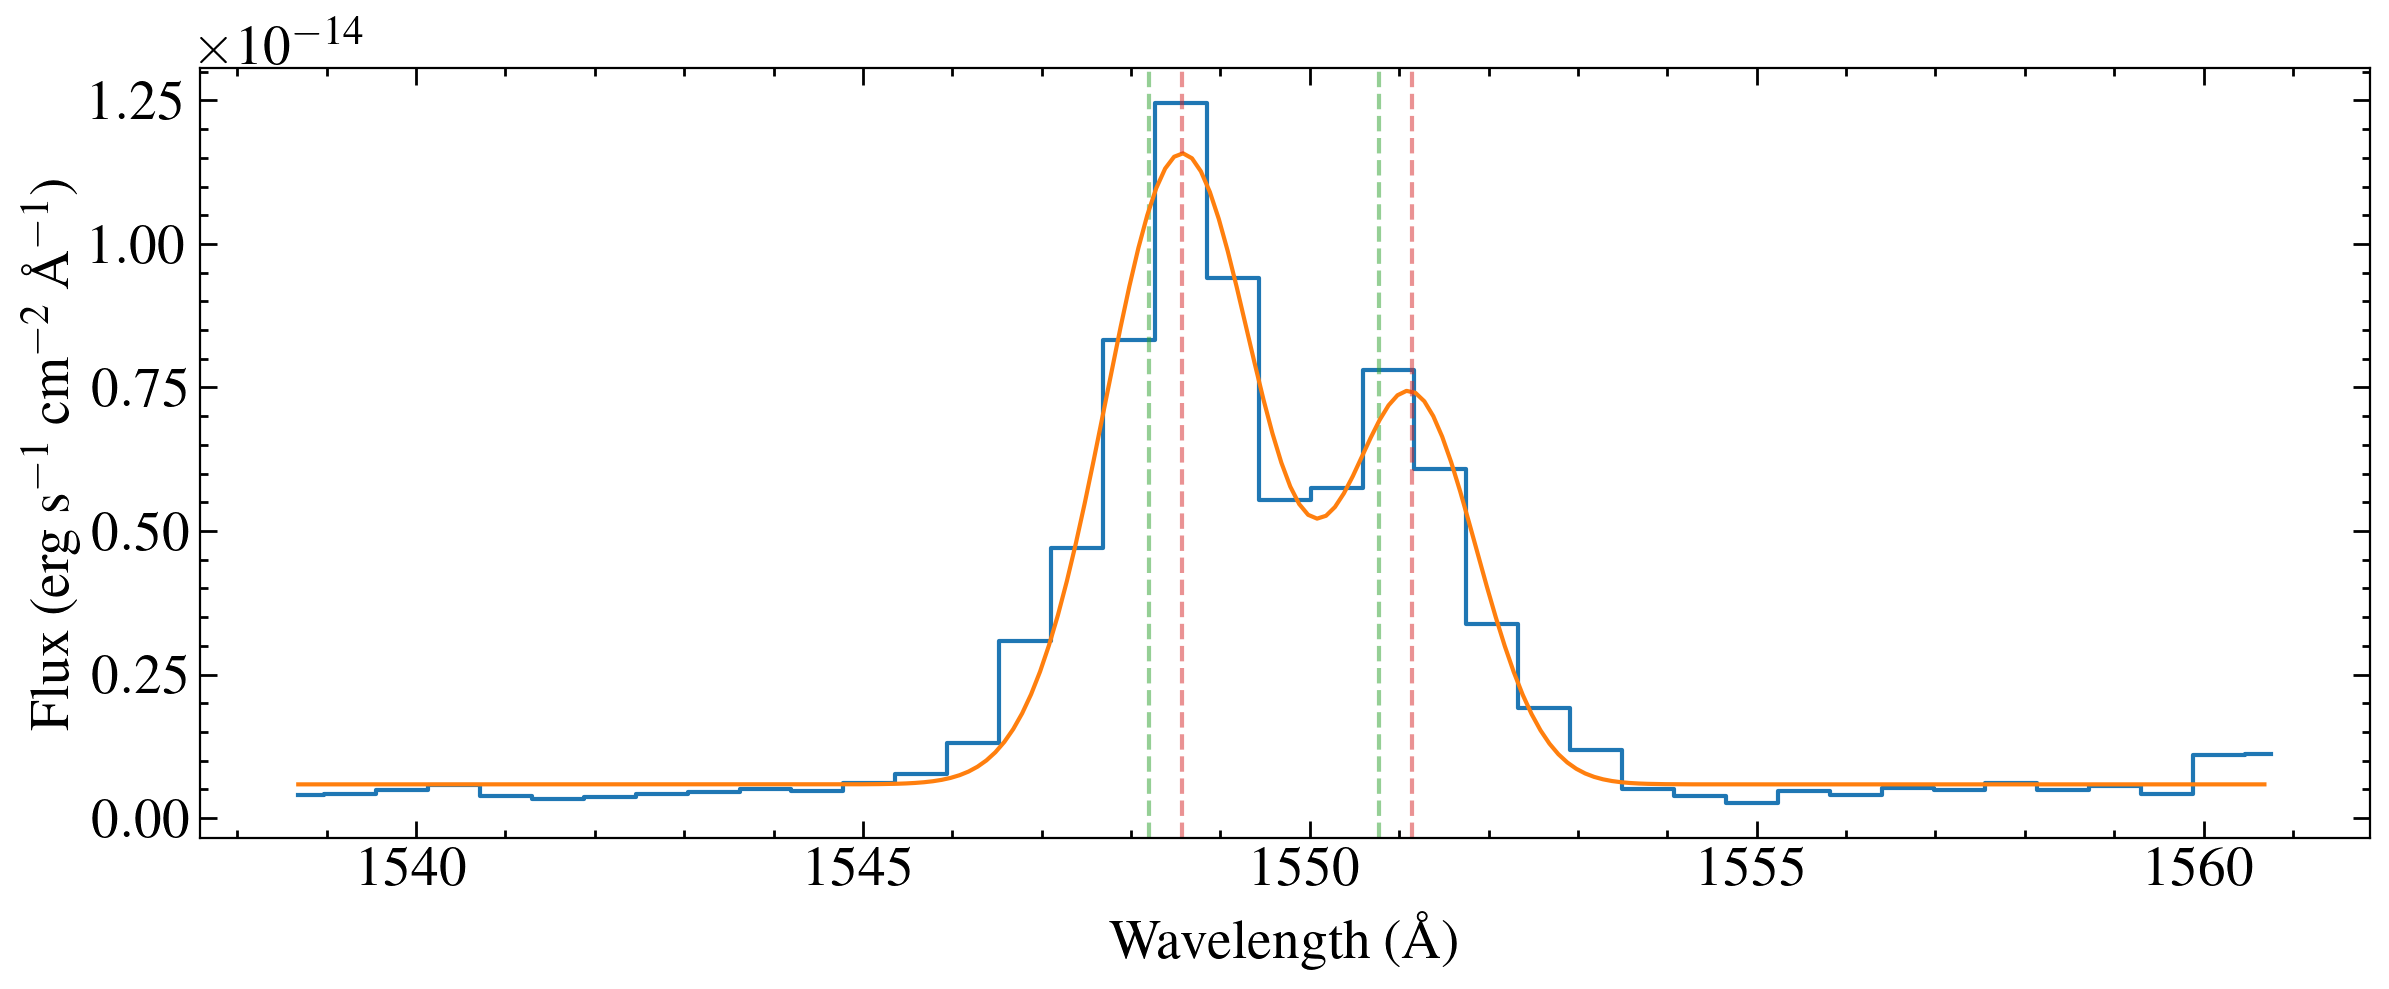

Gaussian
[1.32860078e-16 5.82774902e-16 4.41265966e-02 4.58565802e-02]
75.77199958476088 km / s 8.064288941887924


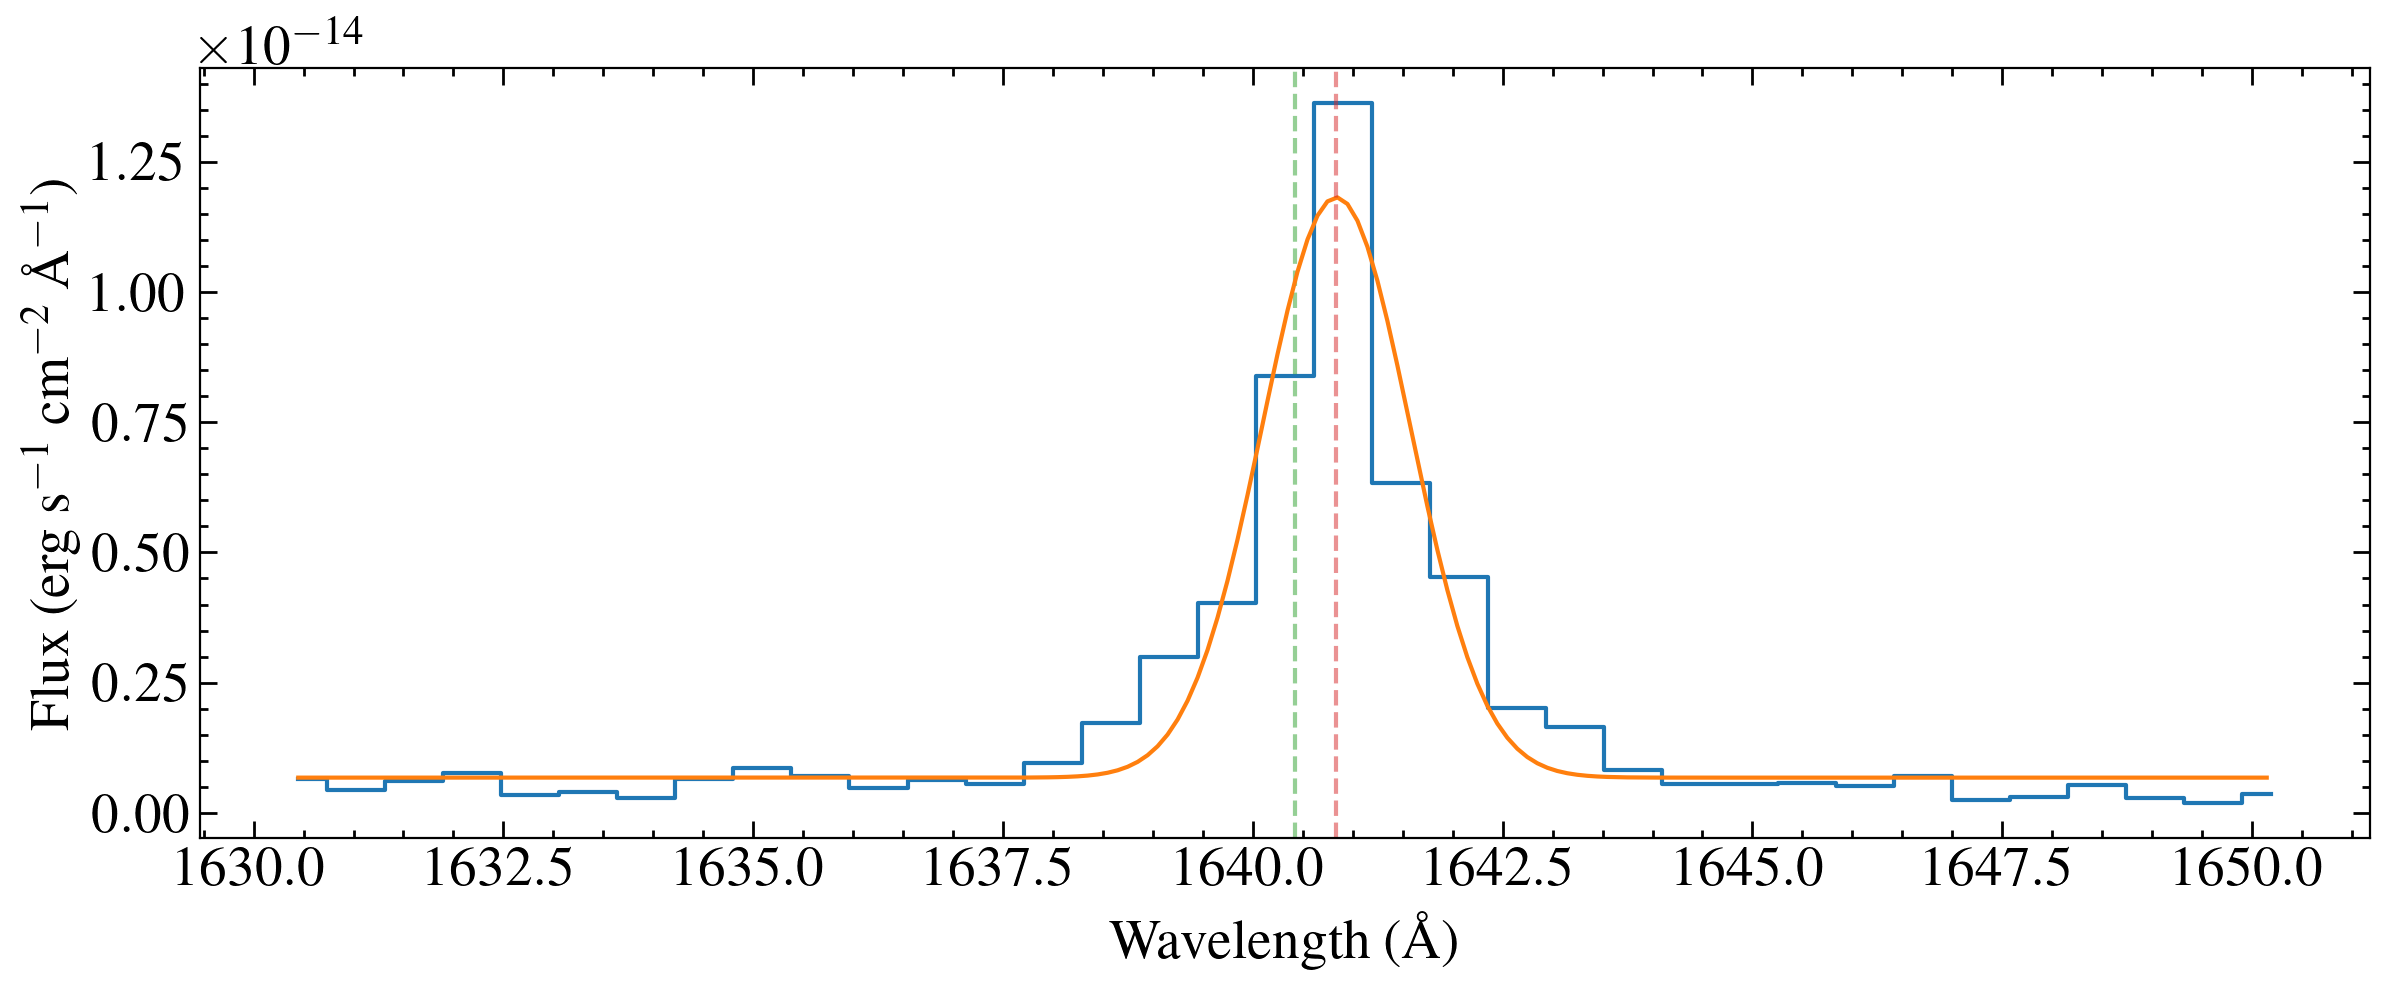

73.98337985295717 75.77199958476088 9.371273889714232


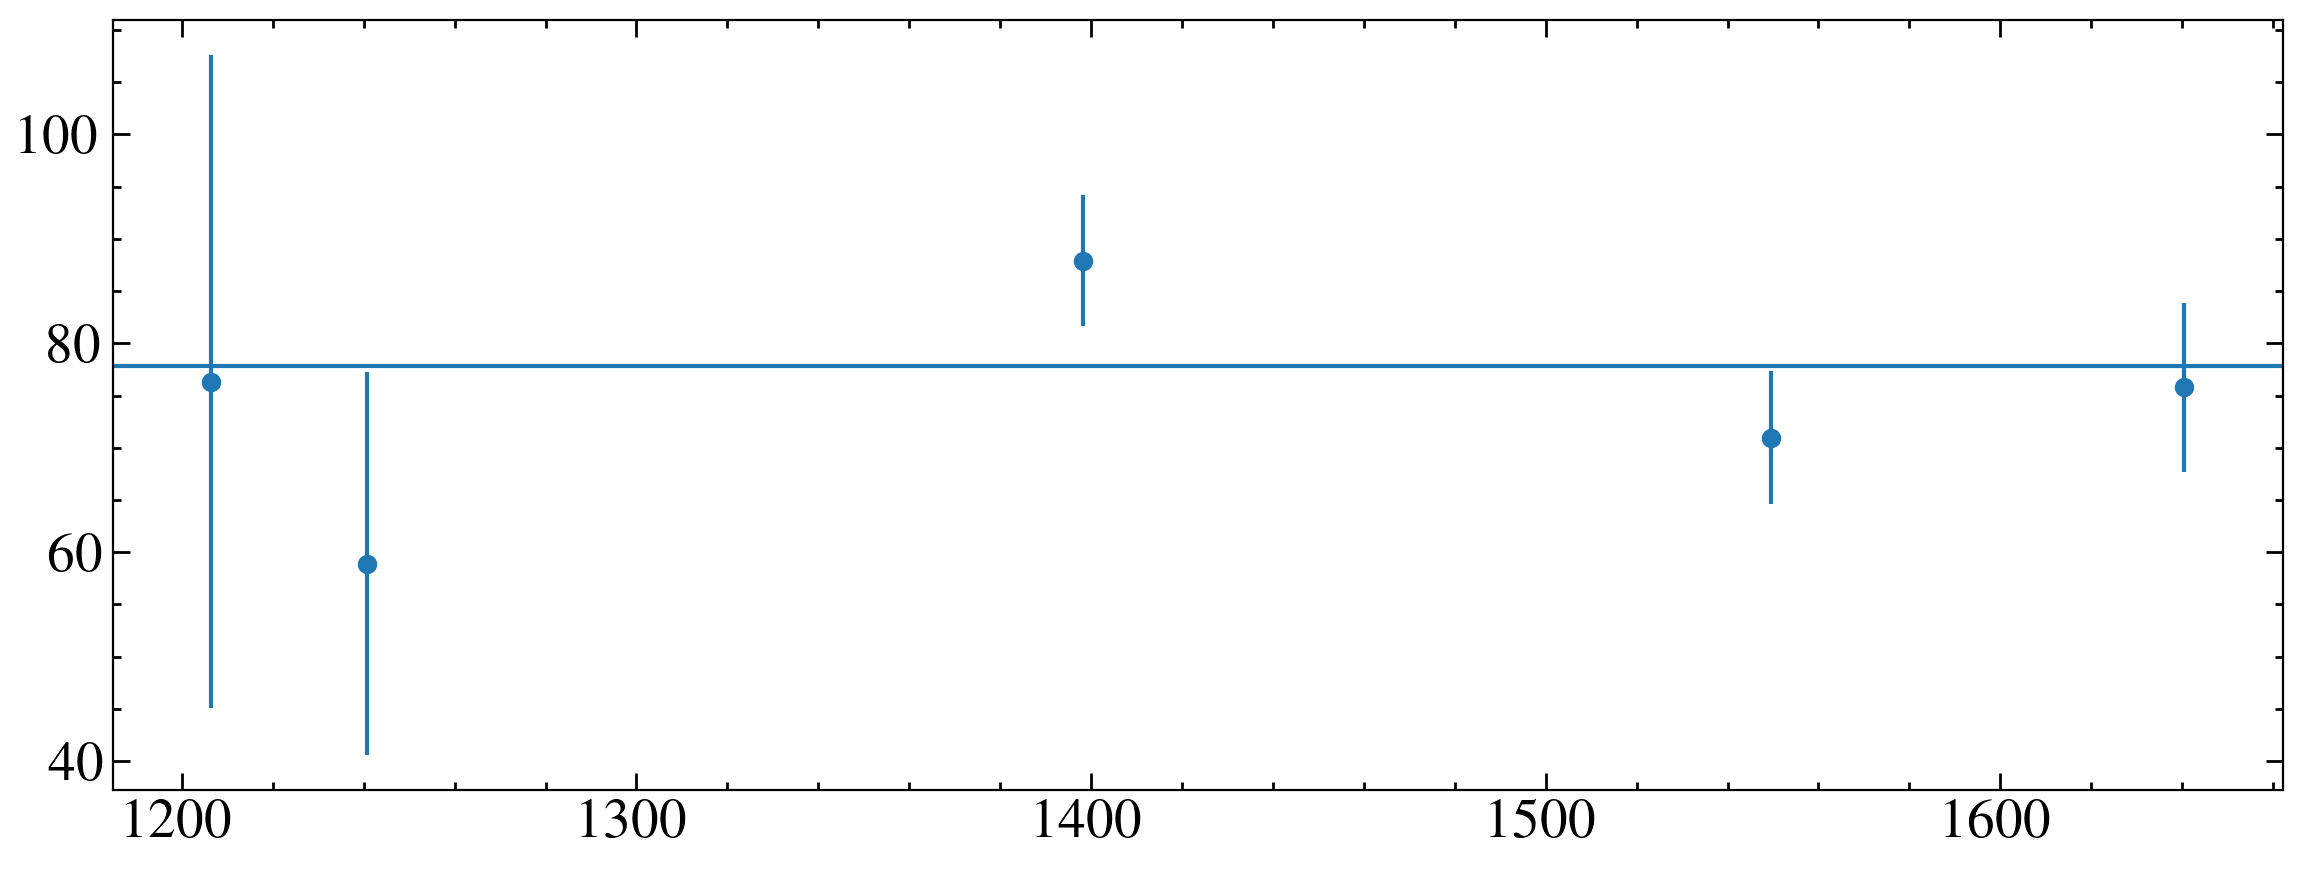

Gaussian
[1.26024091e-16 4.38583002e-16 1.02236370e-01 1.08639444e-01]
83.89865331583404 km / s 25.403827631345013


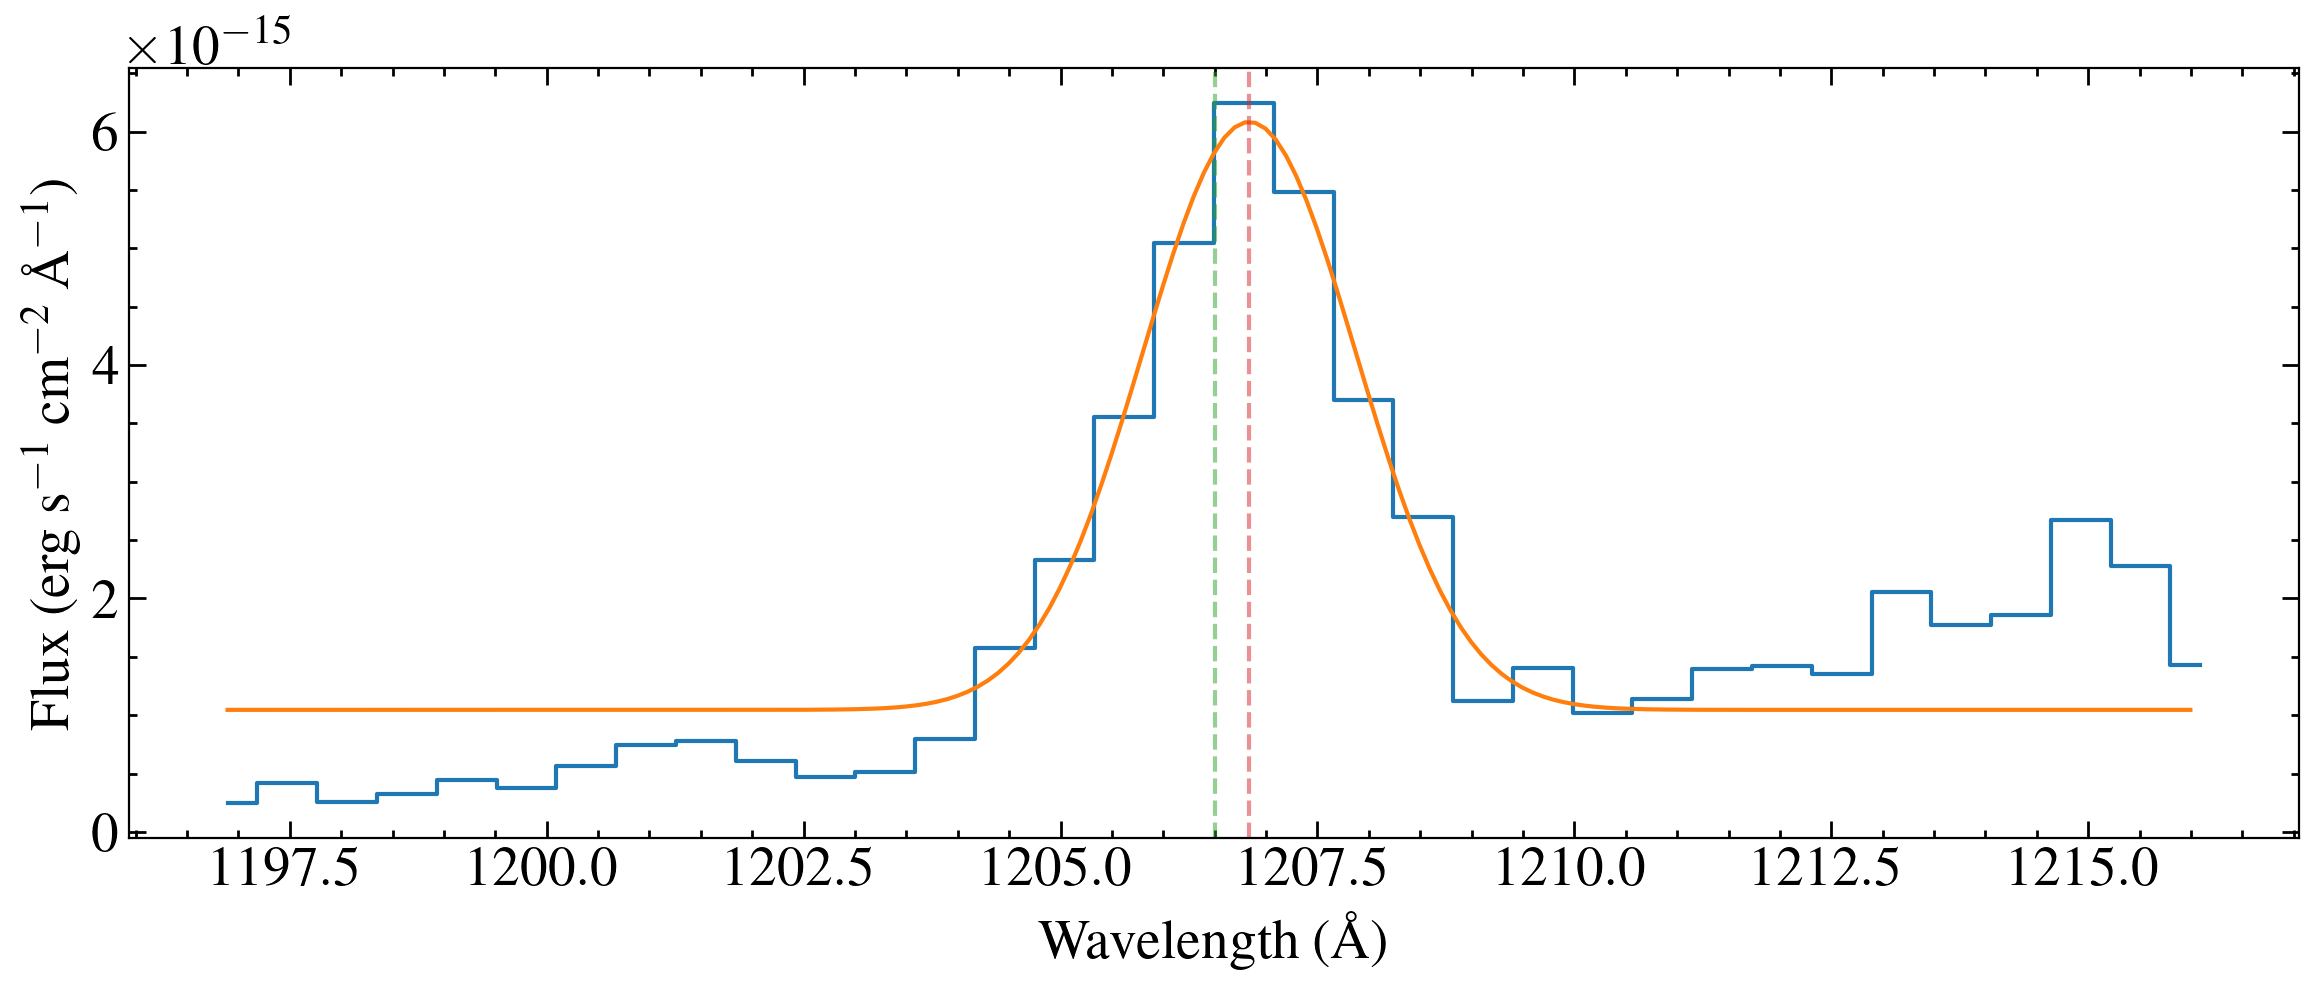

Gaussian
[2.11280110e-17 7.99278780e-17 5.97381145e-02 6.27277177e-02
 8.13471892e-17 1.14967222e-01]
76.81397450606275 km / s 14.456516459733724


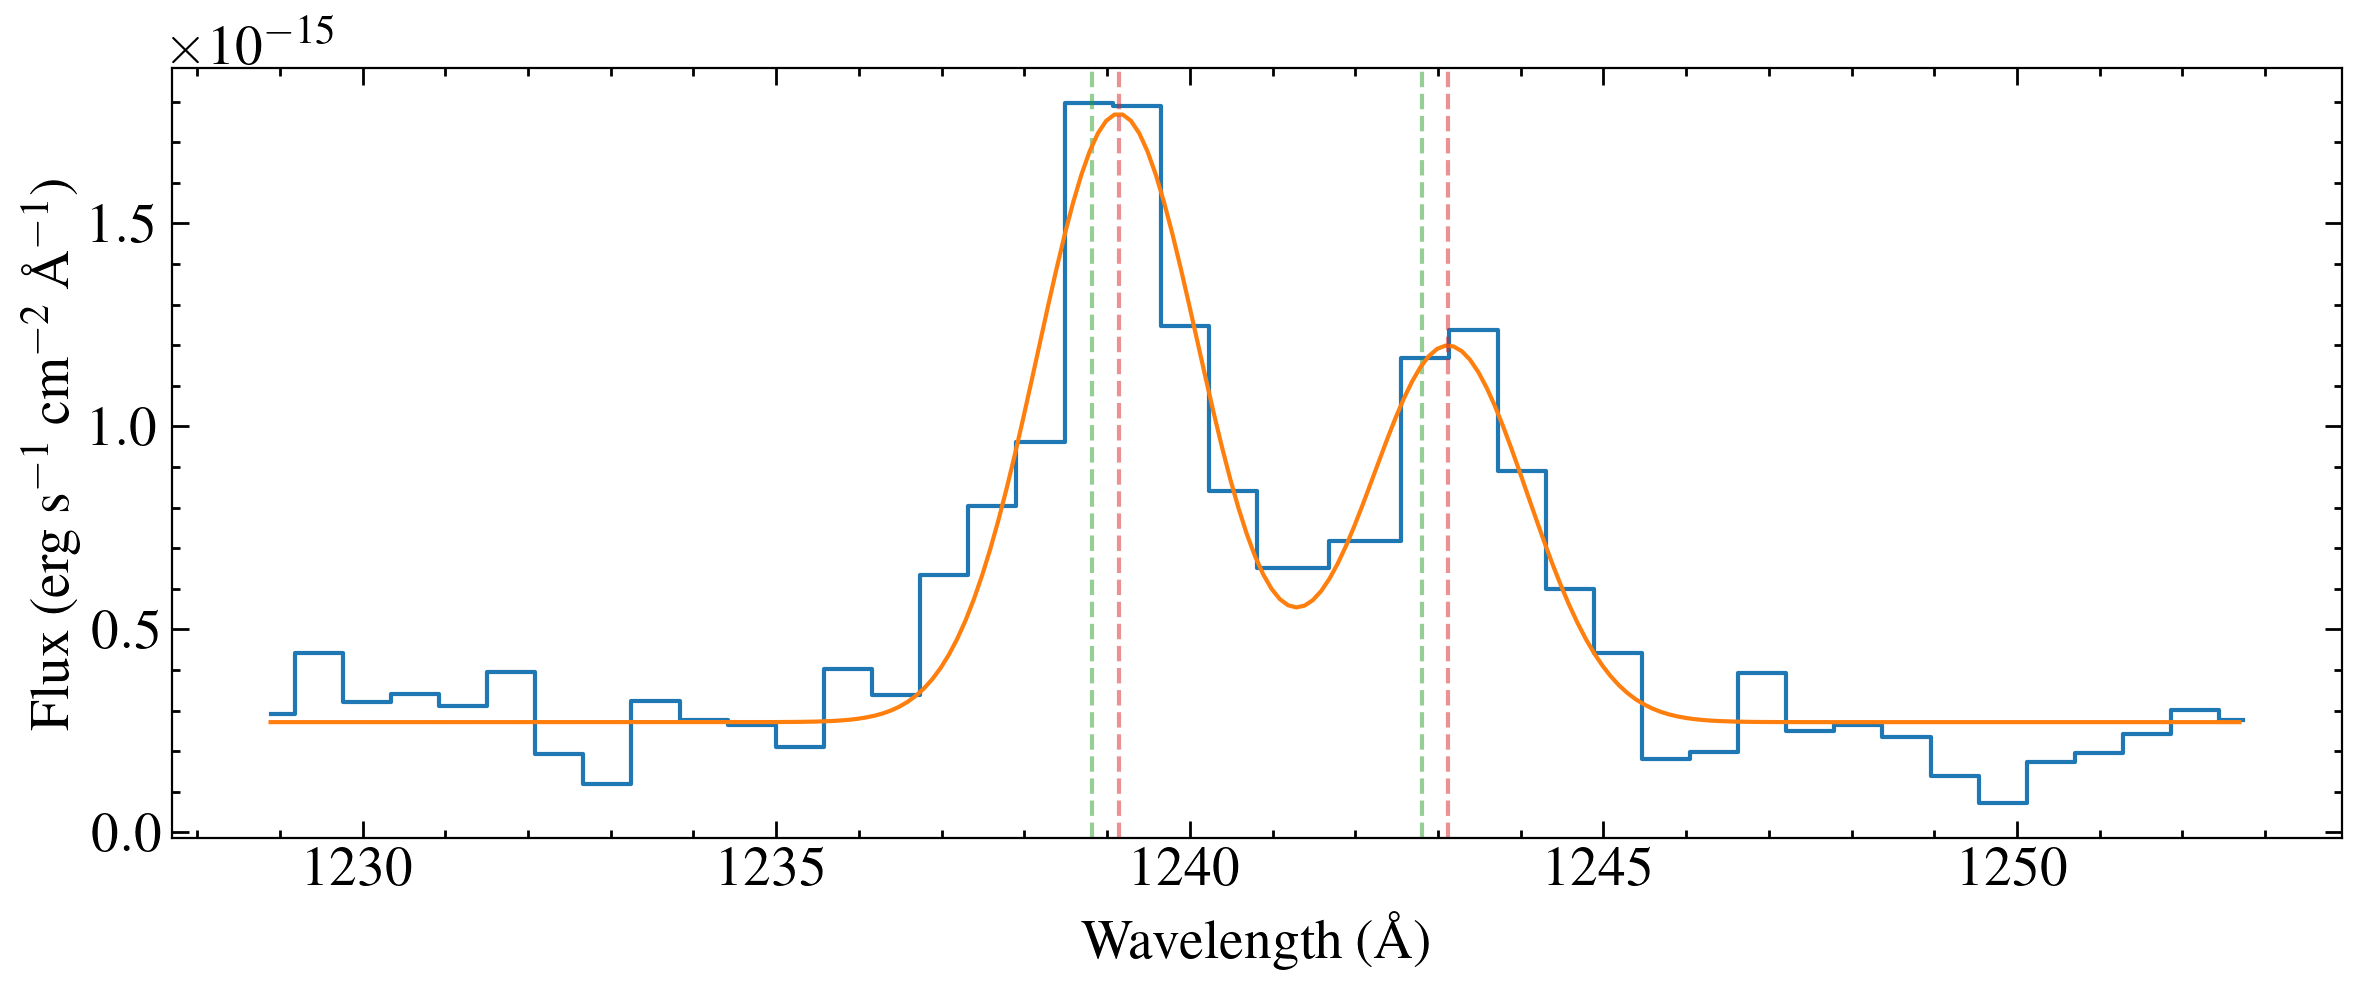

Gaussian
[3.46461054e-17 1.38379407e-16 3.09381443e-02 3.24049564e-02
 1.36526542e-16 5.75695554e-02]
71.46828590684852 km / s 6.654700659375543


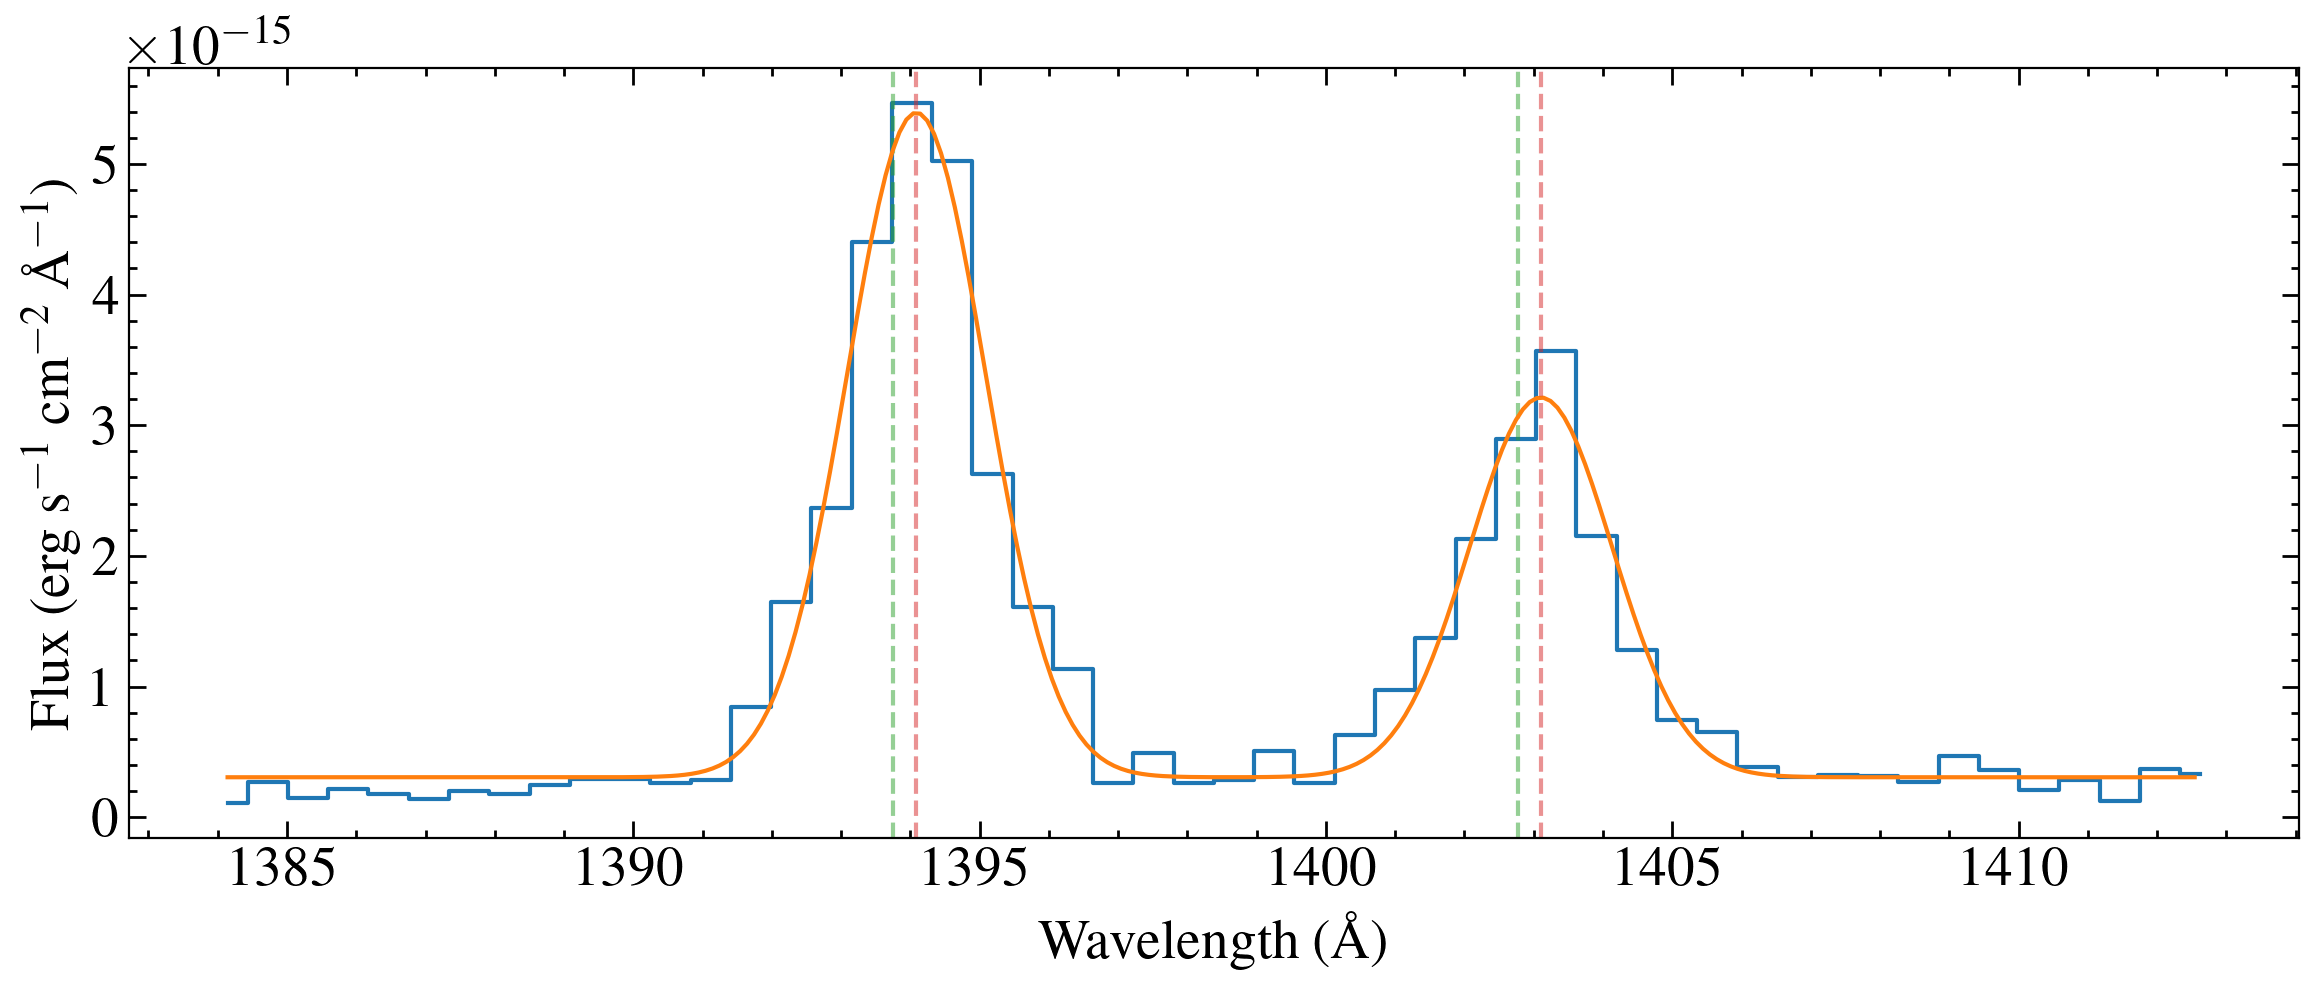

Gaussian
[1.25369386e-16 4.97052853e-16 3.22372916e-02 3.18599597e-02
 5.29346470e-16 5.14116460e-02]
61.541932996596074 km / s 6.242404496809812


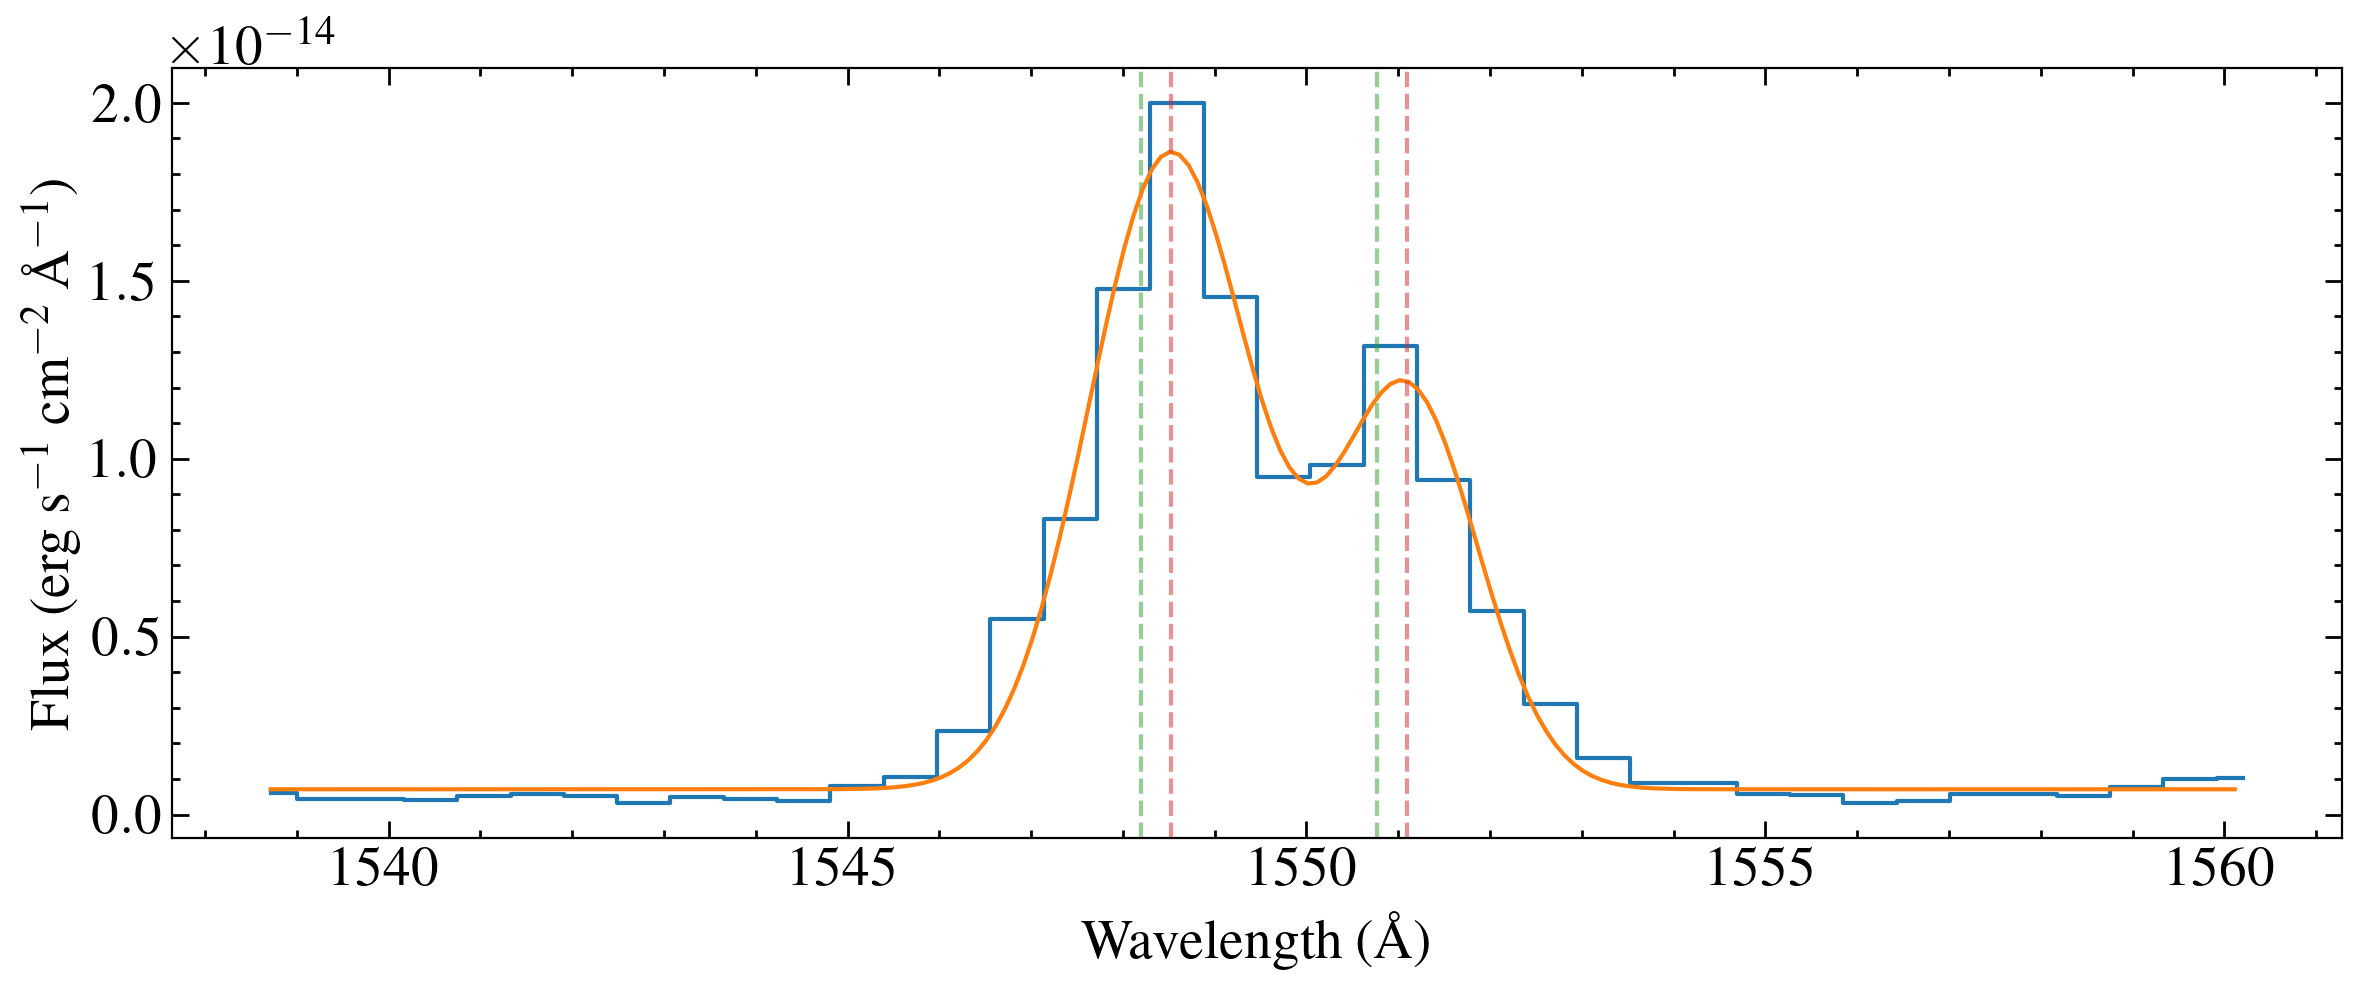

Gaussian
[1.57653055e-16 6.61263059e-16 3.15013831e-02 3.28547042e-02]
46.20835554051733 km / s 5.756987270558177


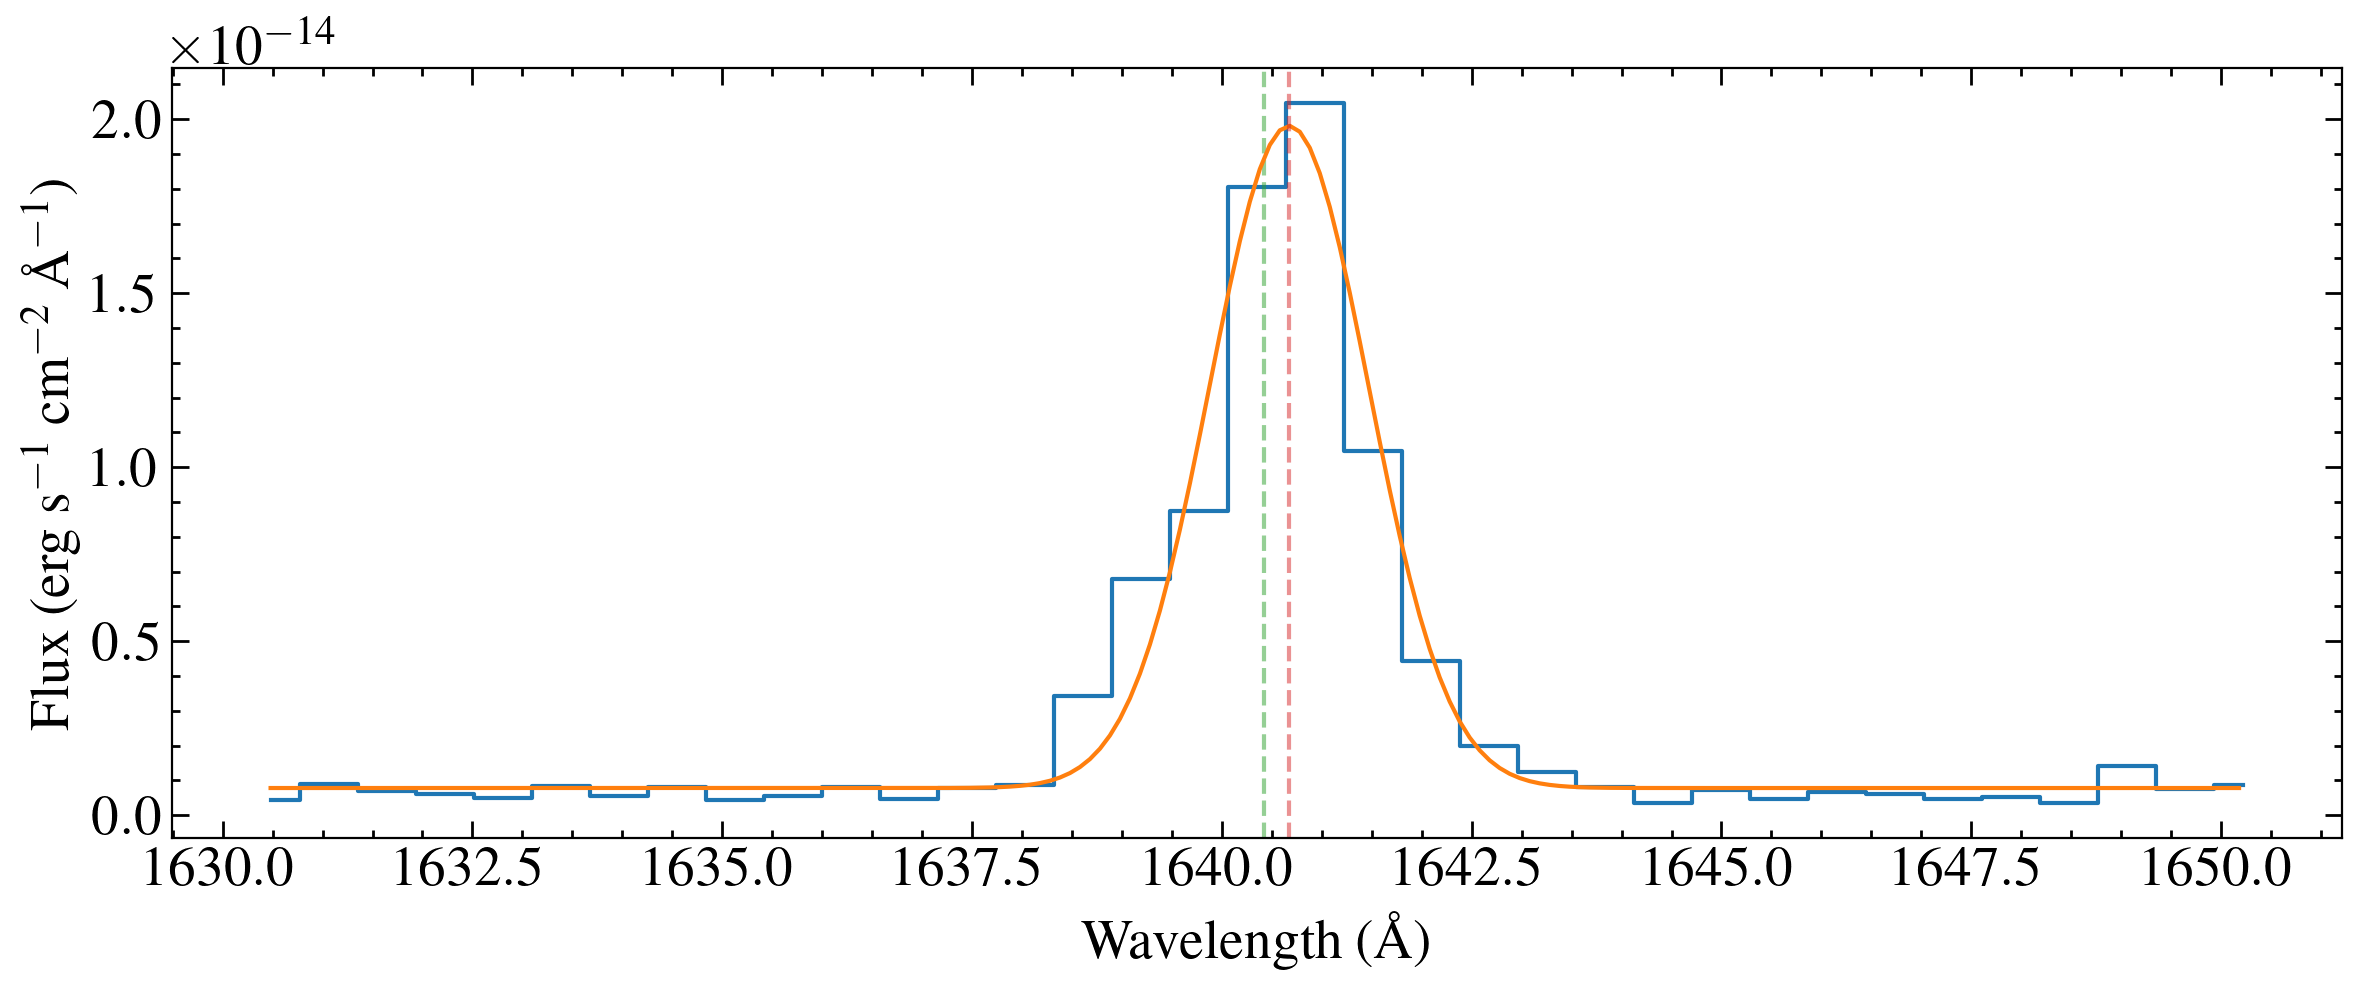

67.98624045317175 71.46828590684852 13.107736509600432


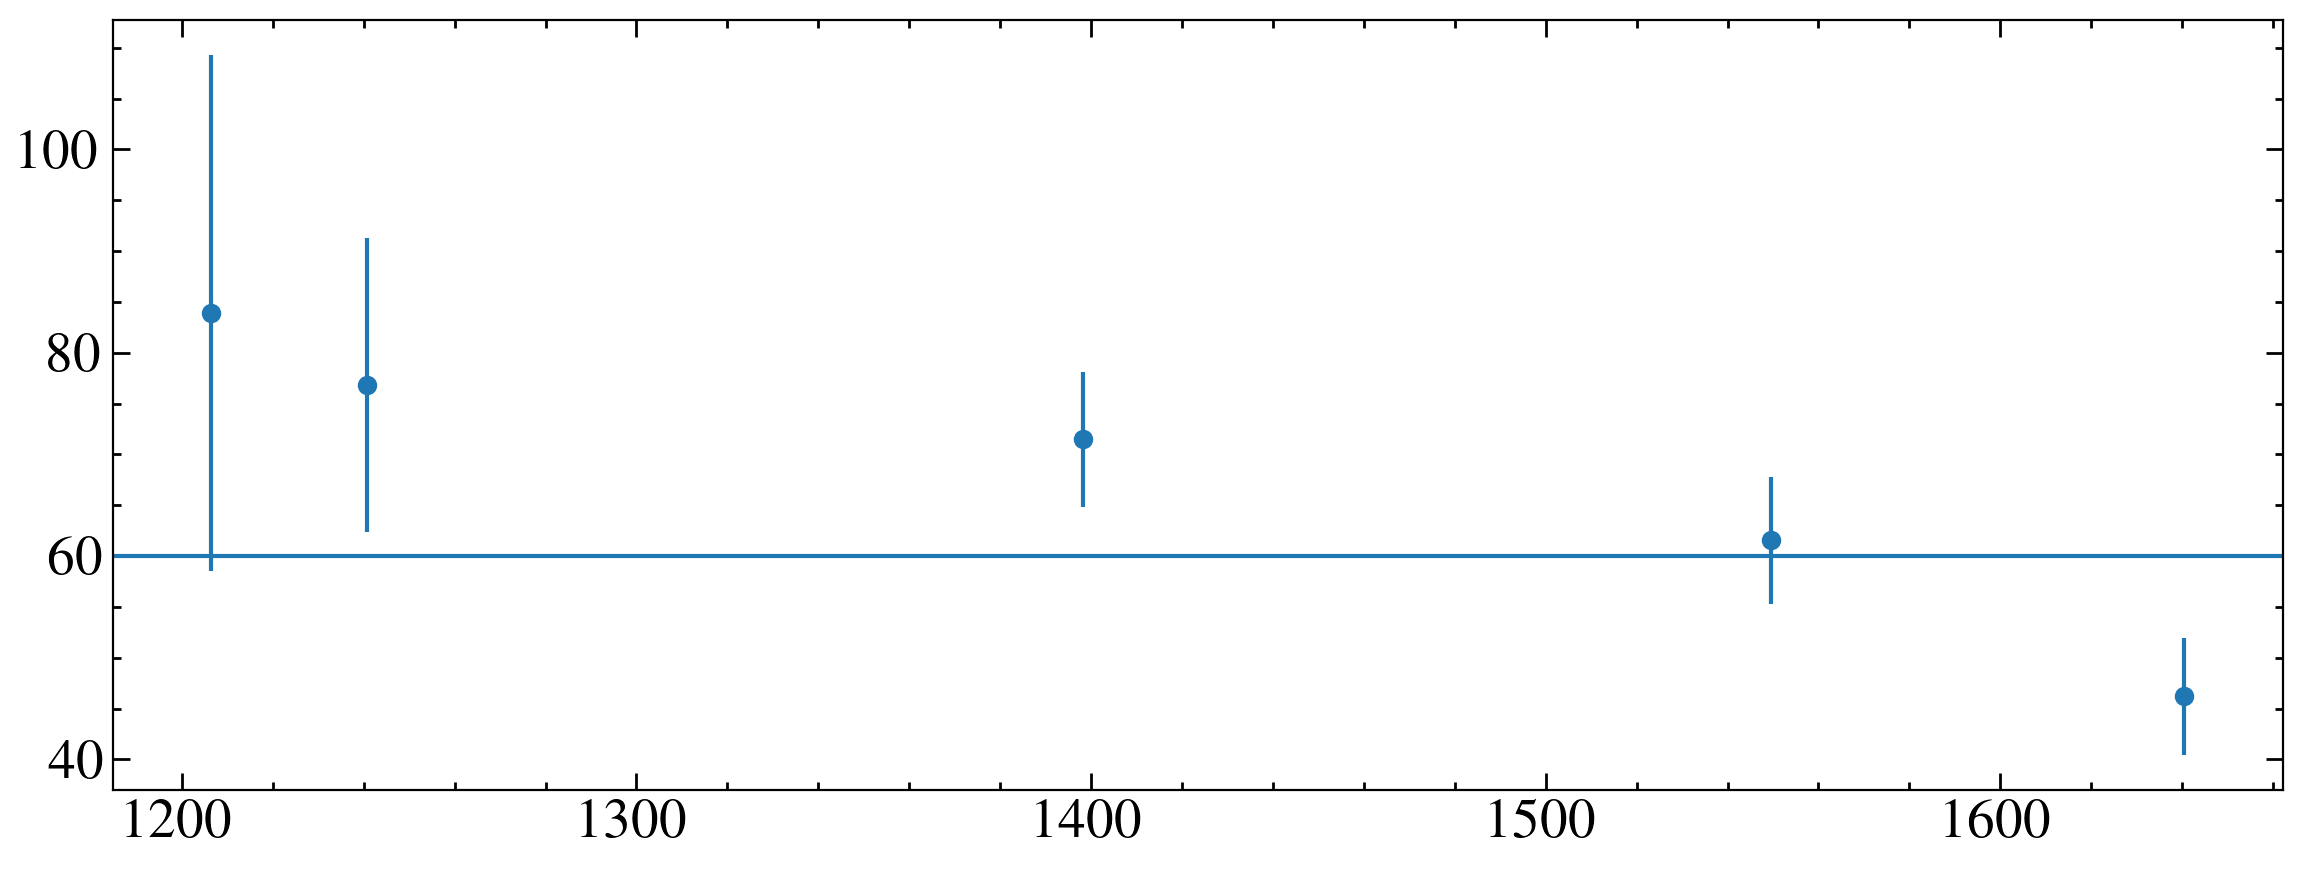

Gaussian
[1.40067656e-16 5.09048604e-16 1.03996112e-01 1.09962514e-01]
138.02006758762812 km / s 25.8410905449294


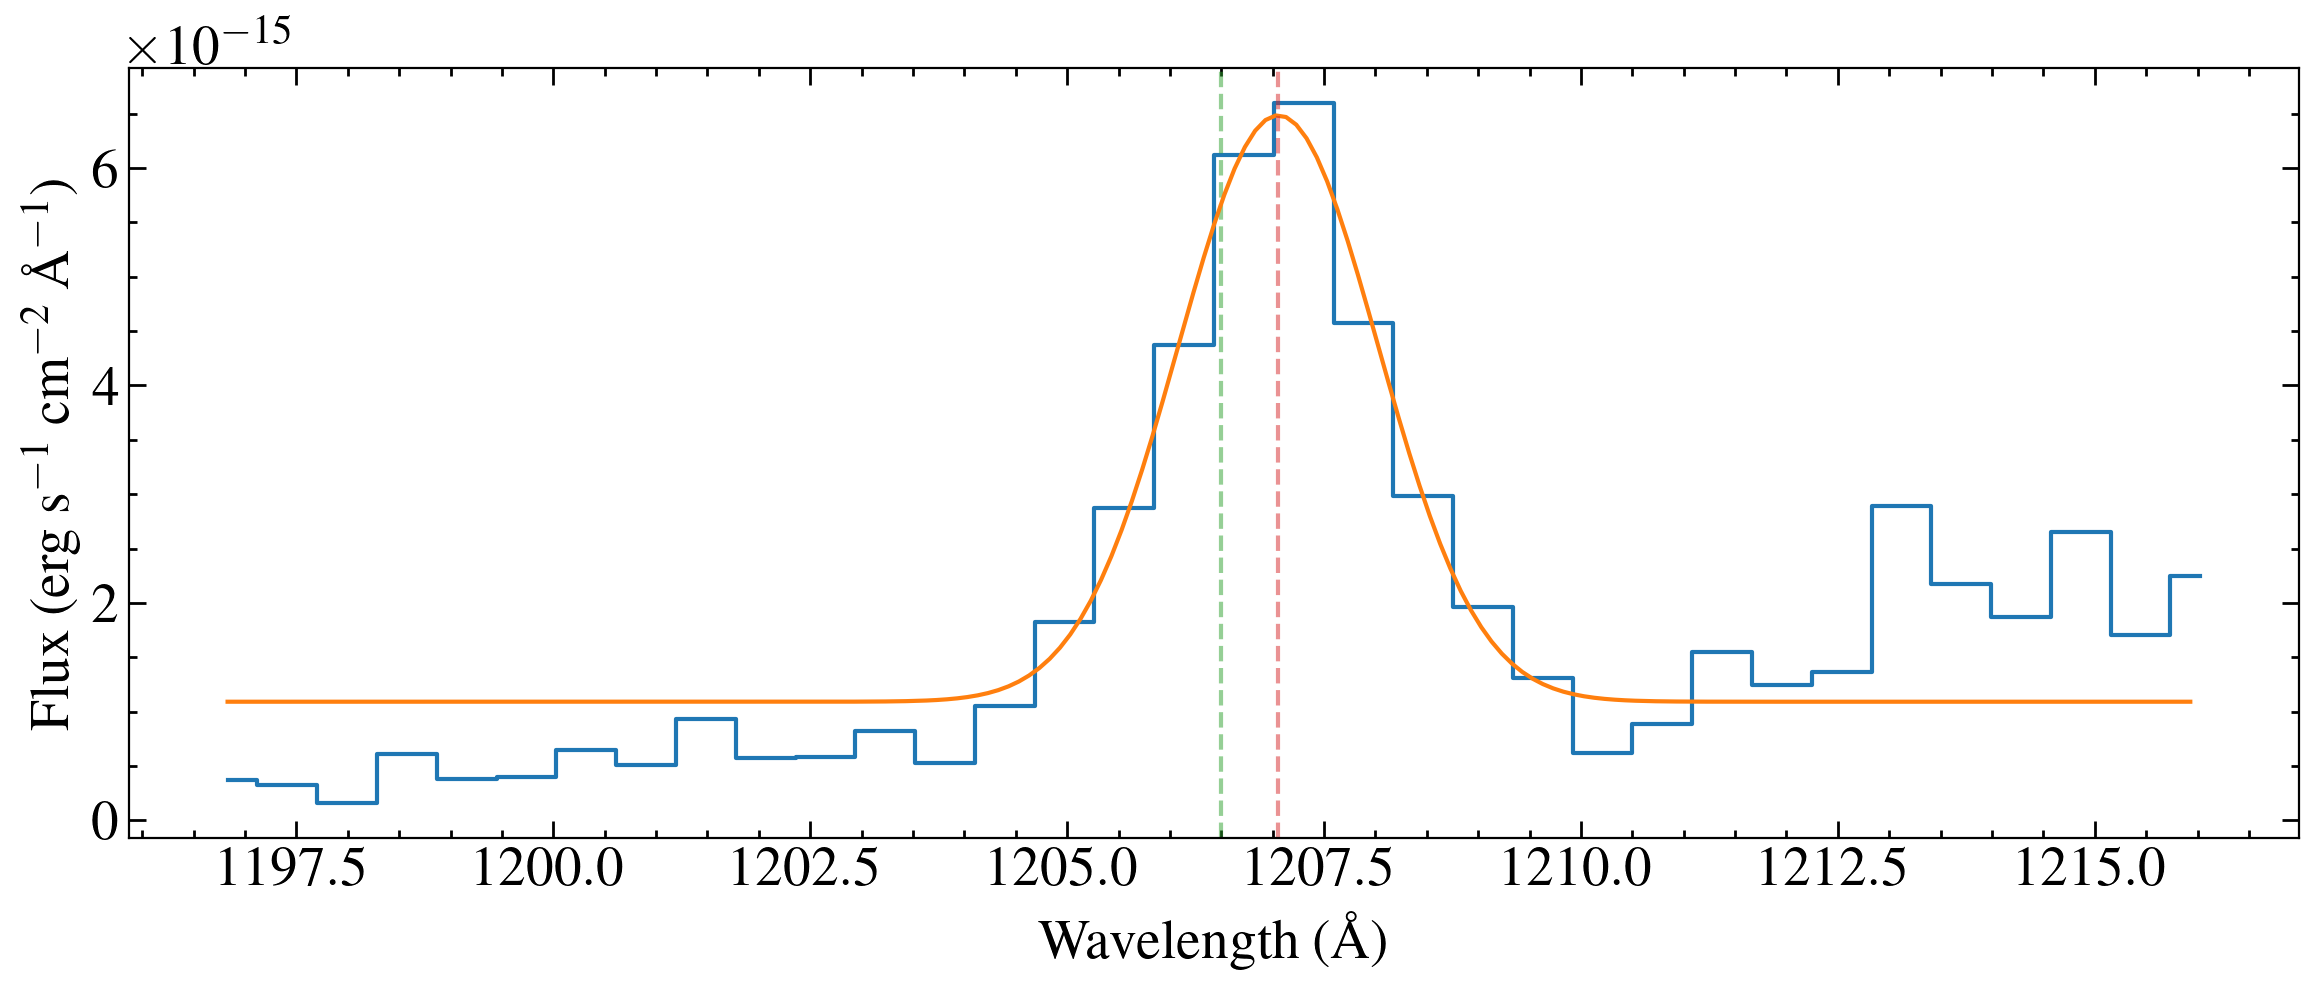

Gaussian
[2.00793256e-17 7.12800415e-17 5.96042945e-02 5.91826020e-02
 6.47776231e-17 1.55517364e-01]
84.35867174643779 km / s 14.424132255899742


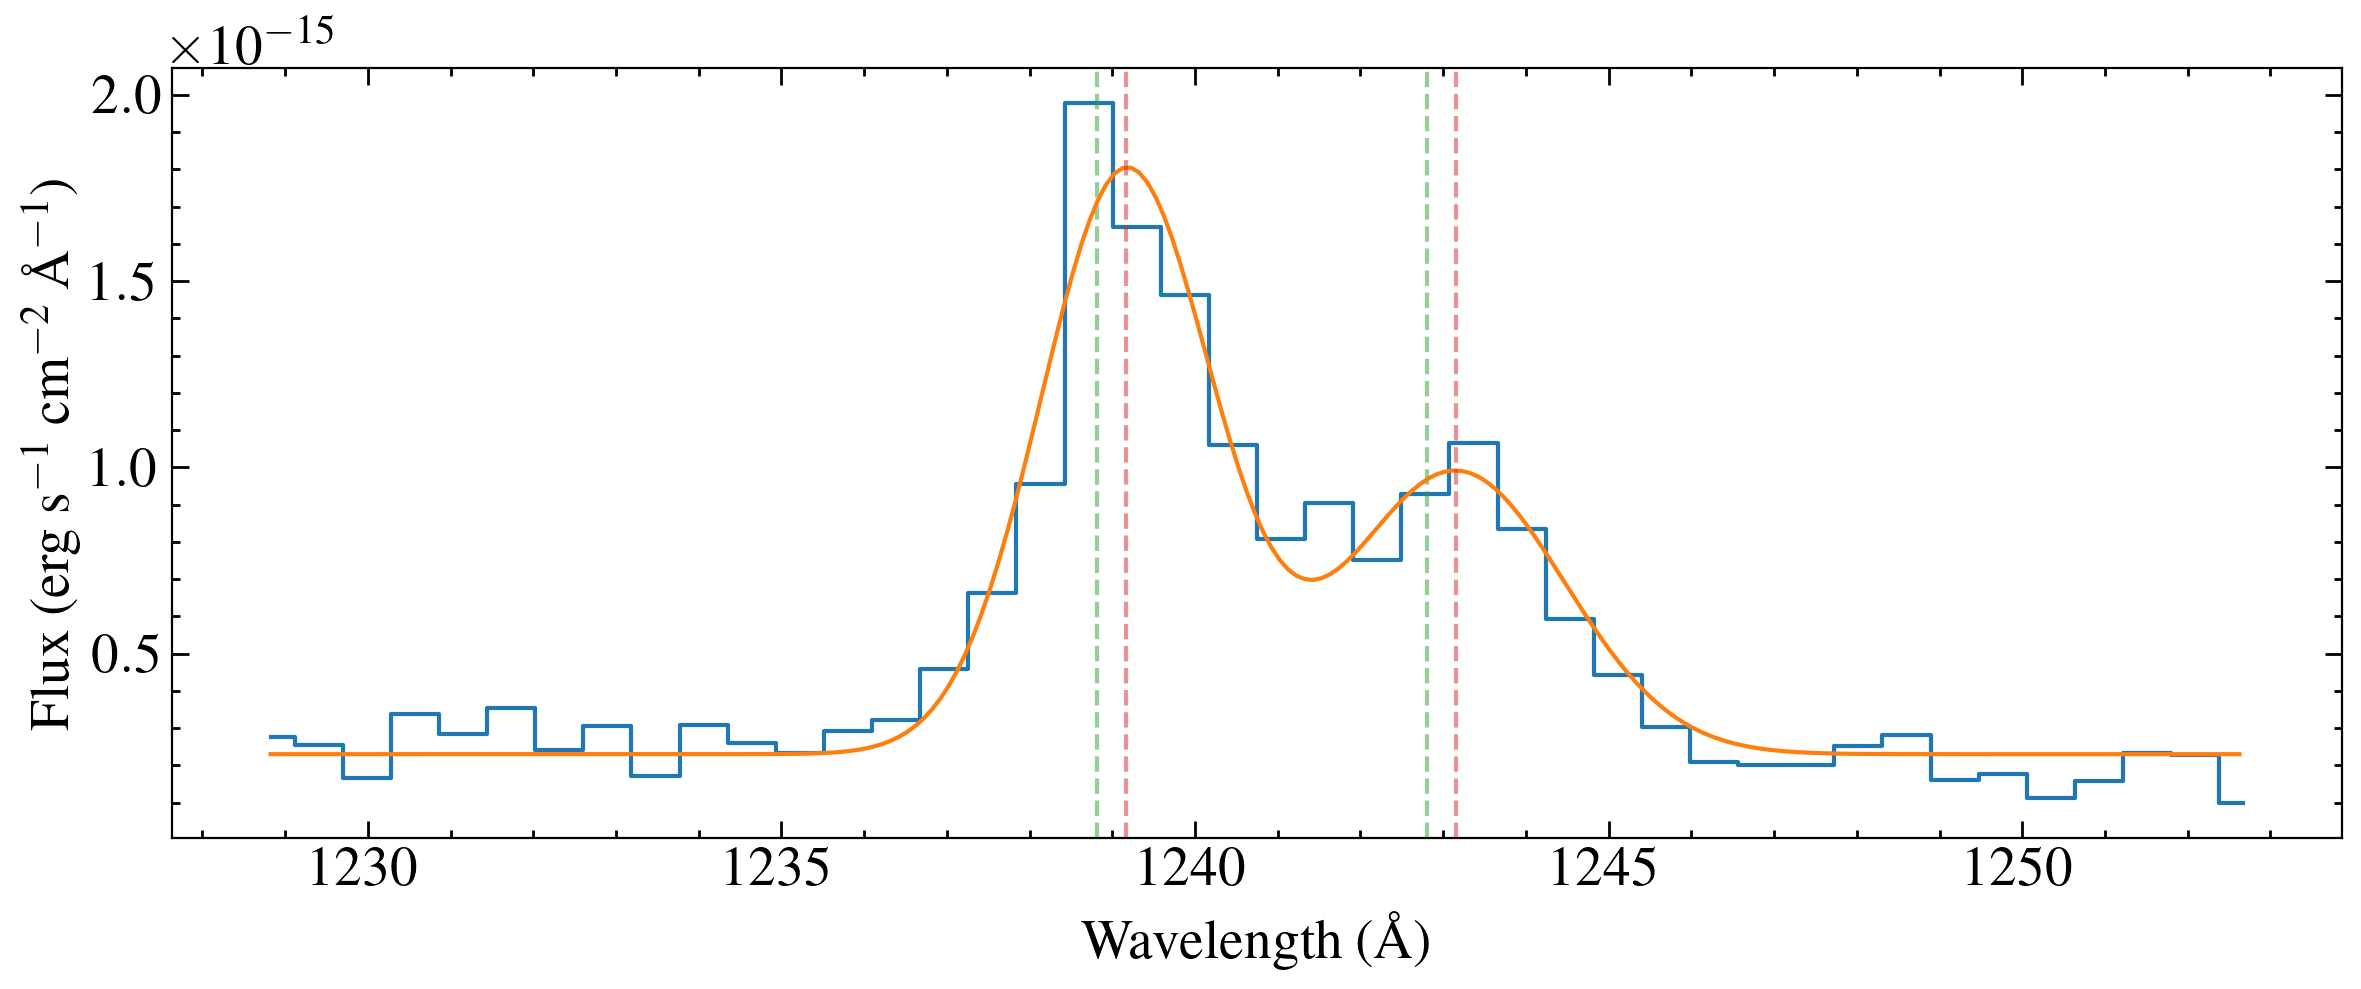

Gaussian
[2.92960094e-17 1.20247343e-16 2.37556067e-02 2.48215662e-02
 1.16967798e-16 4.50772233e-02]
148.60487651600732 km / s 5.109758691065423


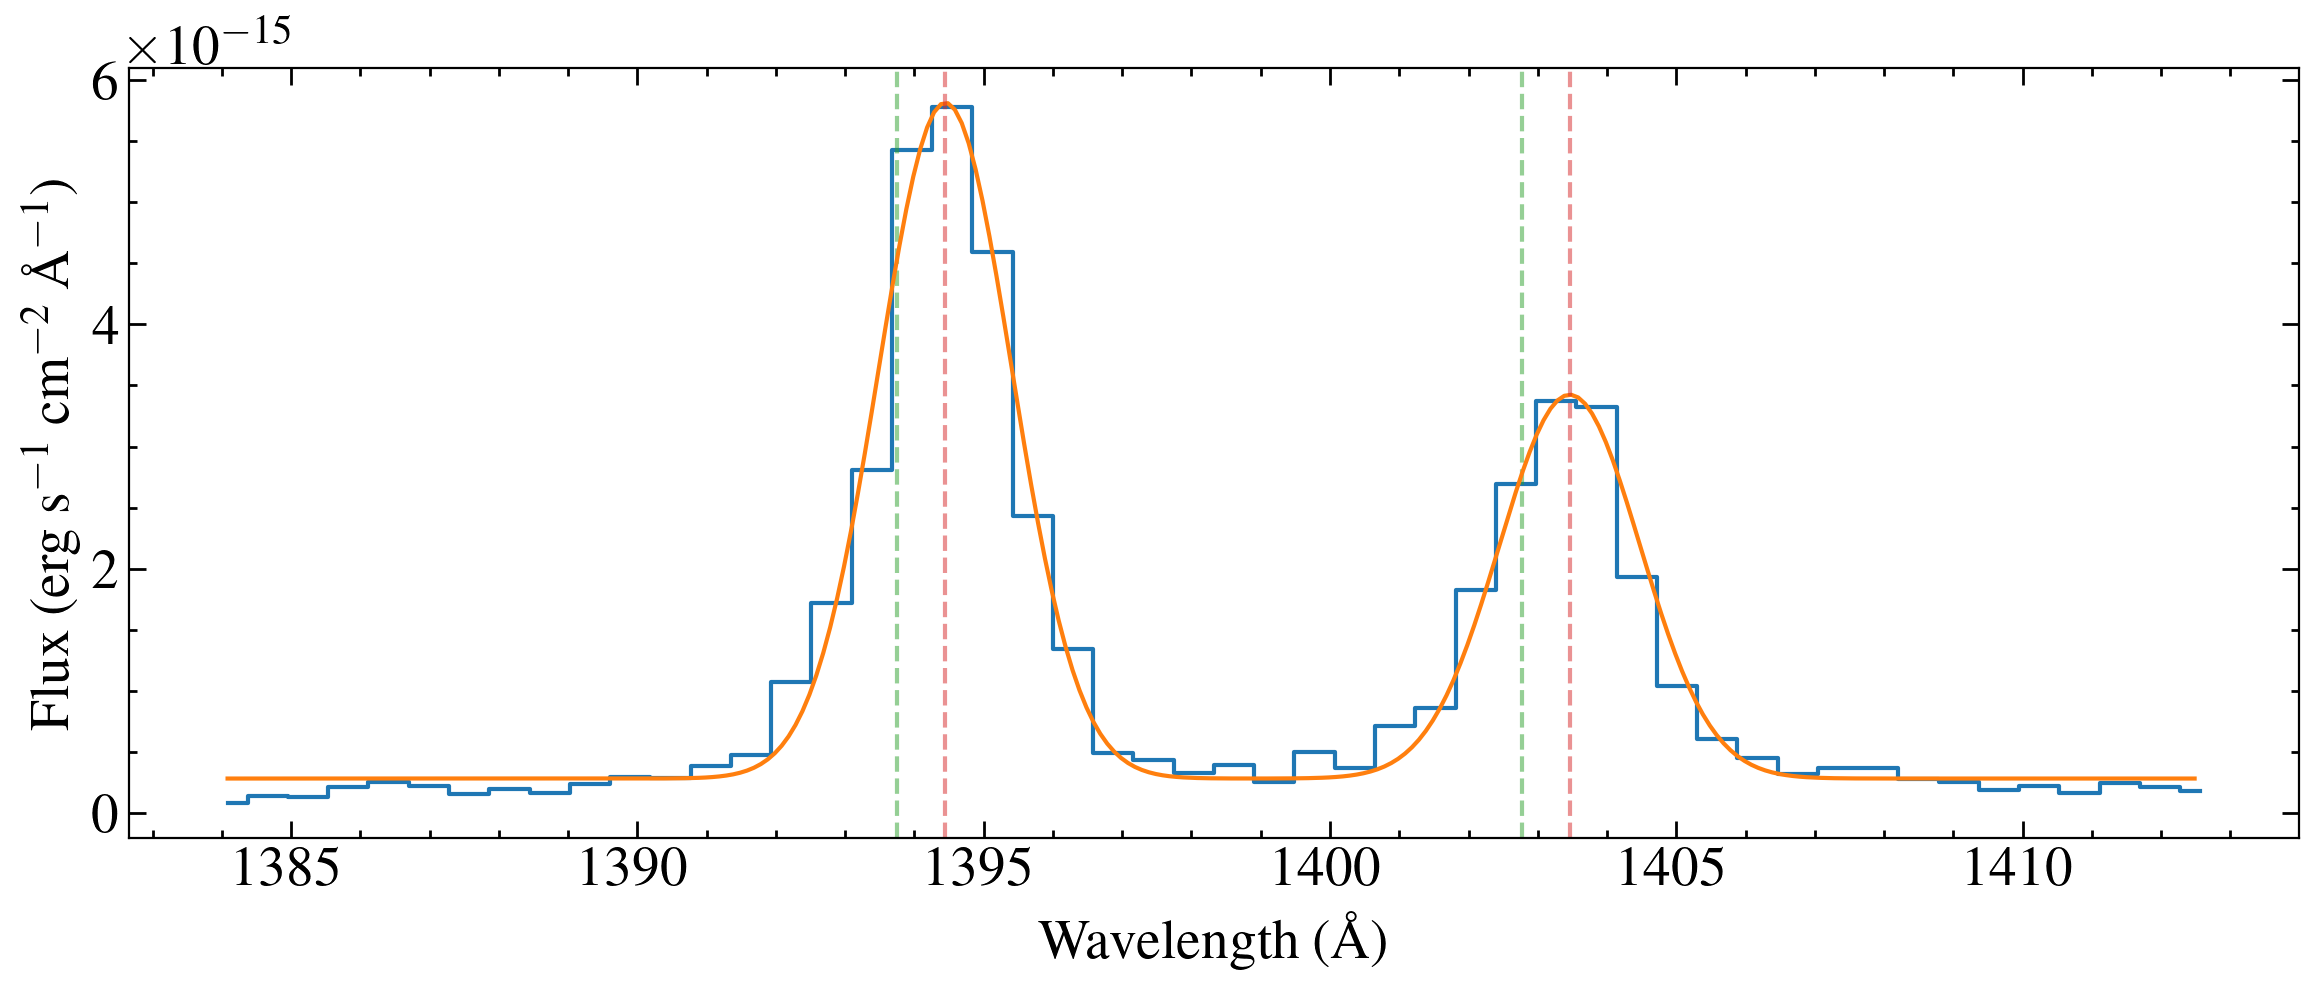

Gaussian
[8.77916021e-17 3.41669643e-16 2.68046883e-02 2.55316925e-02
 3.64371141e-16 5.14340628e-02]
110.37647951350809 km / s 5.190439345922023


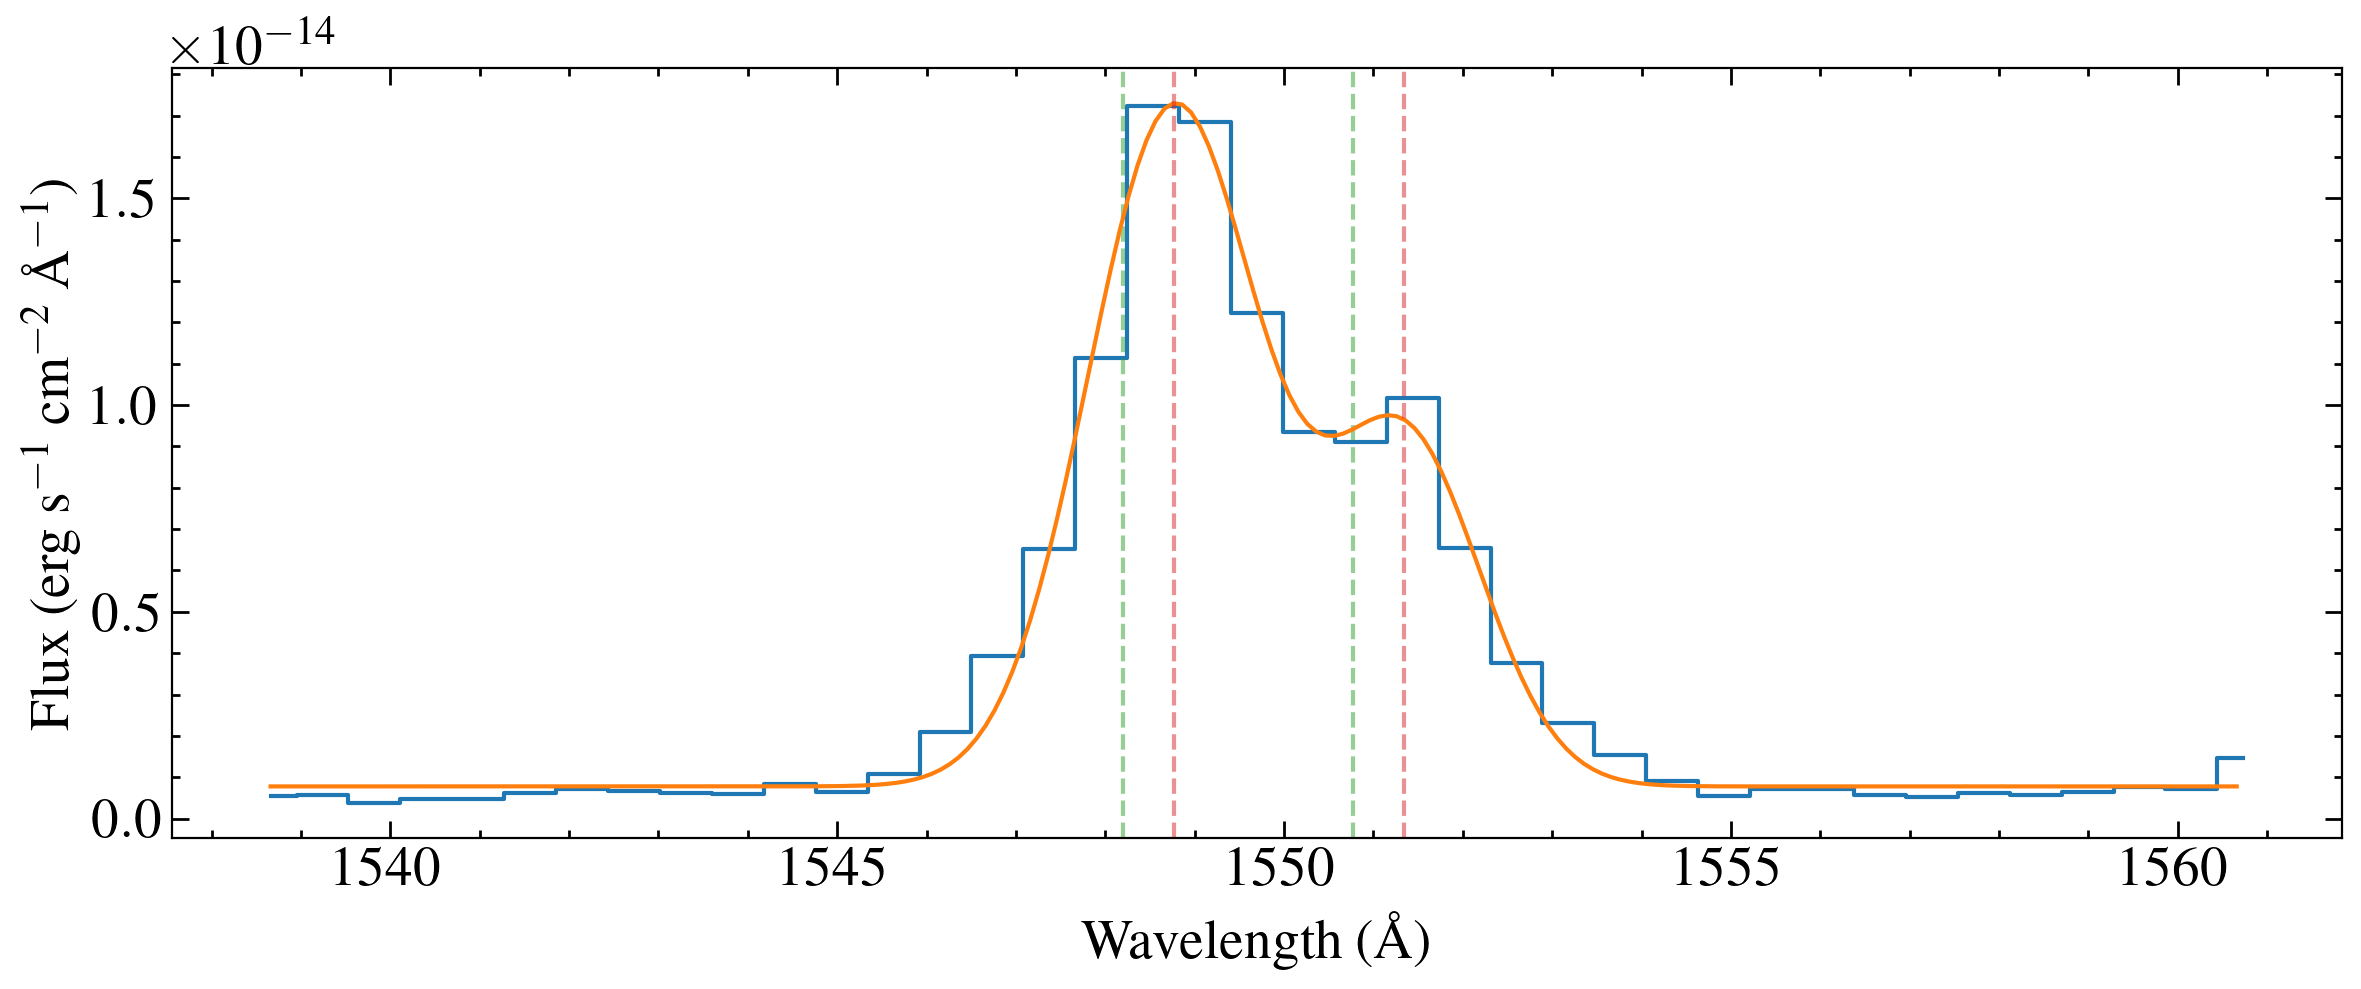

Gaussian
[1.16157460e-16 4.69350197e-16 3.02841621e-02 3.16866448e-02]
95.46537105406361 km / s 5.5345359149117215


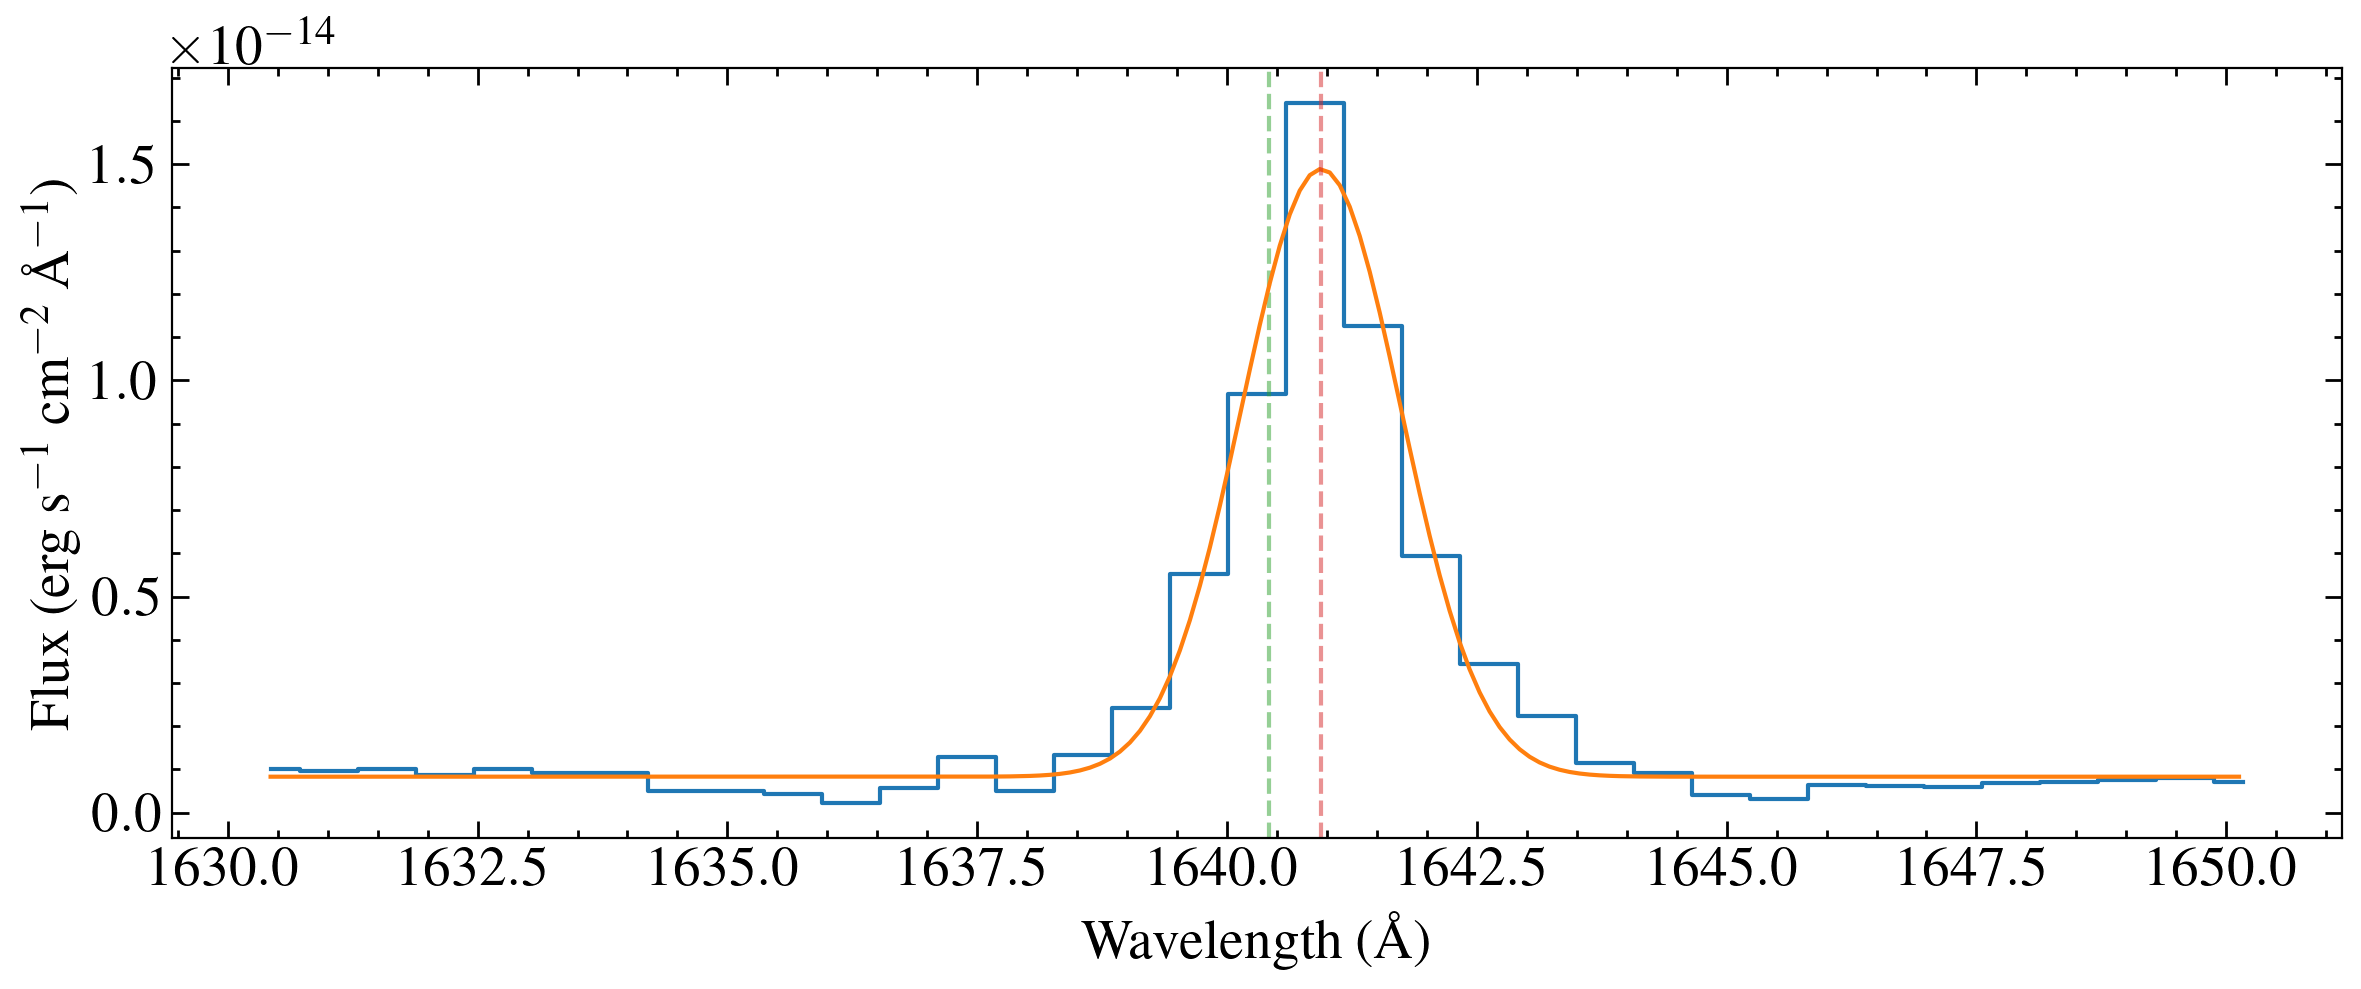

115.36509328352899 110.37647951350809 24.496589308528865


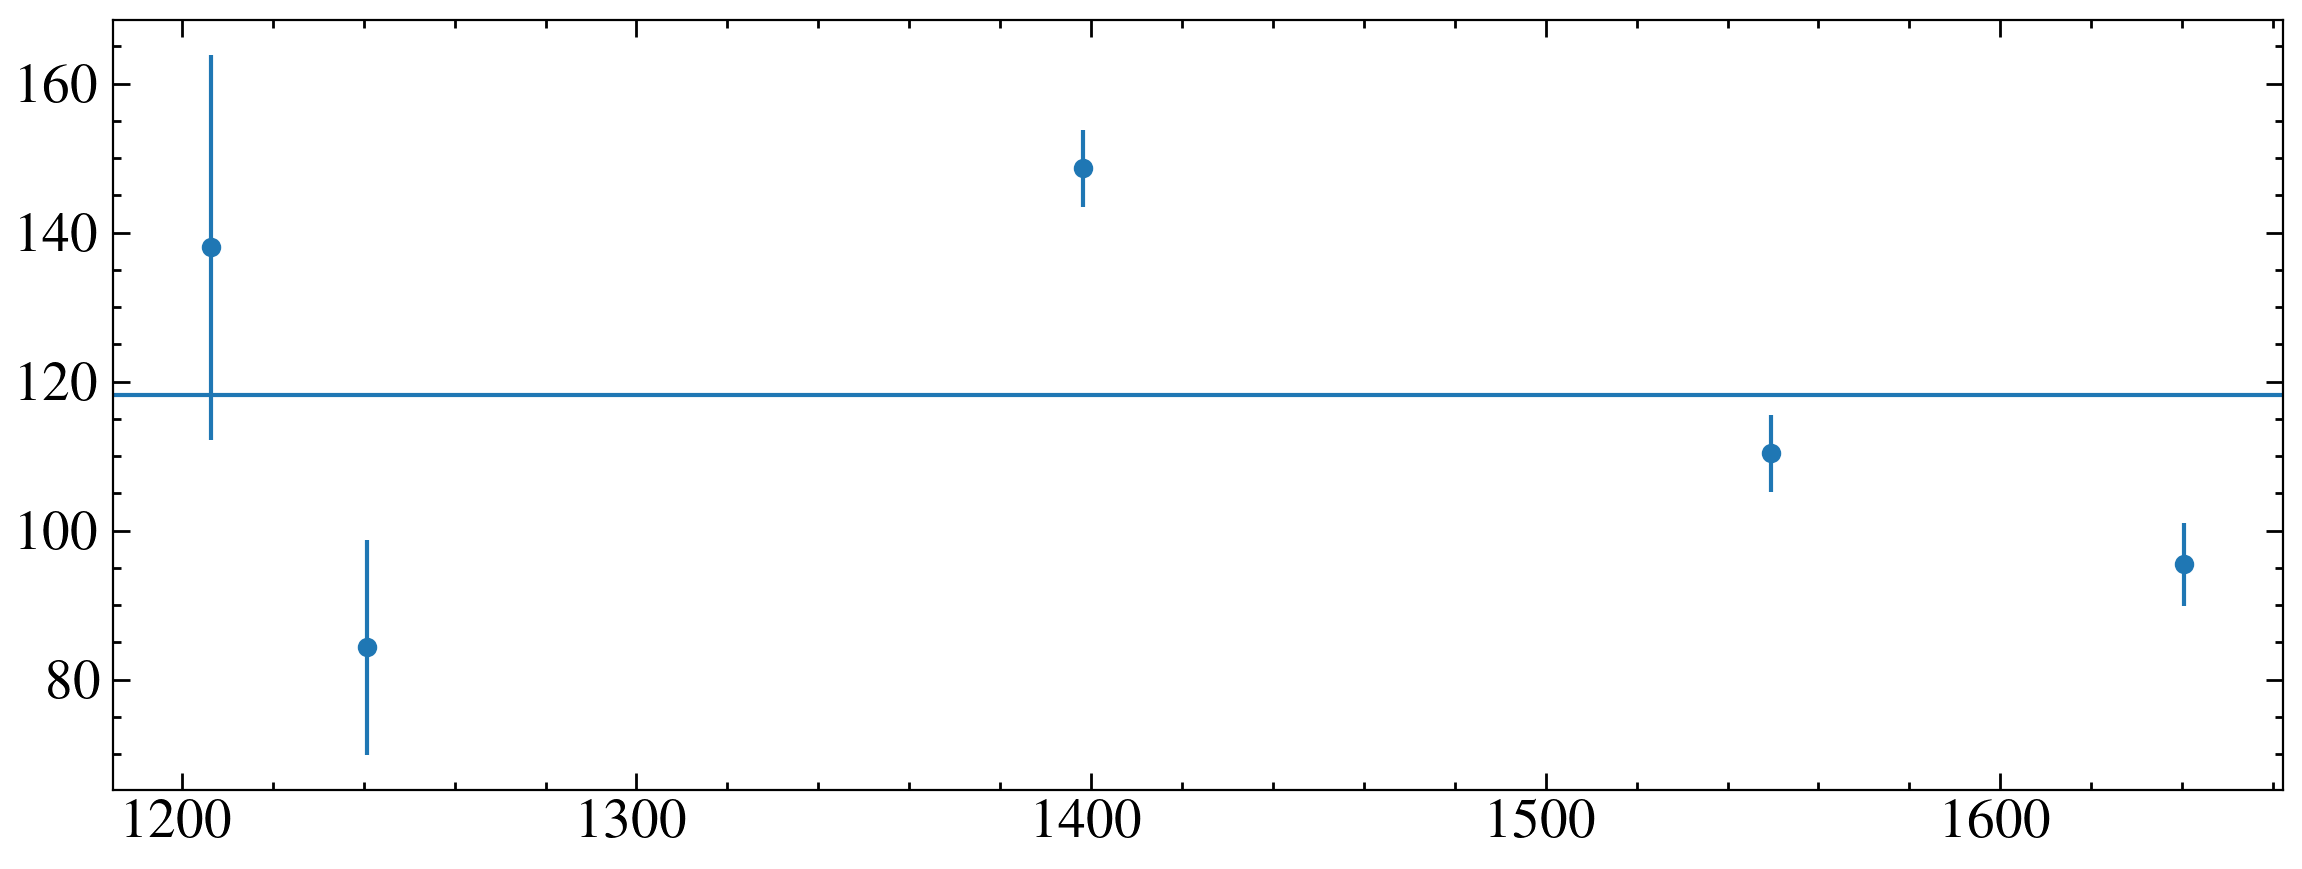

Gaussian
[1.41659028e-16 5.00540168e-16 1.33806334e-01 1.41932901e-01]
80.19121485125264 km / s 33.24837369622057


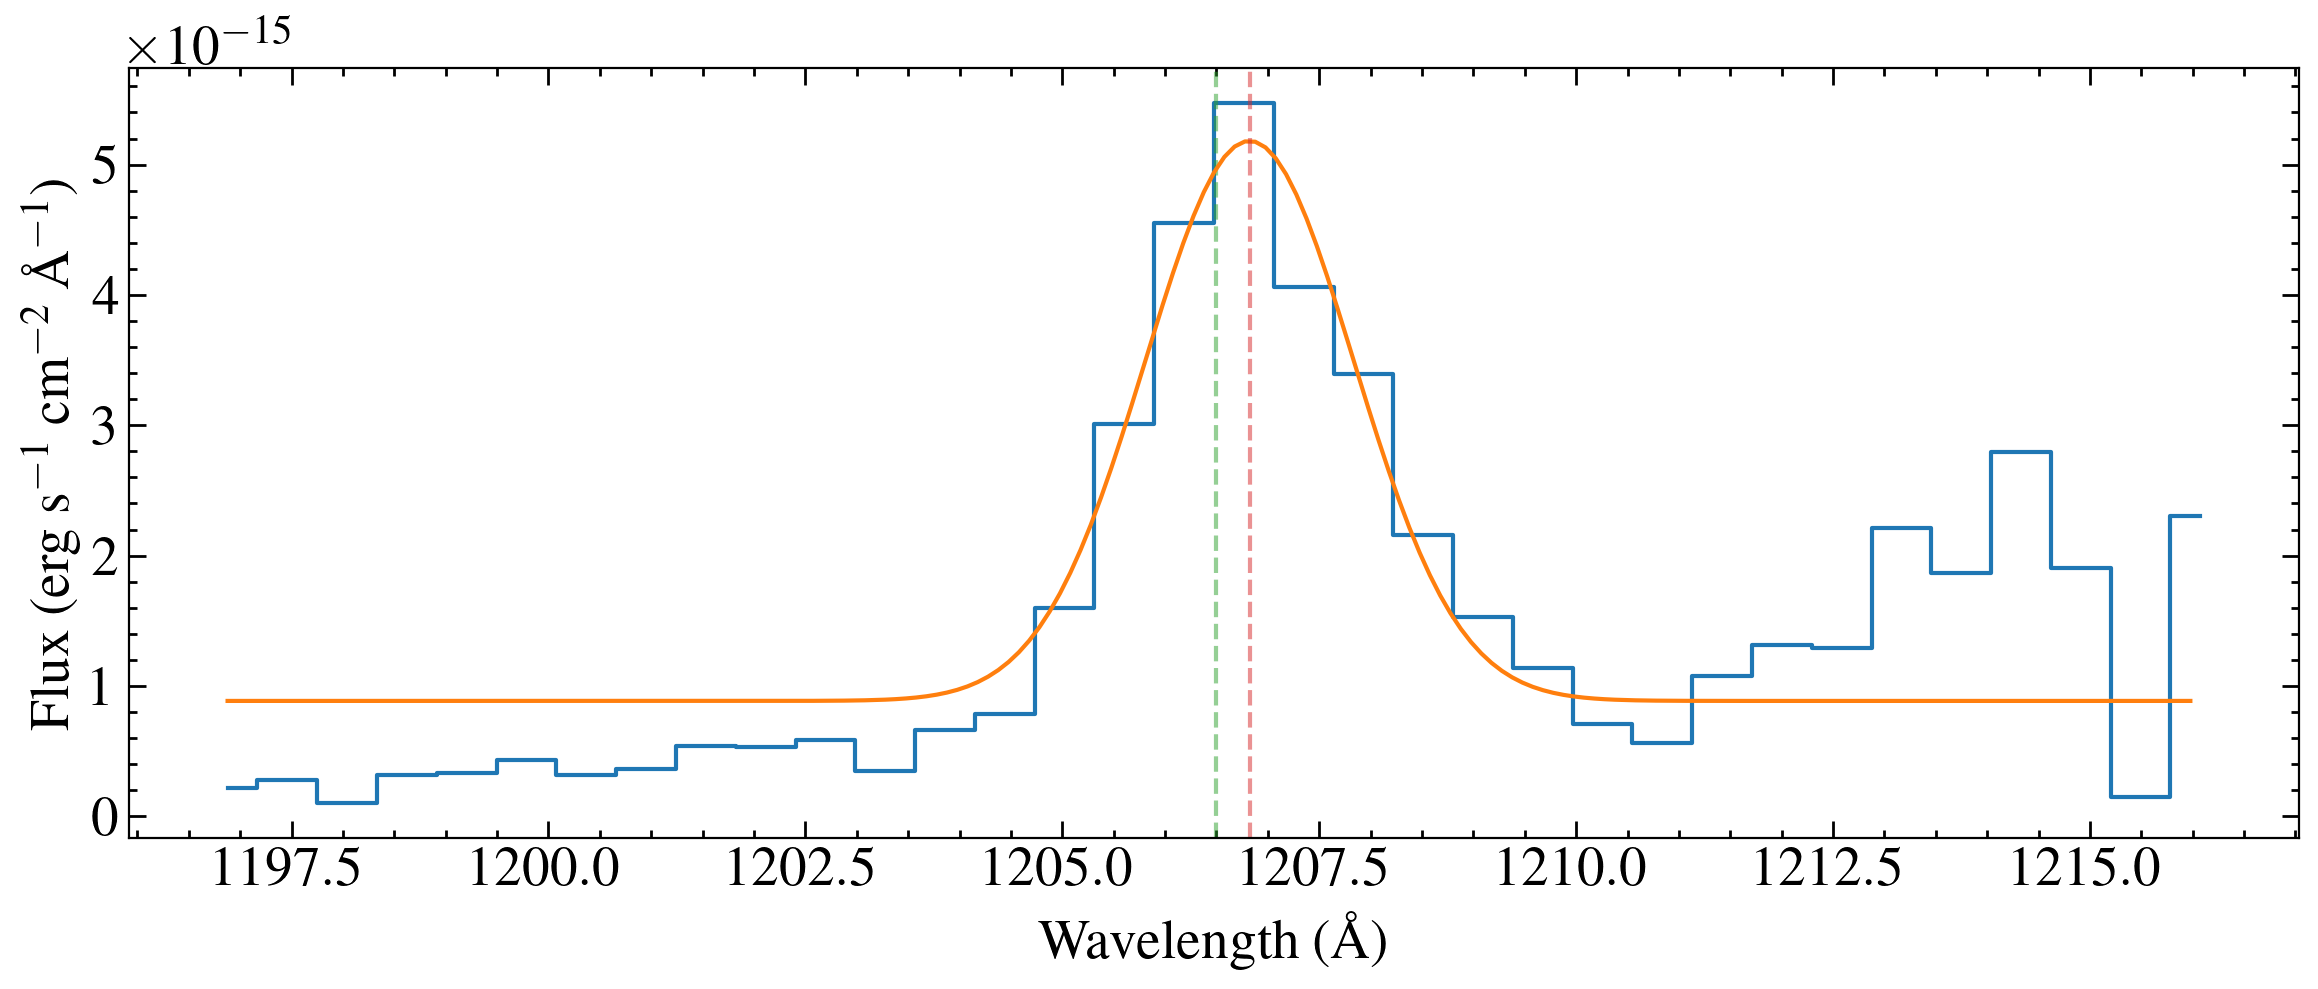

Gaussian
[1.80963974e-17 6.25309603e-17 6.72431314e-02 7.21338974e-02
 6.95504545e-17 1.38406499e-01]
79.18404521766259 km / s 16.27271707701639


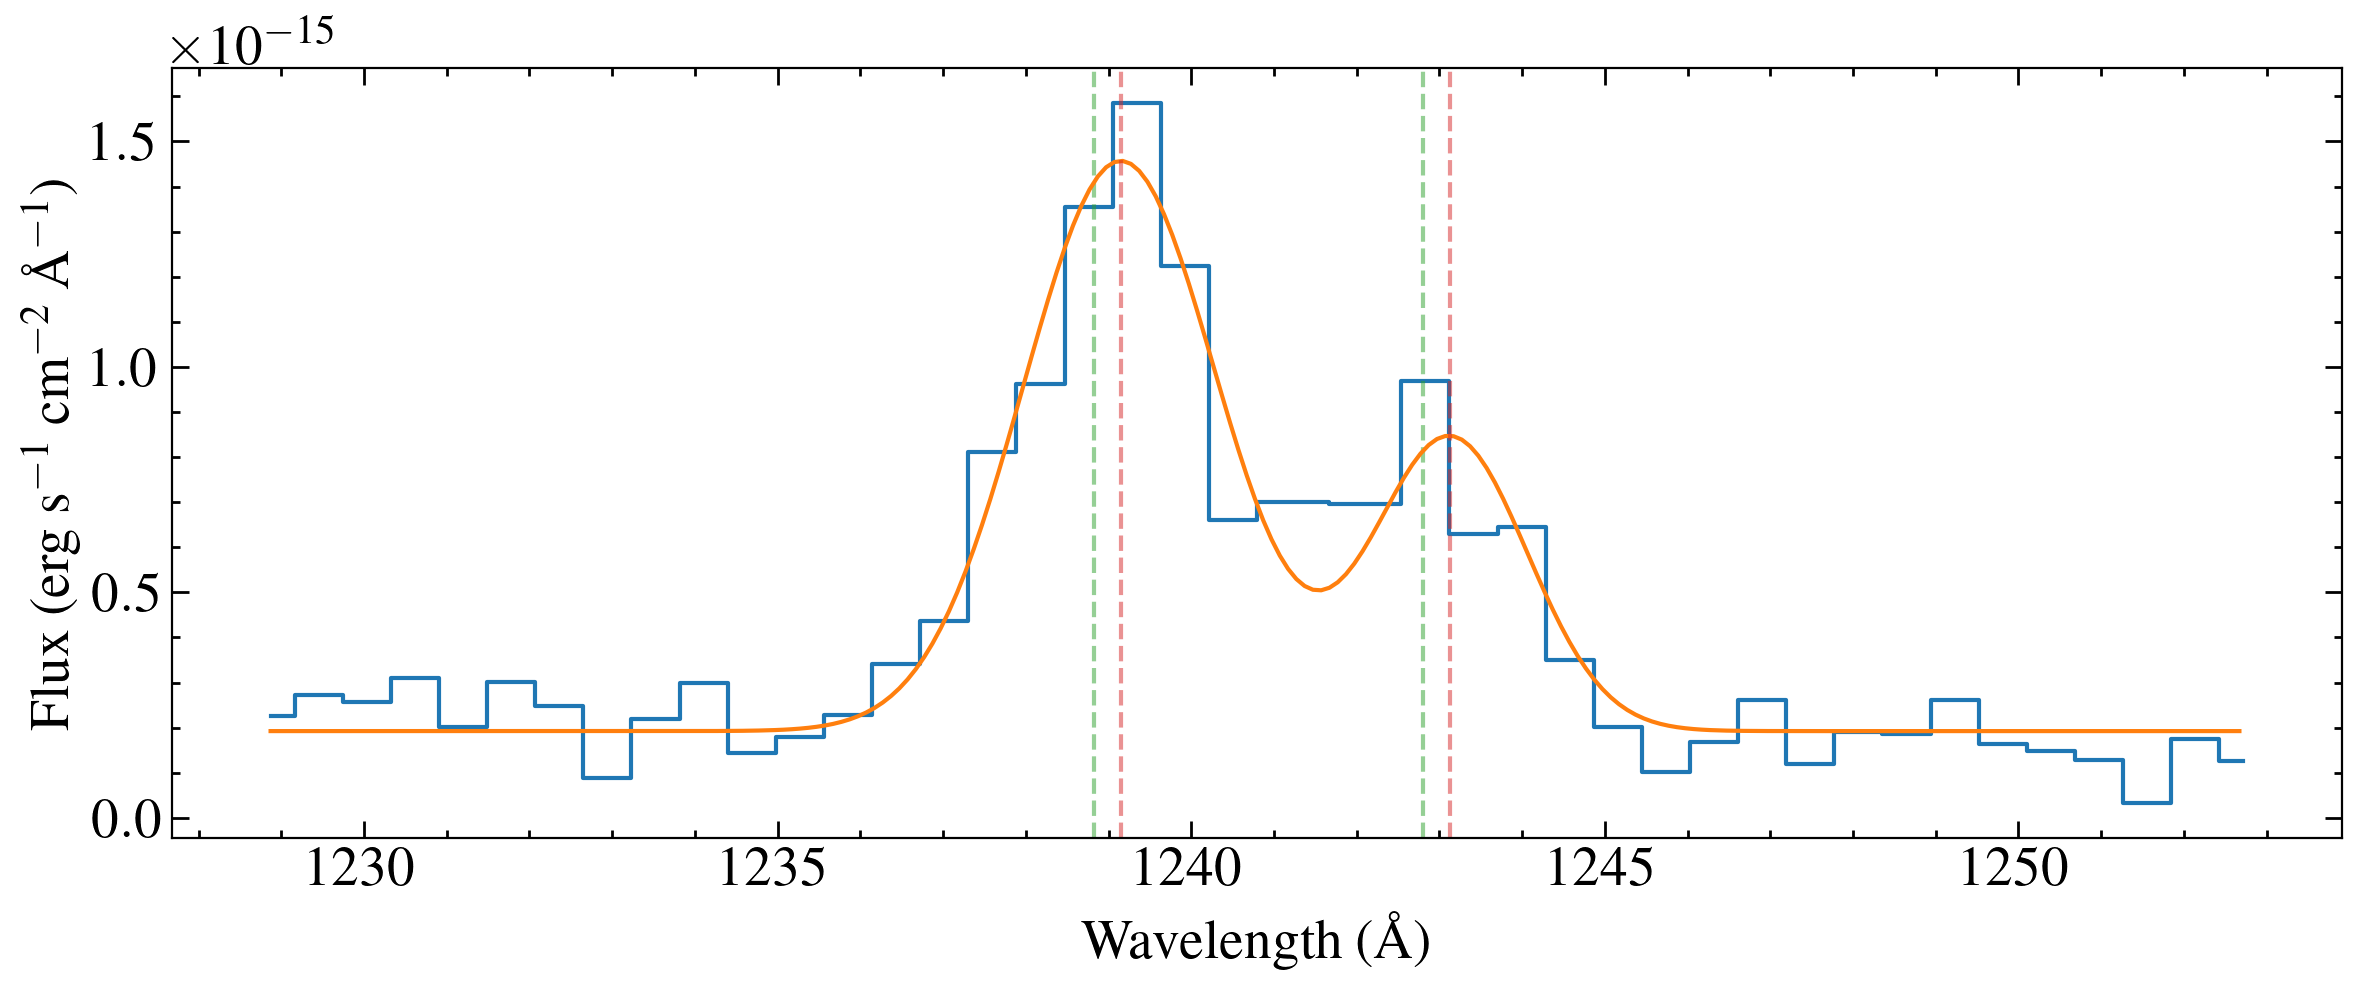

Gaussian
[2.52279860e-17 1.01736712e-16 3.00633440e-02 3.14612751e-02
 9.64645821e-17 6.26624777e-02]
79.07119207593013 km / s 6.466533781683076


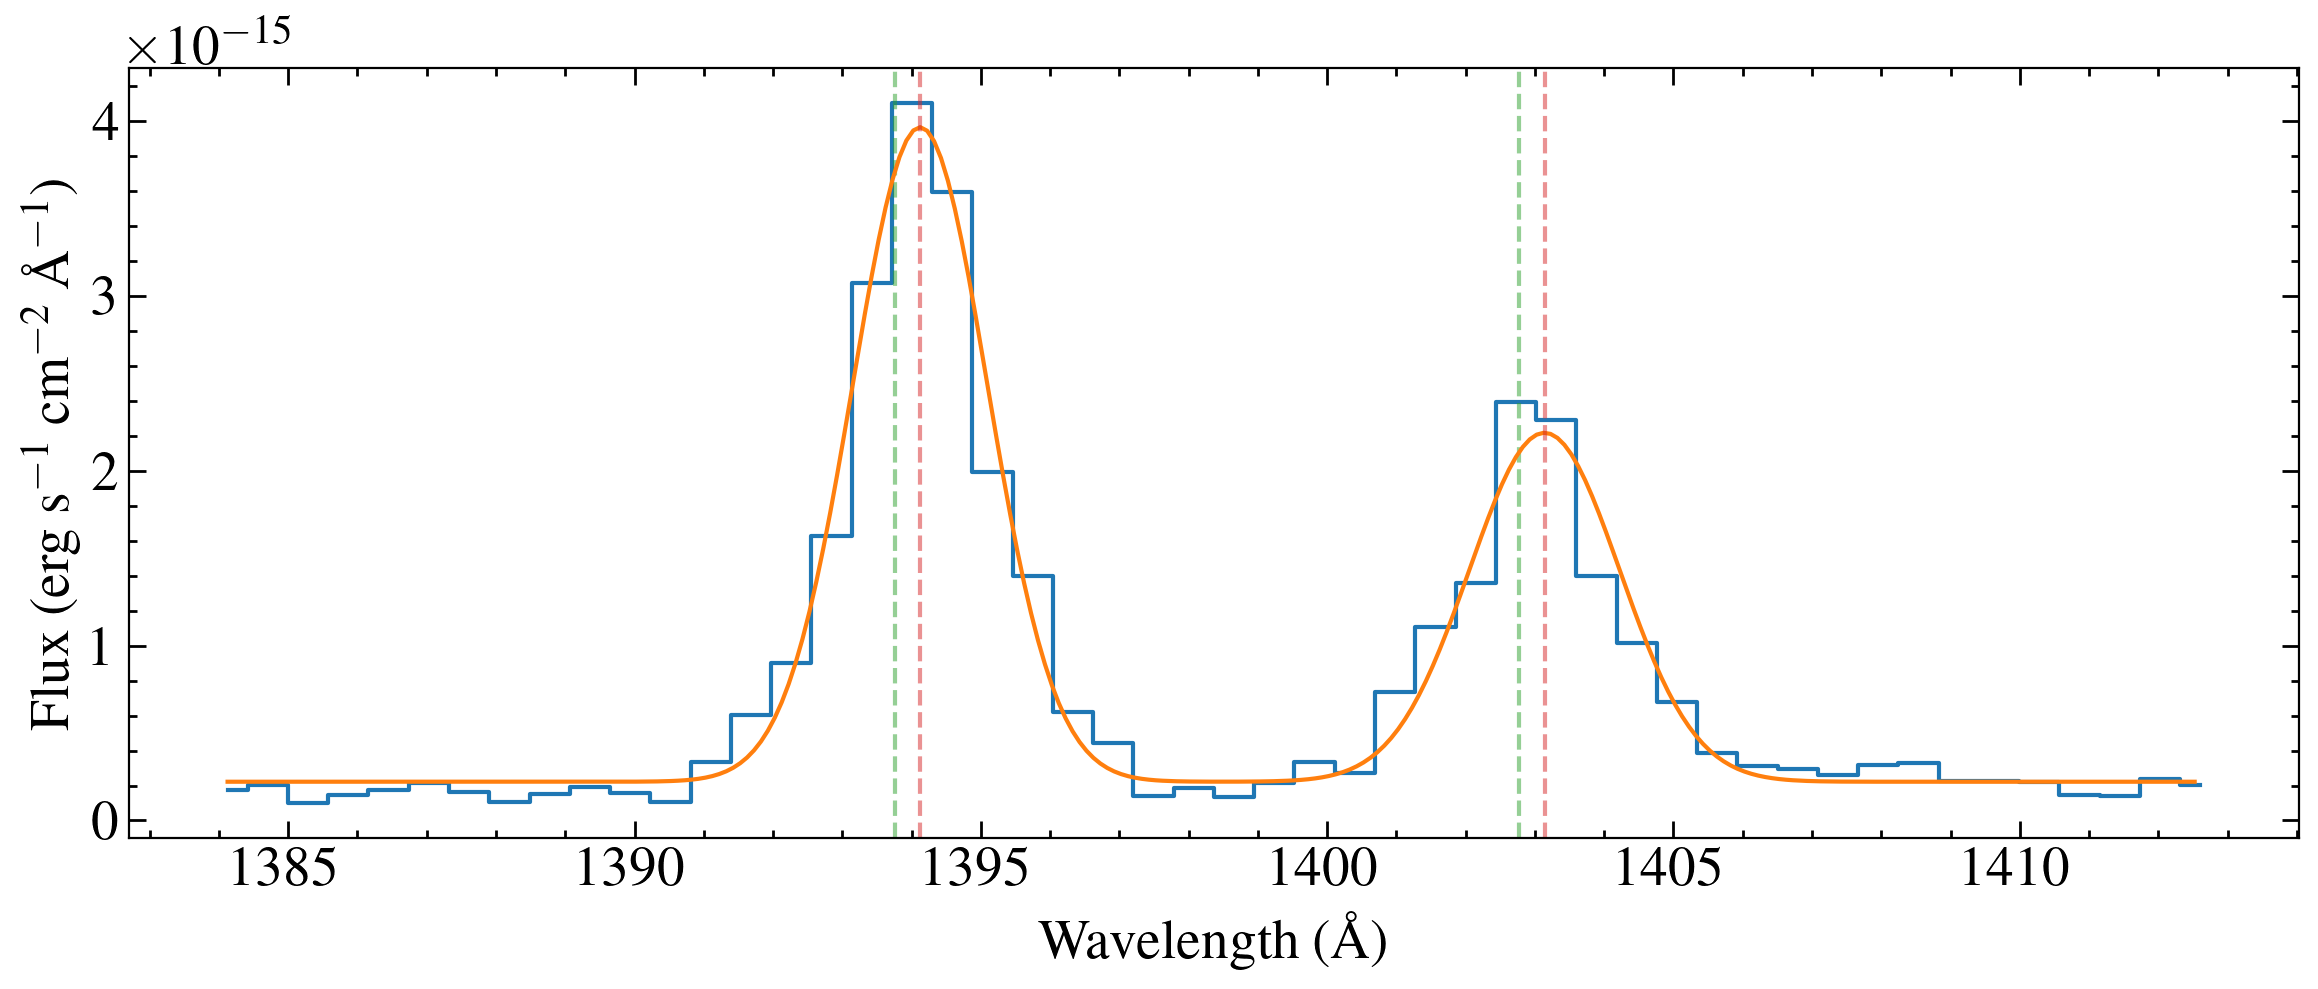

Gaussian
[9.42177797e-17 3.76171907e-16 4.06547606e-02 4.15036061e-02
 4.26648077e-16 5.47027743e-02]
76.23289154699458 km / s 7.8723567555513085


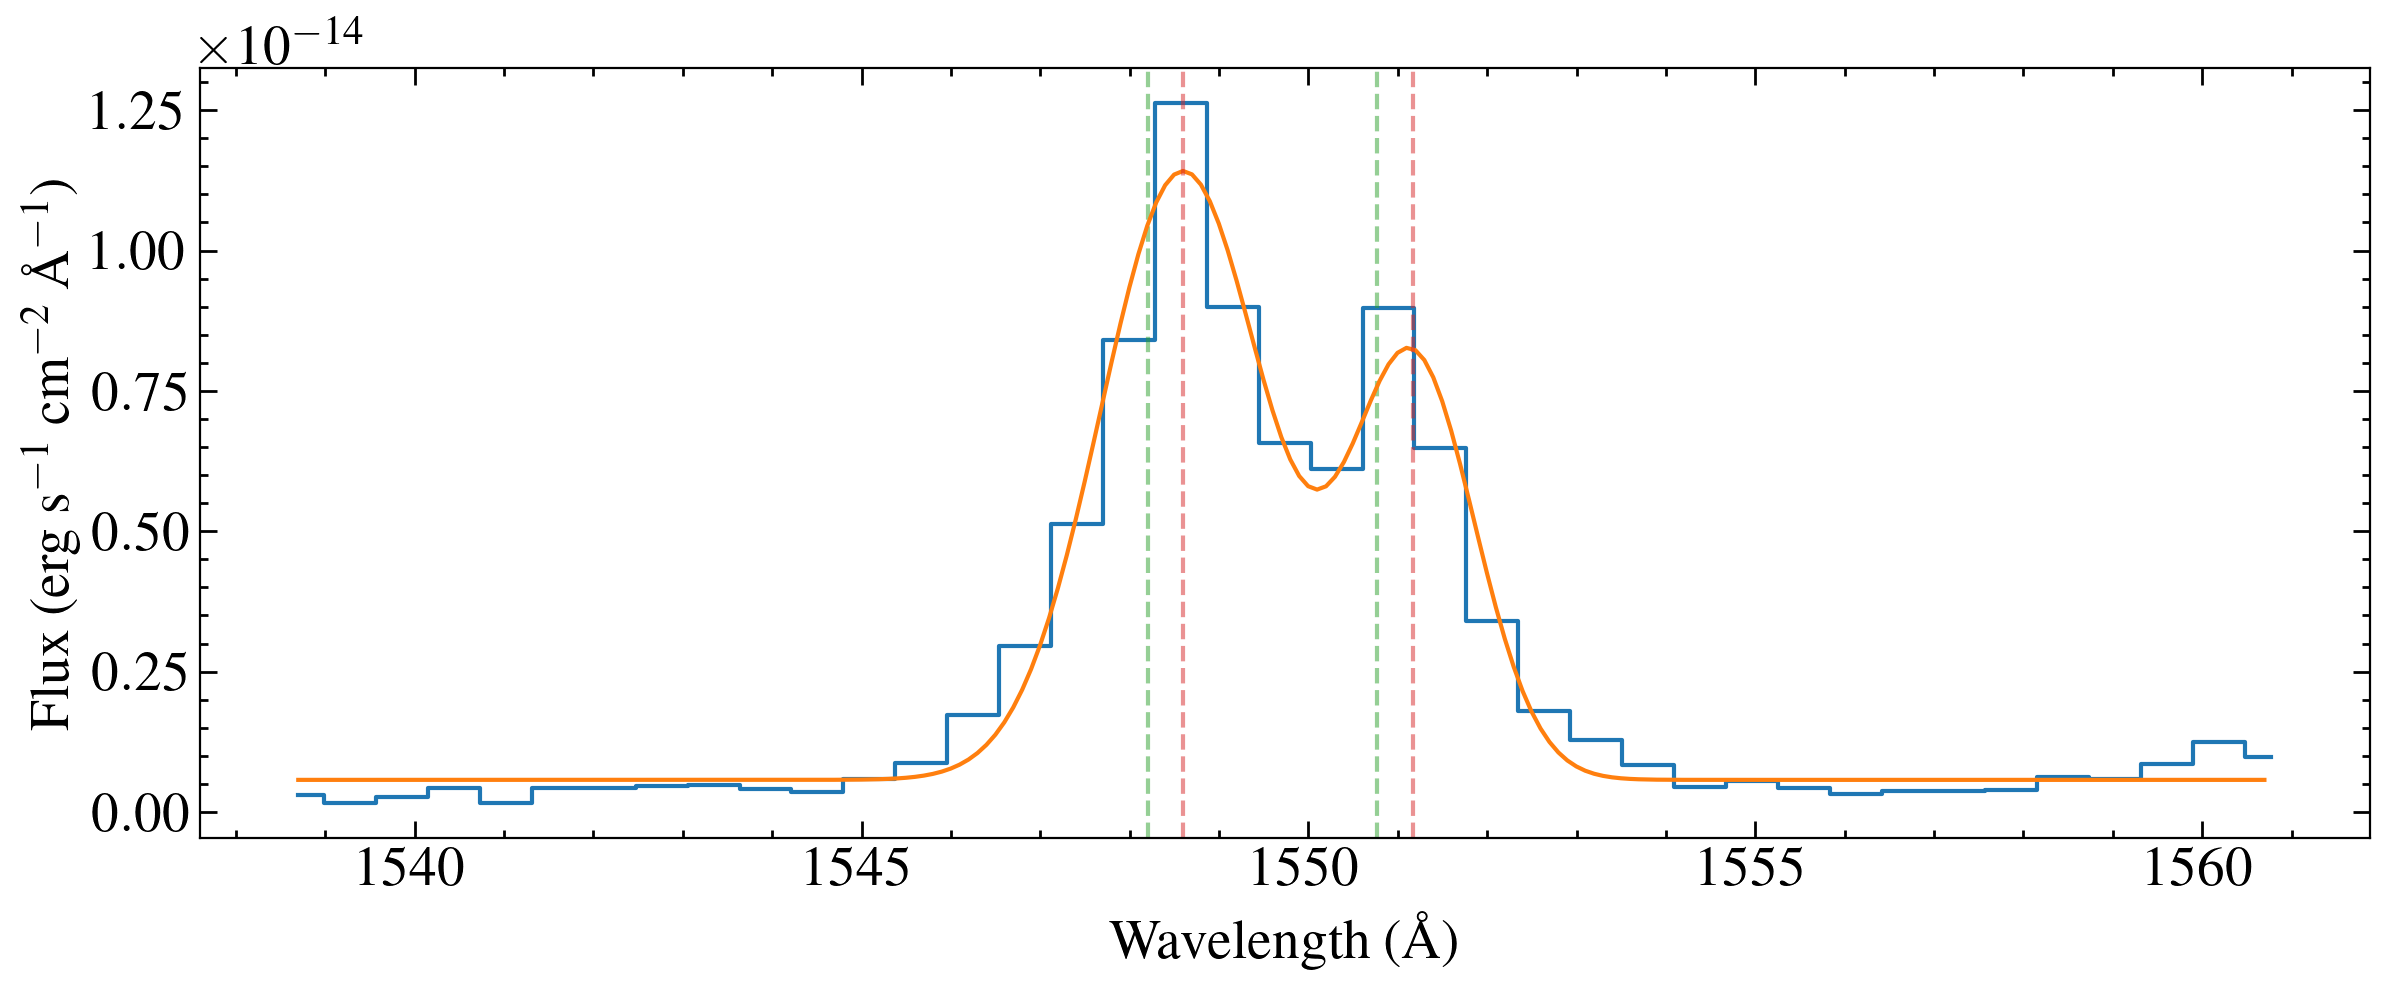

Gaussian
[1.06808979e-16 4.71829280e-16 2.88256259e-02 2.99428182e-02]
49.39870992921125 km / s 5.267983340049511


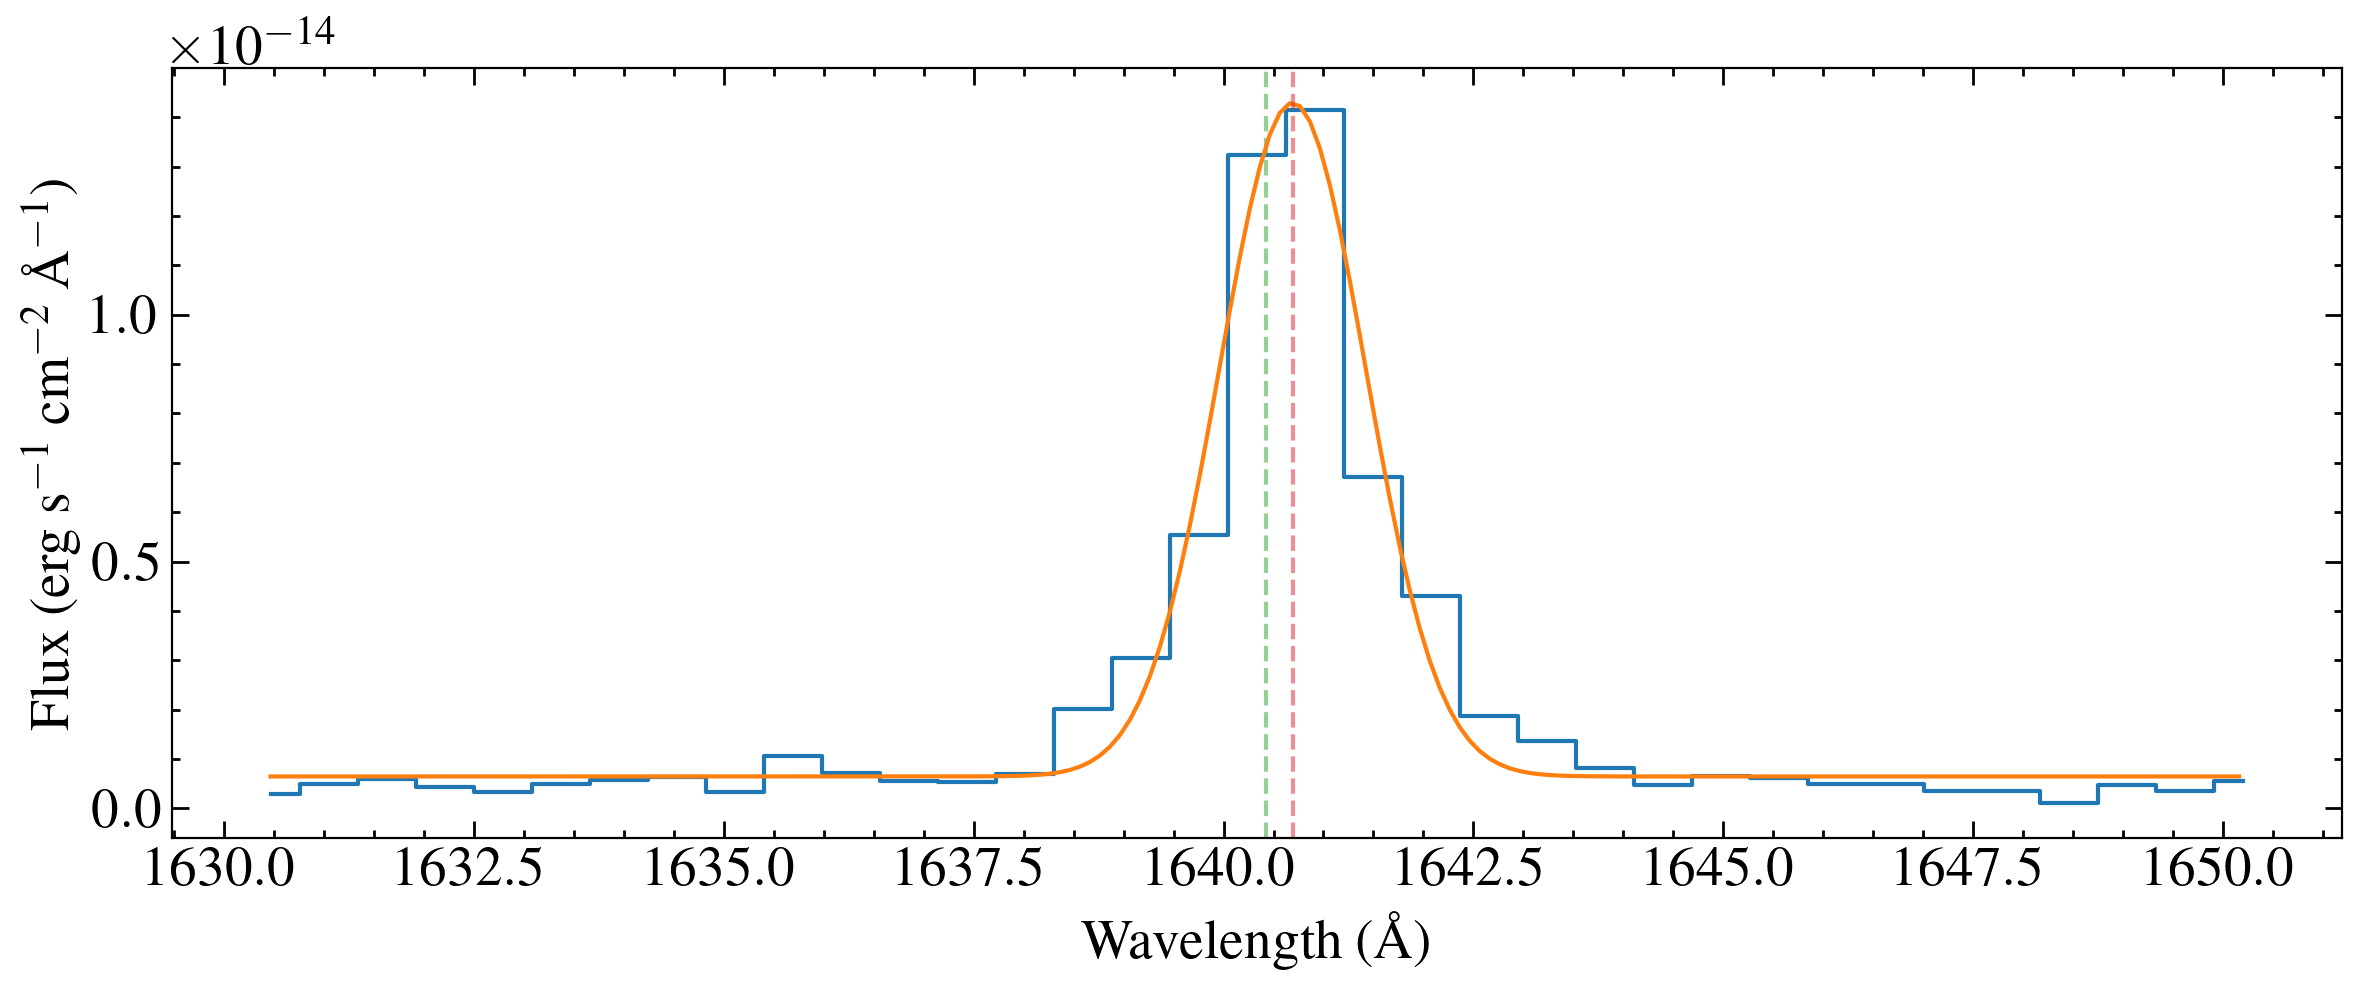

72.81561072421023 79.07119207593013 11.782341390817175


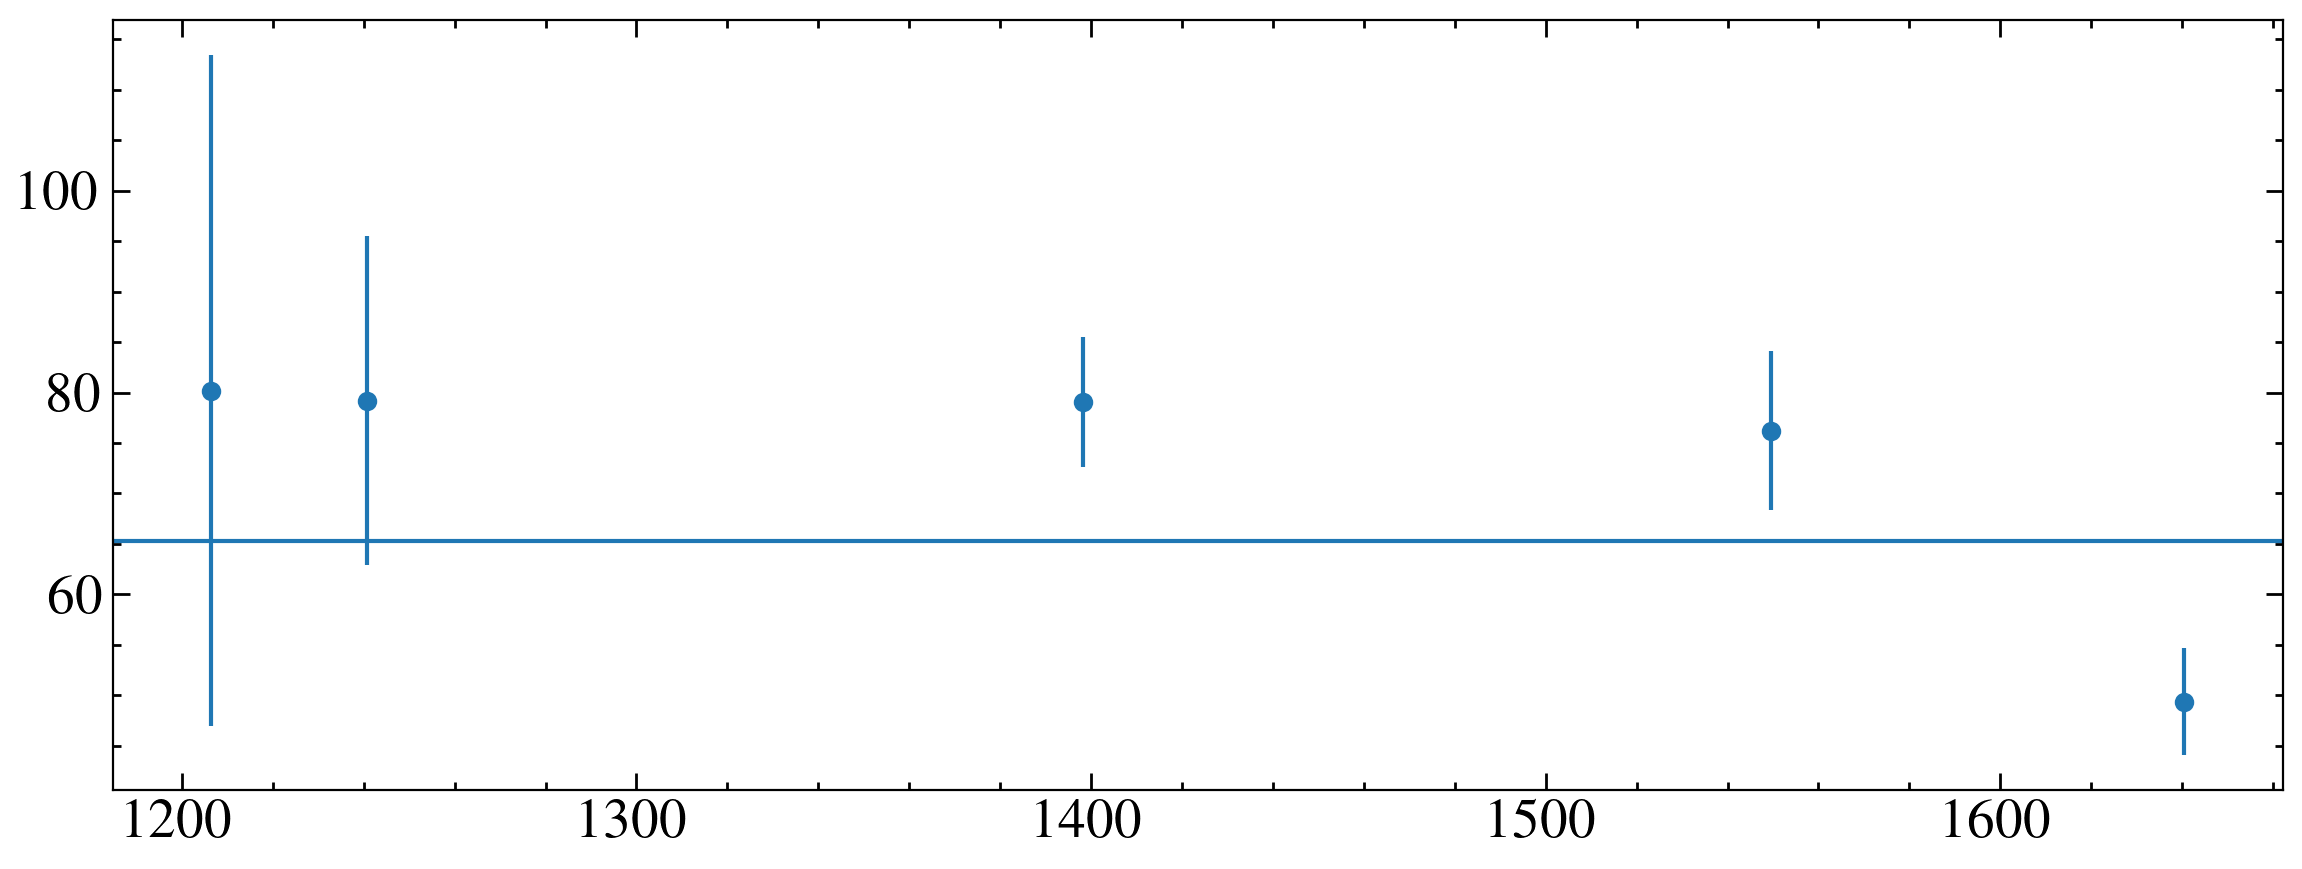

Gaussian
[1.44557534e-16 5.01614291e-16 1.39695341e-01 1.48496392e-01]
122.50516105538382 km / s 34.71168206069492


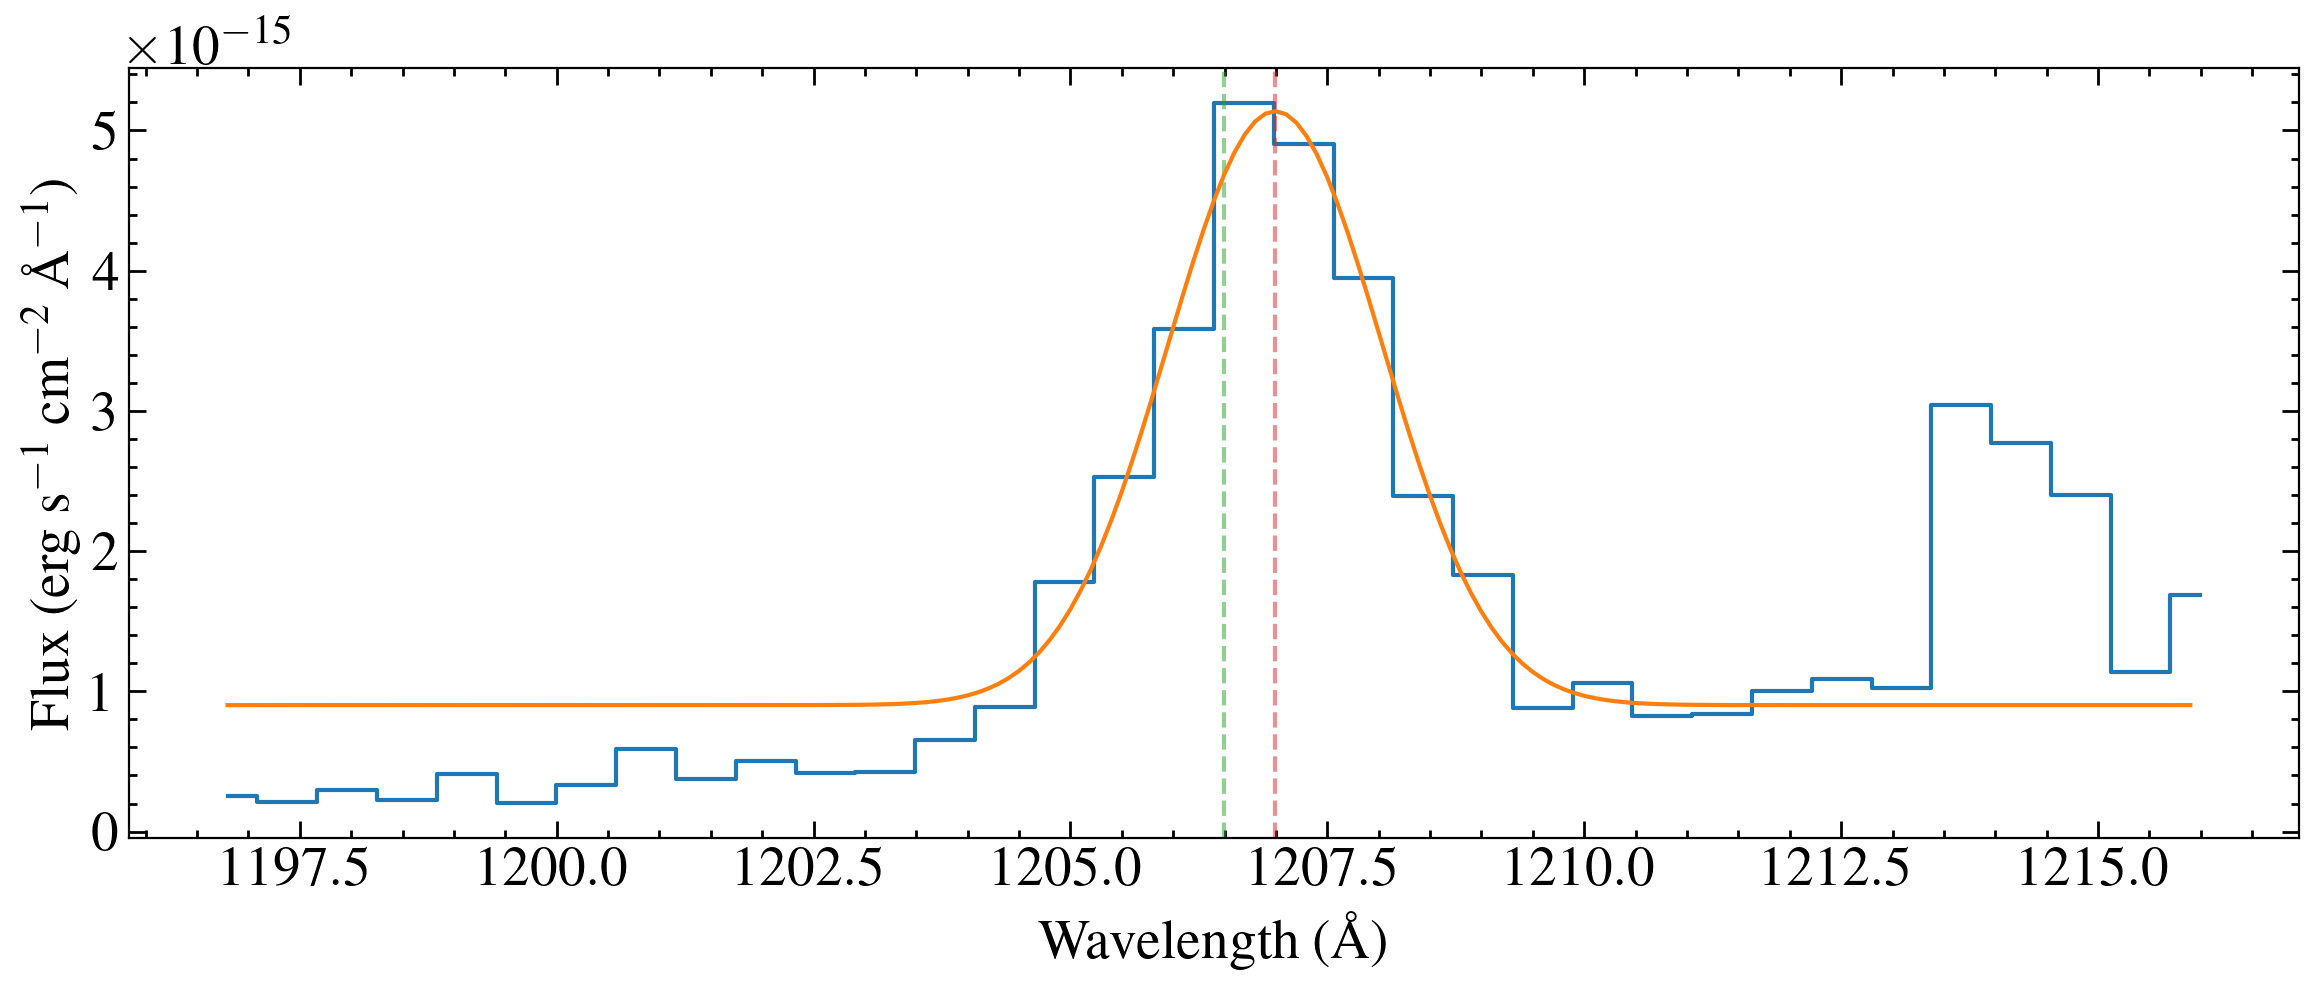

Gaussian
[1.51115397e-17 4.84790205e-17 5.90345249e-02 5.85079546e-02
 4.85853151e-17 1.66533283e-01]
125.08514828385958 km / s 14.286249050525612


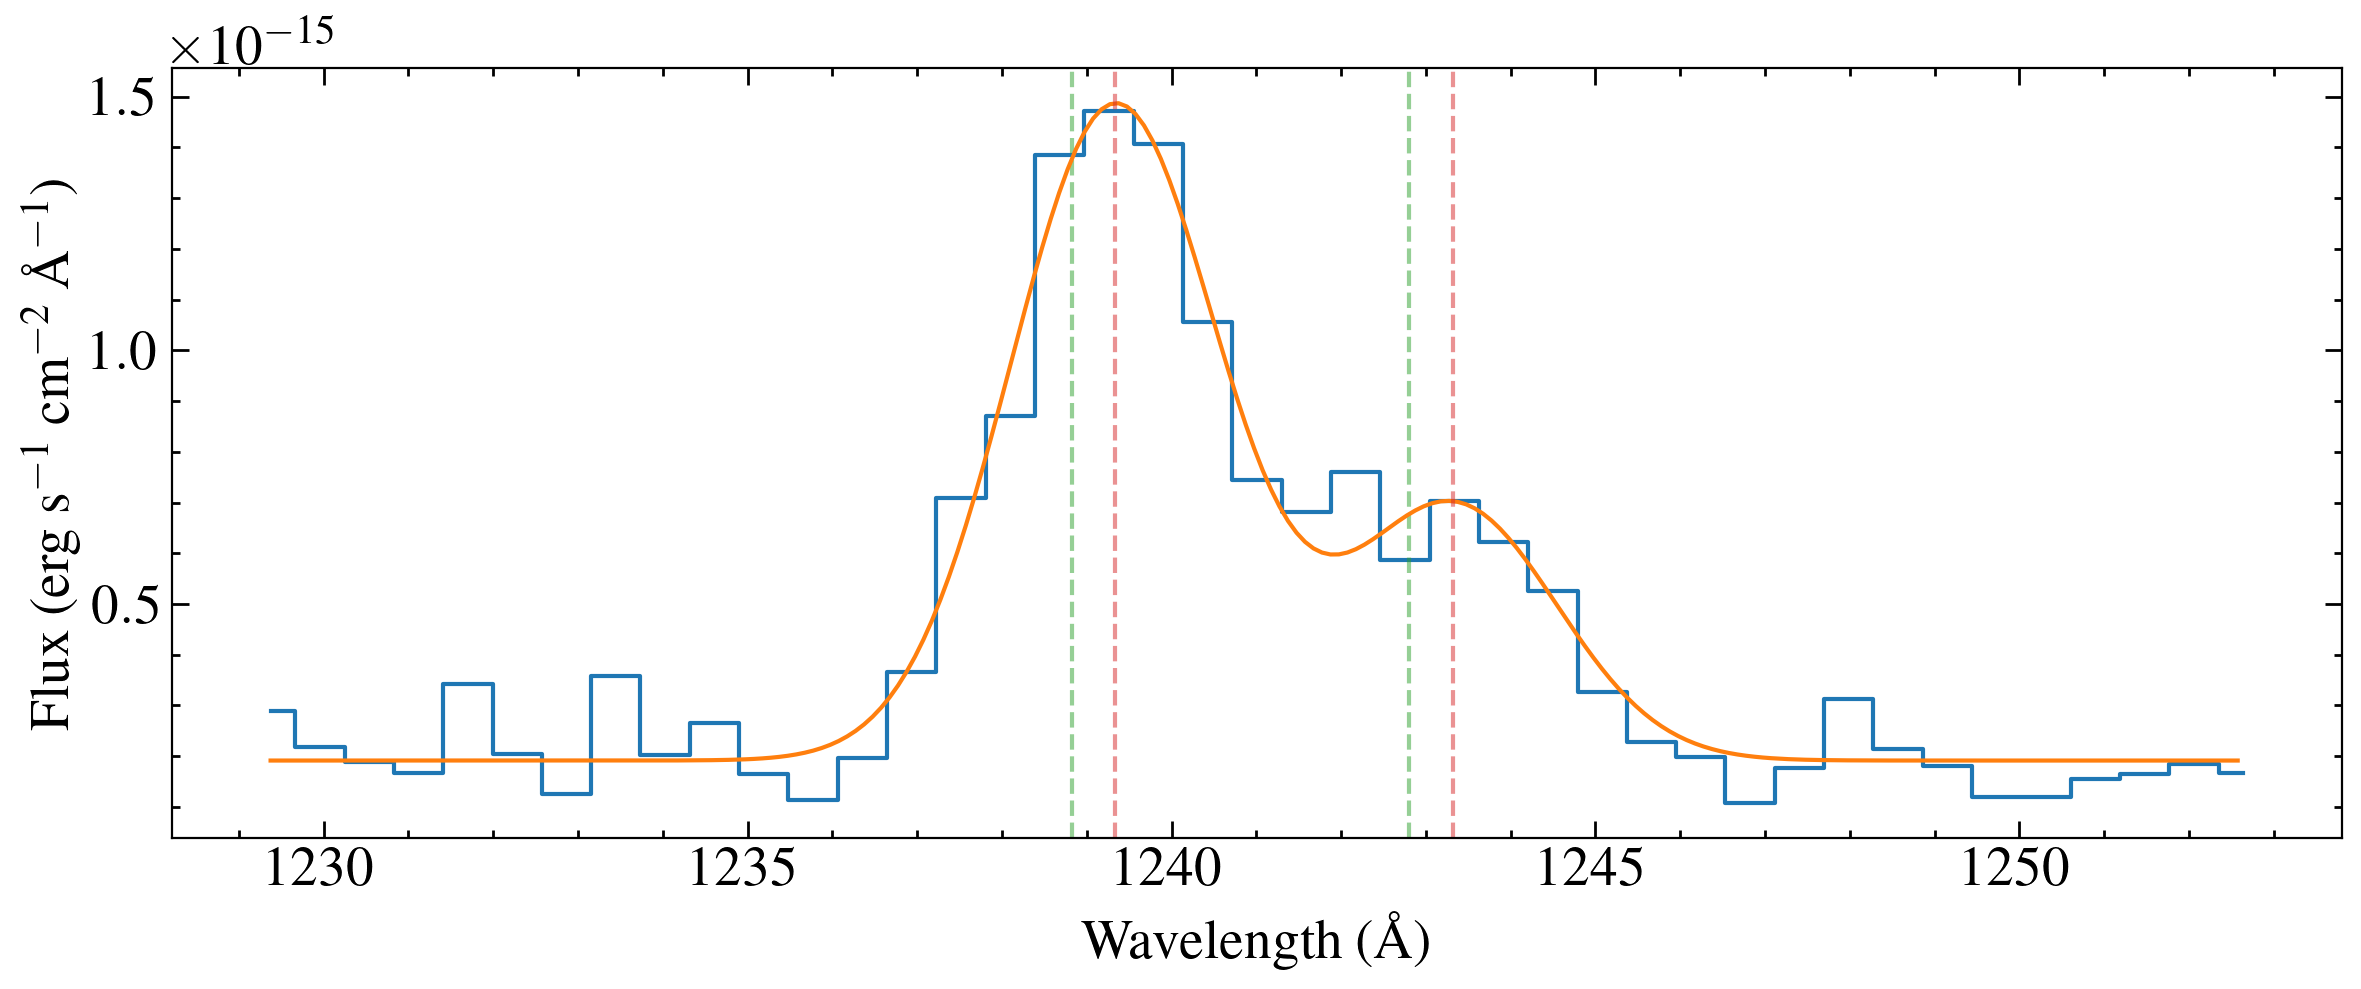

Gaussian
[2.35594459e-17 9.83164275e-17 2.37892245e-02 2.48216235e-02
 9.37754435e-17 5.52415344e-02]
135.54310304855701 km / s 5.116989767695017


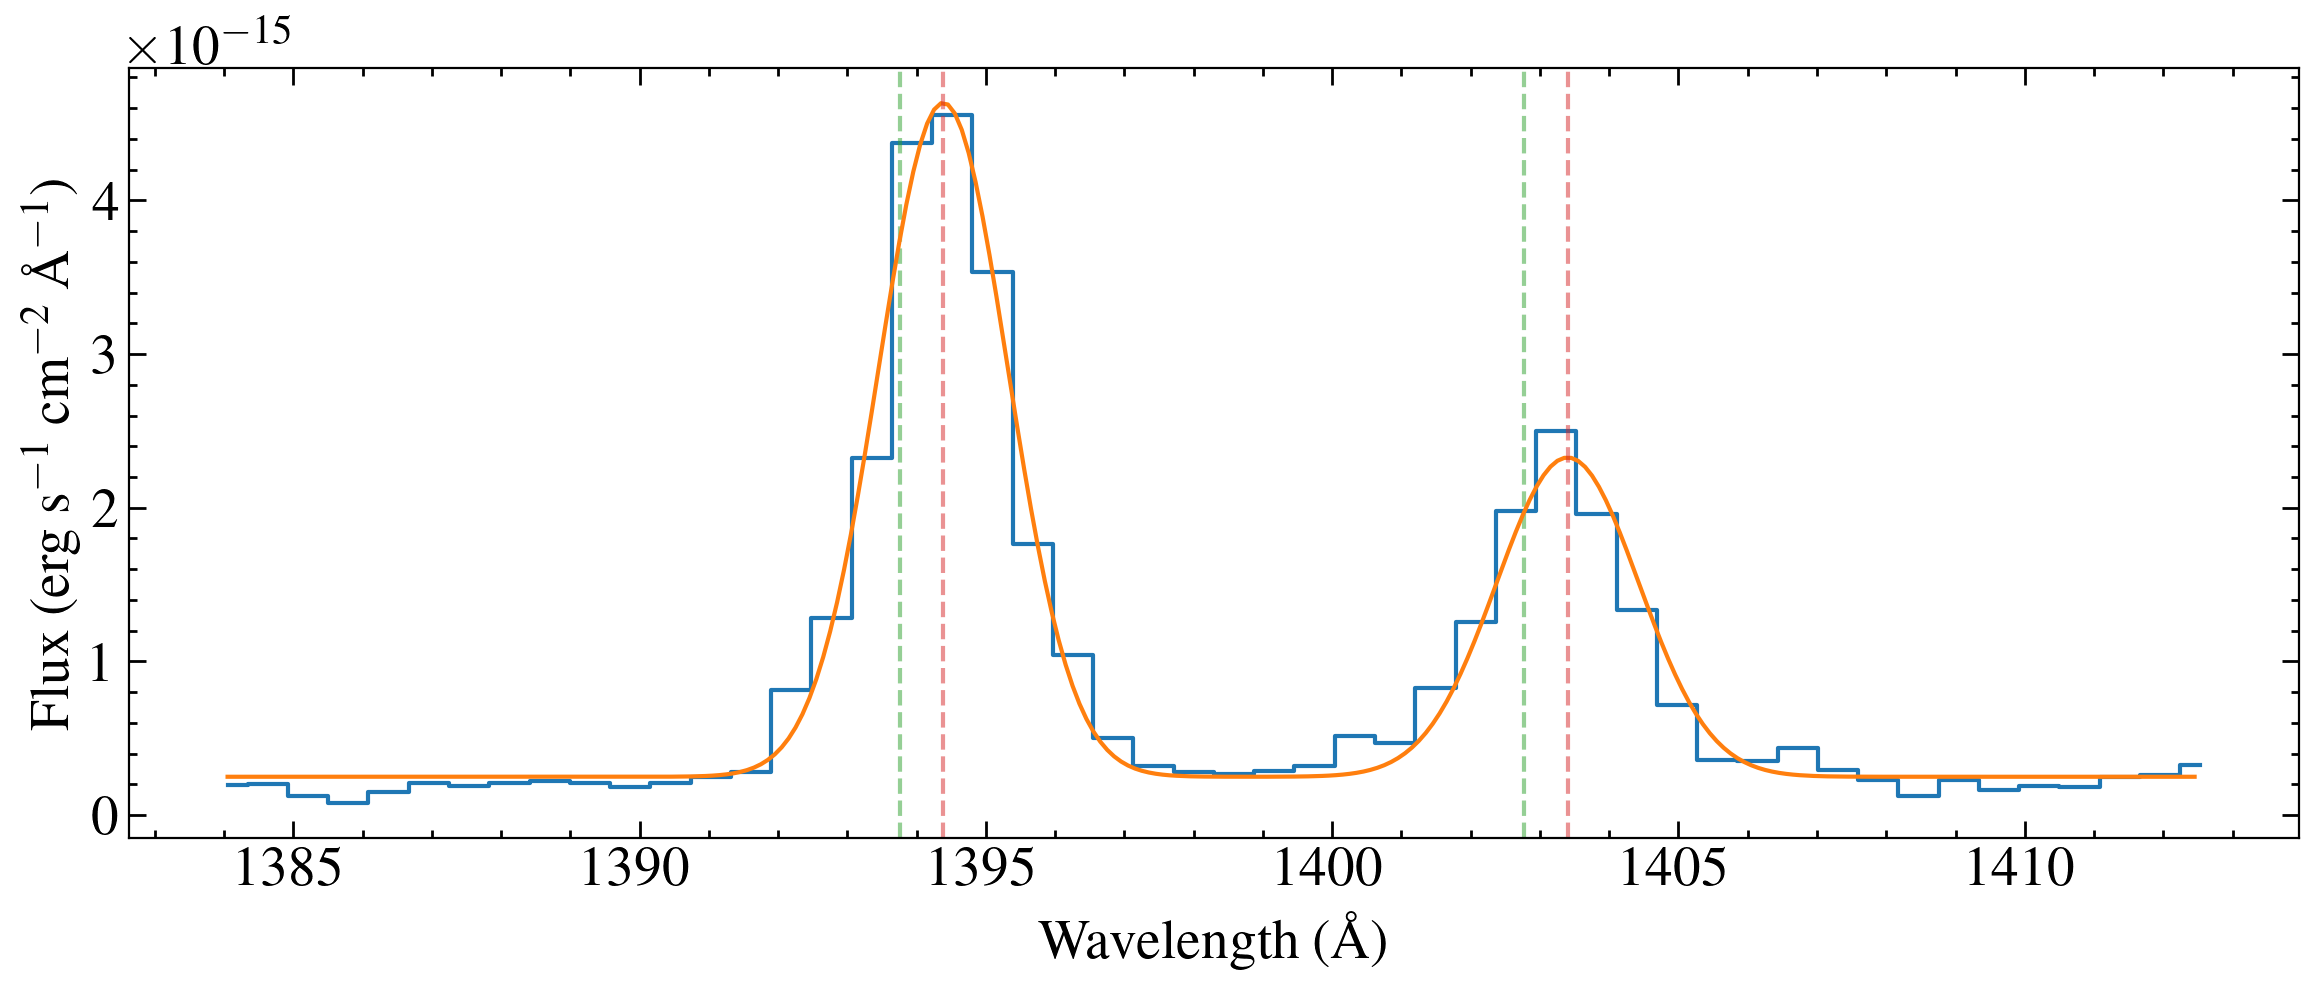

Gaussian
[8.94327508e-17 3.61930778e-16 3.32162108e-02 3.22429158e-02
 3.74727873e-16 5.95000141e-02]
113.64308674180886 km / s 6.4319616702624955


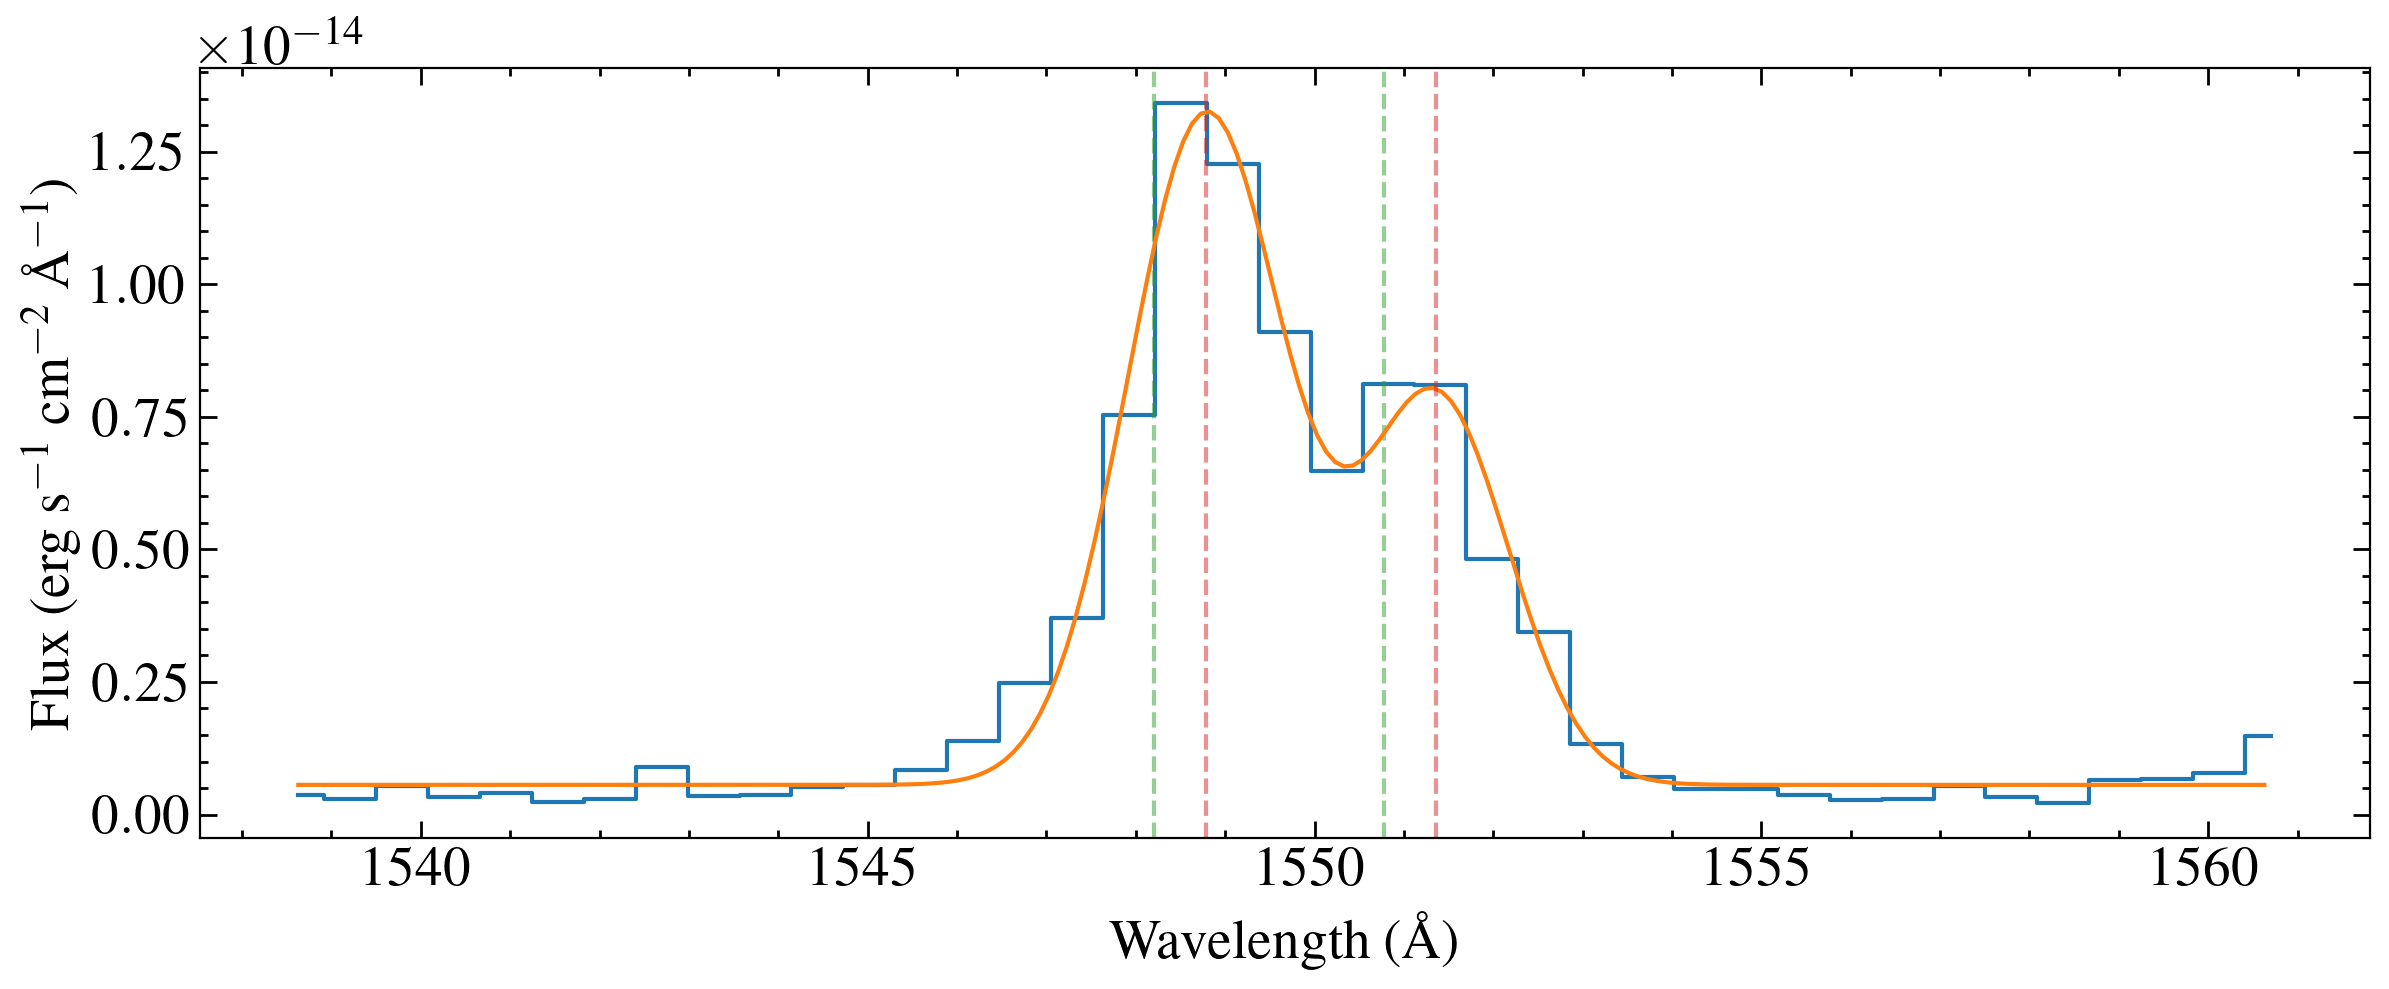

Gaussian
[8.66258754e-17 3.54325823e-16 2.50625774e-02 2.61944039e-02]
83.72633222700298 km / s 4.580273145453219


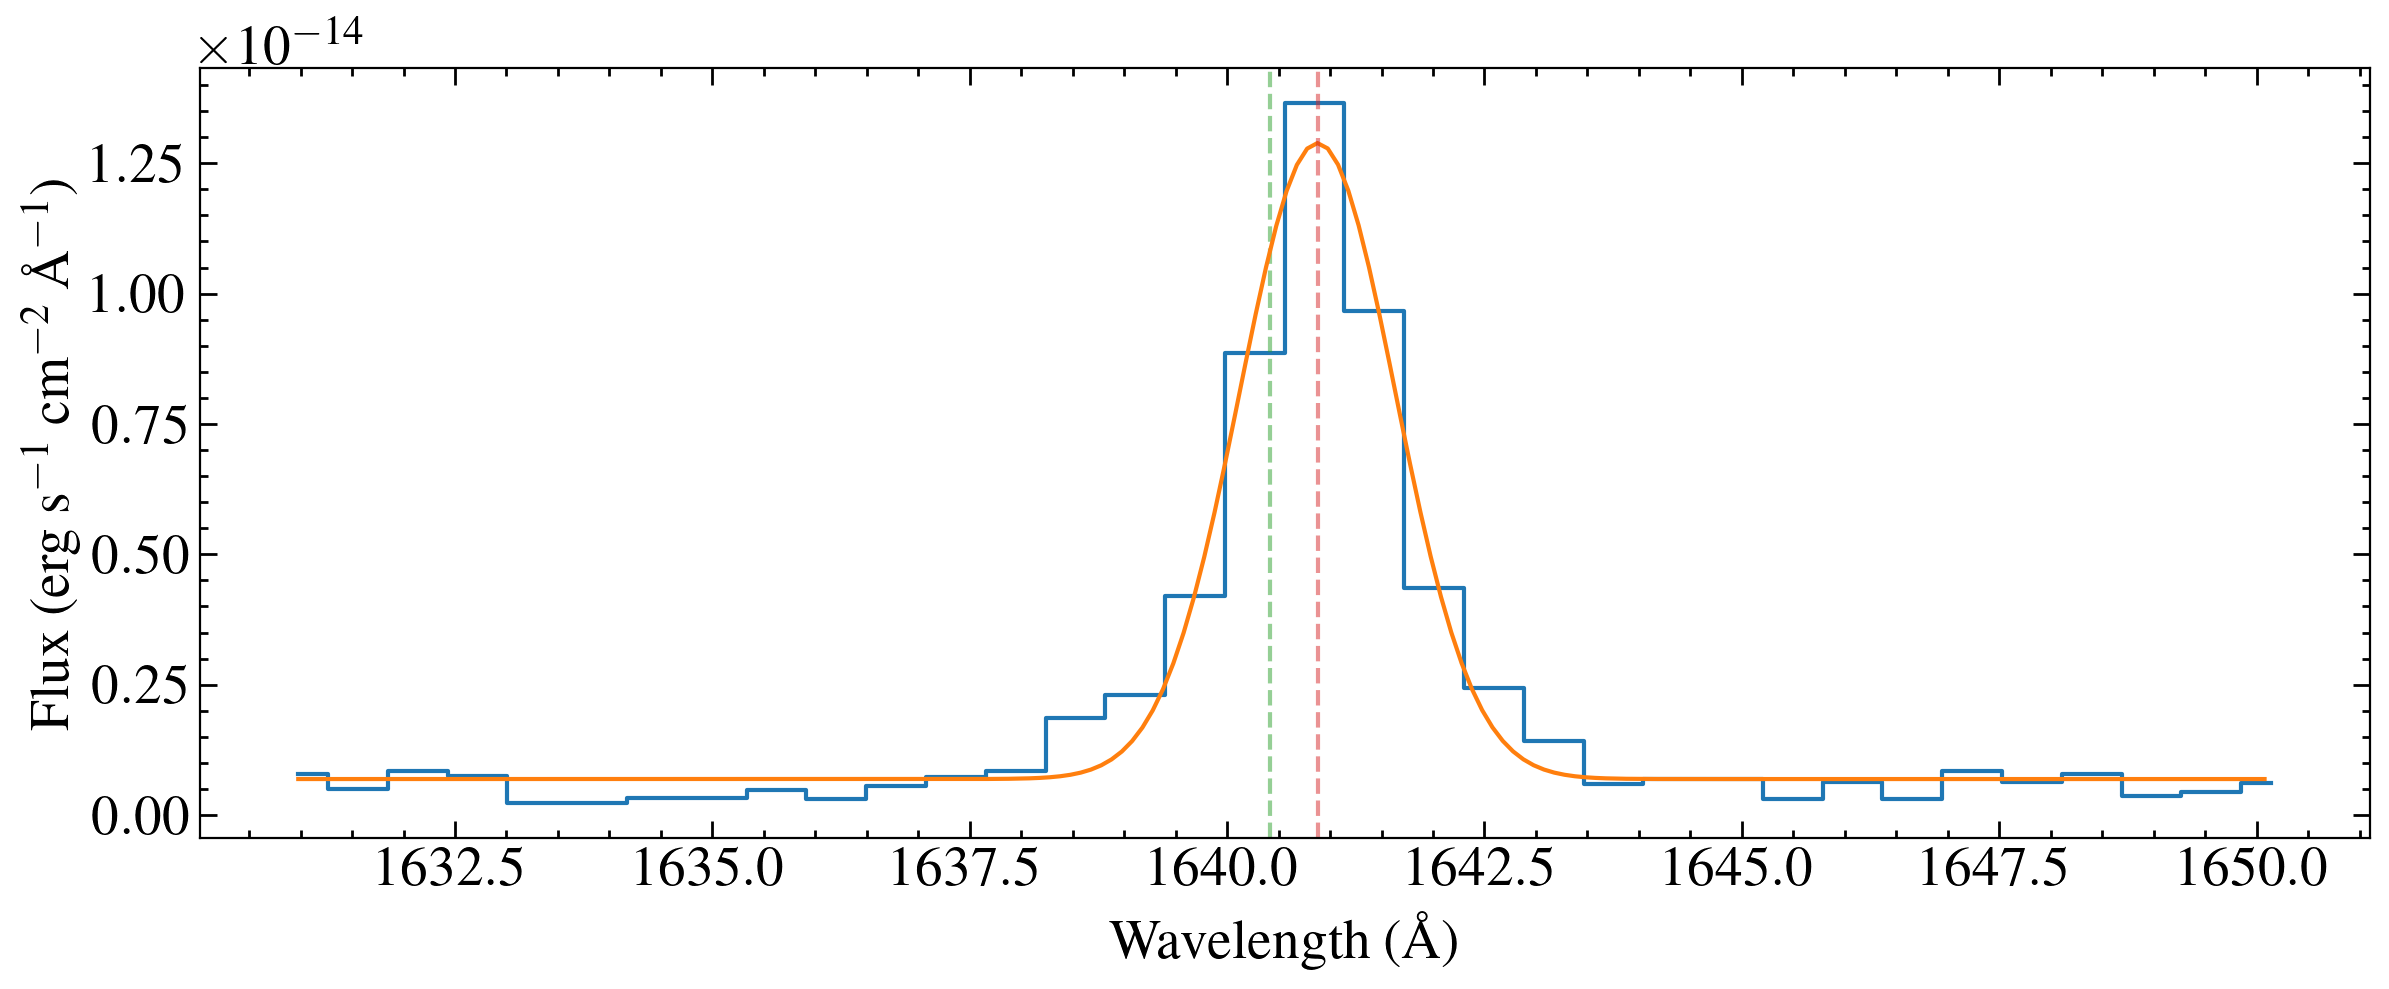

116.10056627132244 122.50516105538382 17.62886281197118


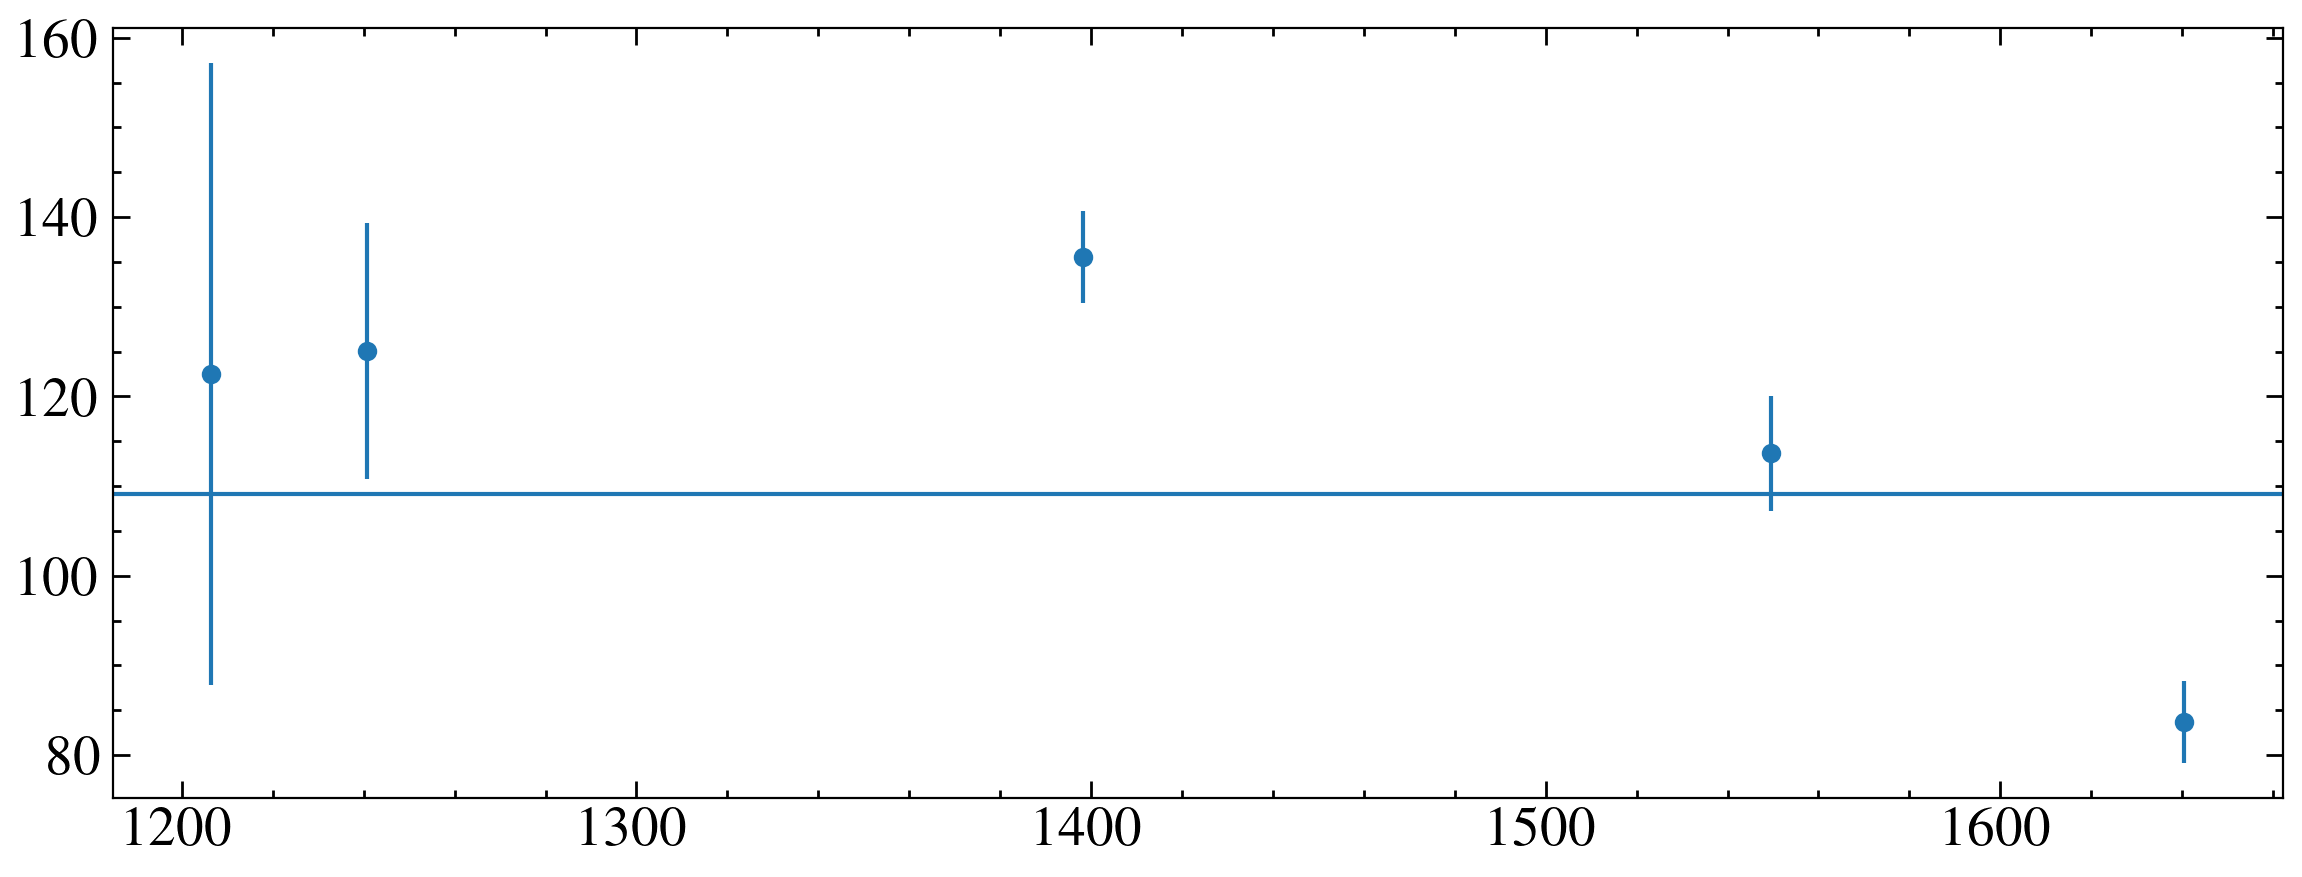

In [89]:
# import astropy.io.fits as fits
# import matplotlib.pyplot as plt
fitter = fitting.LevMarLSQFitter()

def wavelength_edges(w):
    """
    Calulates w0 and w1
    """
    diff = np.diff(w)
    diff0 = np.concatenate((np.array([diff[0]]), diff)) 
    diff1 = np.concatenate((diff, np.array([diff[-1]]))) 
    w0 = w - diff0/2.
    w1 = w + diff1/2.
    return w0, w1


# lines = [1548.201,1550.772]
space = 10
# scale = 1e-15
good_lines = [[1206.499],[1238.821, 1242.804],[1393.755,1402.77],[1548.201,1550.772],[1640.42]]

avdvs = []
g140ls = []
g230ls = []
g430ls = []

all_fdvs = []
all_fdv_e = []

for x in x1ds:
    if fits.getheader(x, 0)['OPT_ELEM'] == 'G140L':
        g140ls.append(x)
        

        amps = []
        widths = [] 
        flines = []
        fdvs = []
        fdves = []


        data = fits.getdata(x,1)[0]
        w1, f1 , e1, dq = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['DQ']
        w1, f1 , e1 = w1[dq==0], f1[dq==0] , e1[dq==0]
        # f1, e1 = f1/scale, e1/scale

        for lines in good_lines:

            mask = (w1 > lines[0]-space) & (w1 < lines[-1]+space)
            w, f, e = w1[mask], f1[mask], e1[mask]
            # print('nans', len(f[np.isnan(w)]), len(f[np.isnan(f)]), len(f[np.isnan(e)]))
            mask = np.isfinite(w) & np.isfinite(f) & np.isfinite(e)
            w, f, e = w[mask], f[mask], e[mask]
            plt.step(w, f, where='mid')
            plt.xlabel('Wavelength (\AA)')
            plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')


            [plt.axvline(line, c = 'C2', ls='--', alpha=0.5) for line in lines]

            if len(lines) > 1:
                # print('max', max(f))
                gg_init = models.Const1D(0)+models.Gaussian1D(2e-13, lines[0], 0.5)+models.Gaussian1D(2e-13, lines[1], 0.5)
                v_init = models.Const1D(0)+models.Voigt1D(x_0=lines[0], amplitude_L=max(f), fwhm_L=0.5, fwhm_G=2.0)+ \
                models.Voigt1D(x_0=lines[1], amplitude_L=max(f), fwhm_L=0.5, fwhm_G=2.0)+models.Const1D(0)#, fixed = dict(amplitude=True))

                def tiedfunc1(mod):
                        x_0 = mod.x_0_1.value+np.diff(lines)
                        # fwhm_G = mod.fwhm_G_1.value
                        return x_0

                def tiedfunc0(mod):
                    mean = mod.mean_1.value+np.diff(lines)
                    return mean



                gg_init.mean_2.tied=tiedfunc0

                v_init.x_0_2.tied=tiedfunc1

            else:
                gg_init = models.Const1D(0)+models.Gaussian1D(2e-13, lines[0], 0.5)
                v_init = models.Const1D(0)+models.Voigt1D(x_0=lines[0], amplitude_L=max(f), fwhm_L=0.5, fwhm_G=2)

            gg_fit = fitter(gg_init, w, f, maxiter=100000)
            gg_fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
            
            # v_fit = fitter(v_init, w, f, maxiter=10000)
            # print(v_fit)
            
            # v_fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
        #     print(gg_fit)
#             print(v_fit_e)

            print('Gaussian')
            obs_lam = gg_fit[1].mean#.value
            print(gg_fit_e)
            # print(obs_lam)
            dv = (obs_lam*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines*u.AA))[0]
            # print(dv)
            dv_e =  np.mean([abs(dv.value -((obs_lam+gg_fit_e[2])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value),
                            abs(dv.value -((obs_lam-gg_fit_e[2])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value)])

            # print(dv)
        #     print(np.mean(dv))


            # print('Voigt')
            # obs_lam = np.array([v_fit[0].x_0.value, v_fit[1].x_0.value])
            # print(np.diff(obs_lam), np.diff(lines))
            # obs_lam = v_fit[1].x_0.value
            # dv = (obs_lam*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA))

            # dv_e =  np.mean([abs(dv.value -((obs_lam+v_fit_e[1])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value),
                            # abs(dv.value -((obs_lam-v_fit_e[1])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value)])

            print(dv, dv_e)

            fdvs.append(dv.value)
            fdves.append(dv_e)
            flines.append(np.mean(lines))


            # print(np.mean(dv))
            w_plot = np.arange(w[0], w[-1],0.1)

            plt.plot(w_plot, gg_fit(w_plot))
            # plt.plot(w_plot, v_fit(w_plot))    

            line_width = 3
            for line in lines:
                obs_line = dv.to(u.AA,  equivalencies=u.doppler_optical(line*u.AA)).value
                plt.axvline(obs_line, c='C3', ls='--', alpha=0.5)

#             linef = np.trapz(v_fit(w_plot), w_plot)
#             contf = np.trapz(v_fit[0](w_plot), w_plot)
#             print(linef-contf)




            plt.show()
        
        avdv = np.average(fdvs, weights = 1/(np.array(fdves)**2))
        plt.axhline(avdv)
        avdvs.append(avdv)
            
        plt.errorbar(flines, fdvs, yerr=fdves, ls='none', marker='o')
        
        all_fdvs.append(fdvs)
        all_fdv_e.append(fdves)
        
        print(np.mean(fdvs), np.median(fdvs), np.std(fdvs))
        plt.show()
        
    elif fits.getheader(x, 0)['OPT_ELEM'] == 'G230L':
        g230ls.append(x)
    elif fits.getheader(x, 0)['OPT_ELEM'] == 'G430L':
        g430ls.append(x)


        # print(v_fit)

In [33]:
avdvs

[59.99873958013931, 118.1906280961477, 65.28335851485141, 109.09731346202898]

In [44]:
g140ls

['/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo27010_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo27020_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo27040_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo28010_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo27030_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo28020_x1d.fits']

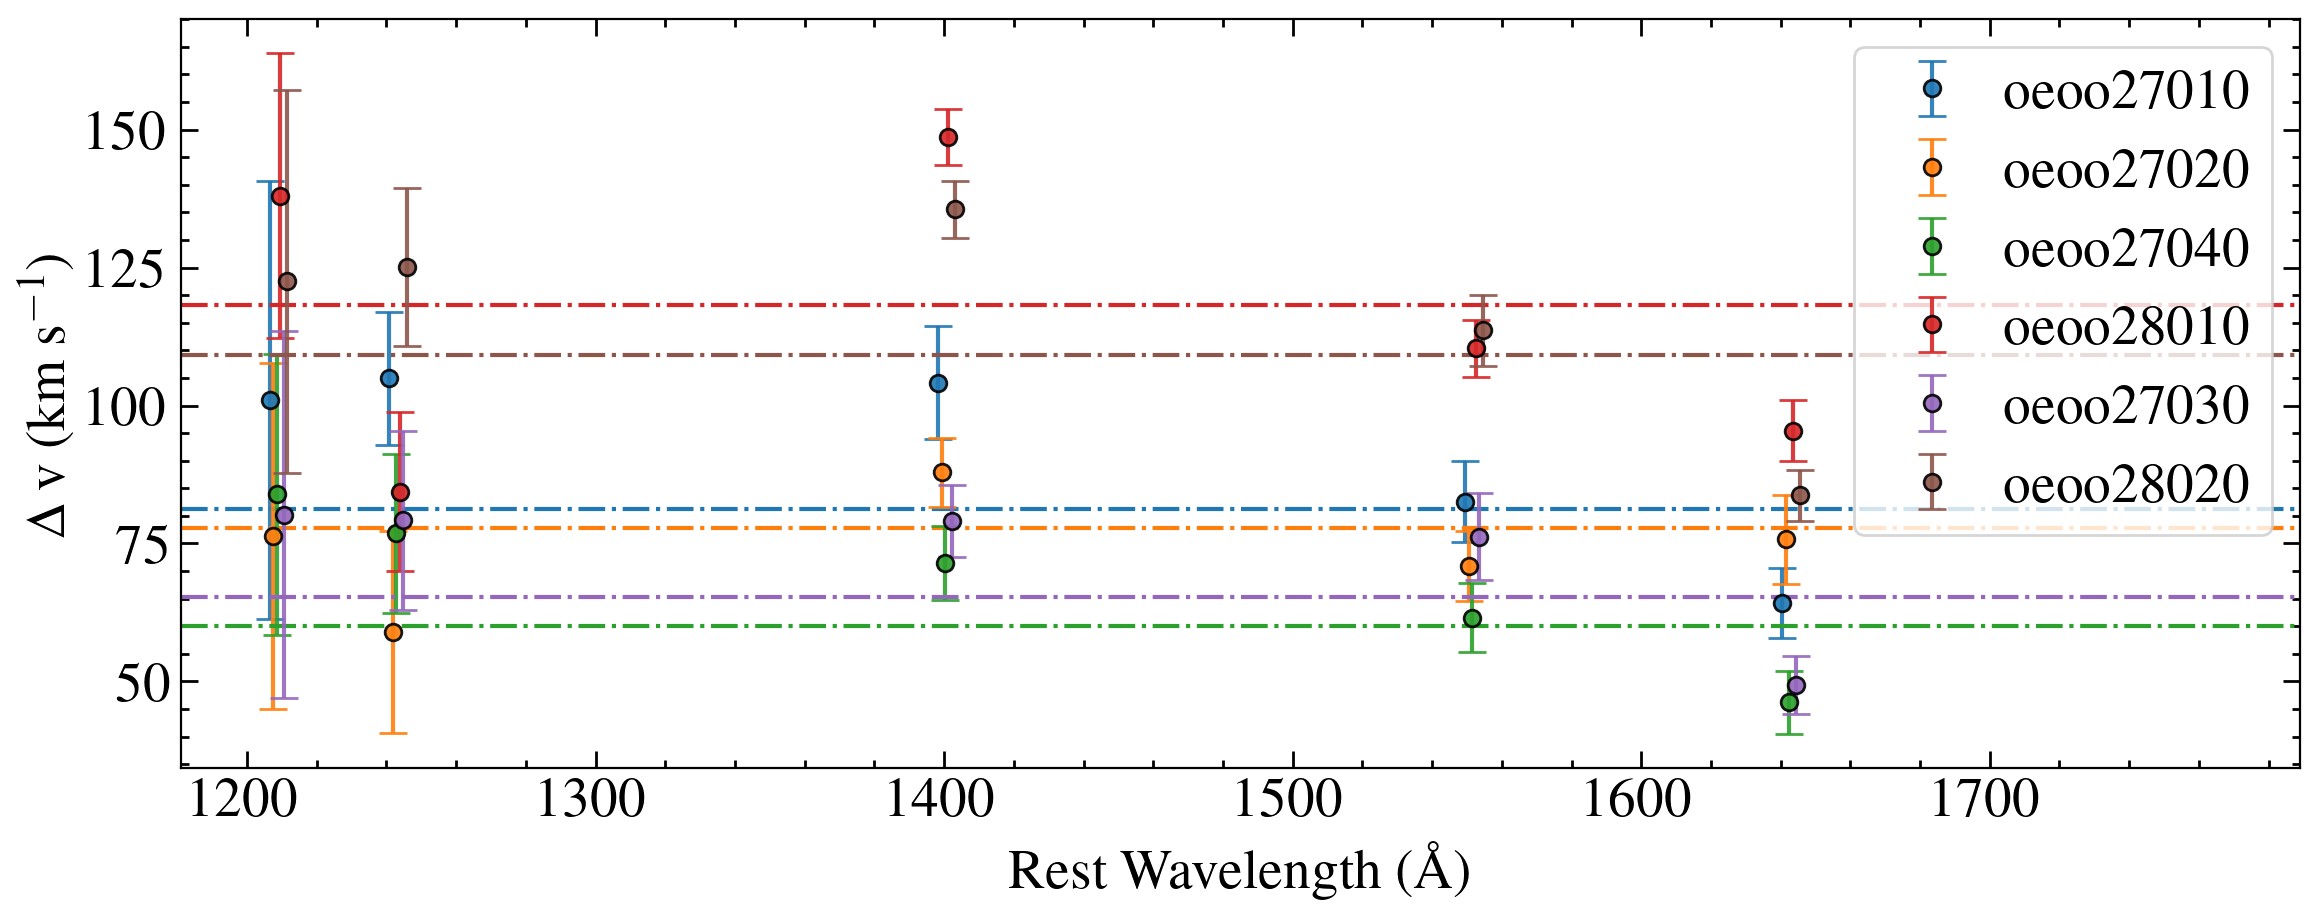

In [96]:
fig, ax = plt.subplots(figsize=(12, 5))
flines_plot = np.array(flines)
for i, g140l in enumerate(g140ls):
    root = fits.getheader(g140l, 0)['ROOTNAME']
    dvs, dves = all_fdvs[i], all_fdv_e[i]
      
    ax.errorbar(flines_plot+1*i, dvs, yerr=dves, ls='none', marker='o', label = root, markeredgecolor='k', alpha=0.9, capsize=5, c='C{}'.format(i))
    ax.axhline(avdvs[i], c='C{}'.format(i), ls='-.')


ax.legend(frameon=True)
       
ax.set_xlabel('Rest Wavelength (\AA)')
ax.set_ylabel('$\Delta$ v  (km s$^{-1}$)')
ax.set_xlim(1181, 1789)
fig.tight_layout()

In [35]:
target_dv = 5.40 #simbad
target_dve = 1.3

In [36]:
import stistools

The following tasks in the stistools package can be run with TEAL:
   basic2d      calstis     ocrreject     wavecal        x1d          x2d


/home/david/anaconda3/envs/stenv/lib/python3.11/site-packages/stsci/tools/nmpfit.py:8: UserWarning: NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.
  warnings.warn("NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.")
/home/david/anaconda3/envs/stenv/lib/python3.11/site-packages/stsci/tools/gfit.py:18: UserWarning: GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it.Use astropy.modeling instead.
  warnings.warn("GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it."


In [37]:
os.environ['oref'] = '{}shifts/'.format(path)

In [38]:
guess = 0.0

for i, x in enumerate(g140ls):
    hdr = fits.getheader(x)
    cenwave = hdr['CENWAVE']
    root = hdr['ROOTNAME']
    w = fits.getdata(x, 1)[0]['WAVELENGTH']
    mean_plate_scale = np.mean(np.diff(w))
#     print(mean_plate_scale)
    target_shift = avdvs[i] - target_dv
#     print(target_shift)
    cenwave_shift = (target_shift*u.km/u.s).to(u.AA,  equivalencies=u.doppler_optical(cenwave*u.AA))
#     print(cenwave_shift)
    waveshift = cenwave_shift.value - cenwave
#     print(waveshift)
    pixshift = waveshift/mean_plate_scale
    print('Required pixels shift is {:.3f} pixels'.format(pixshift))
    
    shifted_flt = '{}shifts/{}_flt.fits'.format(path, root)
    shifted_raw =  '{}shifts/{}_raw.fits'.format(path, root)
    # since we have turned off WAVECOR at the beginning, SHIFTA1 should be 0
    SHIFTA1 = fits.getval(shifted_flt, "SHIFTA1", 1)
    SHIFTA2 = fits.getval(shifted_flt, "SHIFTA2", 1)
    SHIFTA1 += pixshift+guess
    # update the the SHIFTA1, SHIFTA1 keywords in the _raw fits file first science extension
    fits.setval(shifted_raw, "SHIFTA1", value=SHIFTA1, ext=1)
    fits.setval(shifted_raw, "SHIFTA2", value=SHIFTA2, ext=1)
    
    fits.setval(shifted_raw, "WAVECORR", value="OMIT", ext=0)
    assert fits.getval(shifted_raw, keyword="WAVECORR", ext=0) == "OMIT"
    
    res = stistools.calstis.calstis(shifted_raw, verbose=False, outroot='reextractions/hd120411/')
    assert res == 0, f"CalSTIS exited with an error:  {res}"
    
    
    

Required pixels shift is 0.447 pixels

*** CALSTIS-0 -- Version 3.4.2 (19-Jan-2018) ***
Begin    10-Dec-2024 15:22:12 MST

Input    /media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo27040_raw.fits
Outroot  reextractions/hd120411/oeoo27040_raw.fits

*** CALSTIS-1 -- Version 3.4.2 (19-Jan-2018) ***
Begin    10-Dec-2024 15:22:12 MST
Input    /media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo27040_raw.fits
Output   reextractions/hd120411/oeoo27040_flt.fits
ERROR    Output file `reextractions/hd120411/oeoo27040_flt.fits' already exists.
calstis0 failed.


AssertionError: CalSTIS exited with an error:  1

In [70]:
new_x1ds = glob.glob('reextractions/hd120411/*x1d.fits')
new_x1ds

['reextractions/hd120411/oeoo27020_x1d.fits',
 'reextractions/hd120411/oeoo27010_x1d.fits',
 'reextractions/hd120411/oeoo27040_x1d.fits',
 'reextractions/hd120411/oeoo28030_x1d.fits',
 'reextractions/hd120411/oeoo27030_x1d.fits',
 'reextractions/hd120411/oeoo28020_x1d.fits',
 'reextractions/hd120411/oeoo28010_x1d.fits']

In [71]:
# # import astropy.io.fits as fits
# # import matplotlib.pyplot as plt
# fitter = fitting.LevMarLSQFitter()

# new_avdvs = []
# new_avdves = []

# for x in new_x1ds:
#     if fits.getheader(x, 0)['OPT_ELEM'] == 'G140L':
        

#         amps = []
#         widths = [] 
#         flines = []
#         fdvs = []
#         fdves = []


#         data = fits.getdata(x,1)[0]
#         w1, f1 , e1 = data['WAVELENGTH'], data['FLUX'], data['ERROR']

#         for lines in good_lines:

#             mask = (w1 > lines[0]-space) & (w1 < lines[-1]+space)
#             w, f, e = w1[mask], f1[mask], e1[mask]
#             plt.step(w, f, where='mid')
#             plt.xlabel('Wavelength (\AA)')
#             plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')


#             [plt.axvline(line, c = 'C2', ls='--', alpha=0.5) for line in lines]

#             if len(lines) > 1:

#                 gg_init = models.Const1D(0)+models.Gaussian1D(2e-13, lines[0], 0.5)+models.Gaussian1D(2e-13, lines[1], 0.5)
#                 v_init = models.Const1D(0)+models.Voigt1D(x_0=lines[0], amplitude_L=max(f), fwhm_L=0.5, fwhm_G=2.5)+ \
#                 models.Voigt1D(x_0=lines[1], amplitude_L=max(f), fwhm_L=0.5, fwhm_G=2.3)+models.Const1D(0)#, fixed = dict(amplitude=True))

#                 def tiedfunc1(mod):
#                         x_0 = mod.x_0_1.value+np.diff(lines)
#                         # fwhm_G = mod.fwhm_G_1.value
#                         return x_0

#                 def tiedfunc0(mod):
#                     mean = mod.mean_1.value+np.diff(lines)
#                     return mean



#                 gg_init.mean_2.tied=tiedfunc0

#                 v_init.x_0_2.tied=tiedfunc1

#             else:
#                 gg_init = models.Const1D(0)+models.Gaussian1D(2e-13, lines[0], 0.5)
#                 v_init = models.Const1D(0)+models.Voigt1D(x_0=lines[0], amplitude_L=max(f), fwhm_L=0.5, fwhm_G=2)

#             gg_fit = fitter(gg_init, w, f, maxiter=100000)
#             v_fit = fitter(v_init, w, f, maxiter=100000)
#             v_fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
#         #     print(gg_fit)
# #             print(v_fit)
# #             print(v_fit_e)

#             print('Gaussian')
#             obs_lam = gg_fit[1].mean.value
#             dv = (obs_lam*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines*u.AA))
#             print(dv)
#         #     print(np.mean(dv))


#             print('Voigt')
#             # obs_lam = np.array([v_fit[0].x_0.value, v_fit[1].x_0.value])
#             # print(np.diff(obs_lam), np.diff(lines))
#             obs_lam = v_fit[1].x_0.value
#             dv = (obs_lam*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA))

#             dv_e =  np.mean([abs(dv.value -((obs_lam+v_fit_e[1])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value),
#                             abs(dv.value -((obs_lam-v_fit_e[1])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value)])

#             print(dv, dv_e)

#             fdvs.append(dv.value)
#             fdves.append(dv_e)
#             flines.append(np.mean(lines))


#             # print(np.mean(dv))

#             plt.plot(w, gg_fit(w))
#             w_plot = np.arange(w[0], w[-1],0.1)
#             plt.plot(w_plot, v_fit(w_plot))    

#             line_width = 3
#             for line in lines:
#                 obs_line = dv.to(u.AA,  equivalencies=u.doppler_optical(line*u.AA)).value
#                 plt.axvline(obs_line, c='C3', ls='--', alpha=0.5)

# #             linef = np.trapz(v_fit(w_plot), w_plot)
# #             contf = np.trapz(v_fit[0](w_plot), w_plot)
# #             print(linef-contf)




#             plt.show()
        
#         weights = 1/(np.array(fdves)**2)
#         avdv = np.average(fdvs, weights = weights)
#         avdve = (1/(np.sum(weights)))**0.5
        
        
#         new_avdvs.append(avdv)
#         new_avdves.append(avdve)
            
#         plt.errorbar(flines, fdvs, yerr=fdves, ls='none', marker='o')
#         plt.axhline(target_dv, ls='--', c='C1')
#         plt.axhline(avdv, ls='--', c='C2')
#         print(np.mean(fdvs), np.median(fdvs), np.std(fdvs), avdv)
#         plt.show()
        


#         # print(v_fit)

In [ ]:
# x = np.arange(len(g140ls))

# plt.errorbar(x, new_avdvs, new_avdves, ls='none', marker='o')
# plt.axhline(target_dv, ls='--', c='C2')
# x2 = np.arange(-1, 7,1)
# plt.fill_between(x2, target_dv-1.3, target_dv+1.3, color='C2', alpha=0.1)
# plt.xlim(-0.5, 5.5)

In [72]:
def spectra_adder(f_array, e_array, scale_correct=True):
    """
    Returns a variance-weighted coadd with standard error of the weighted mean (variance weights, scale corrected).
    f_array and e_arrays are collections of flux and error arrays, which should have the same lenth and wavelength scale
    """
    weights = 1 / (e_array**2)
    flux = np.average(f_array, axis =0, weights = weights)
    var = 1 / np.sum(weights, axis=0)
    rcs = np.sum((((flux - f_array)**2) * weights), axis=0) / (len(f_array)-1) #reduced chi-squared
    if scale_correct:
        error = (var * rcs)**0.5
    else:
        error = var**0.5
    return flux,error

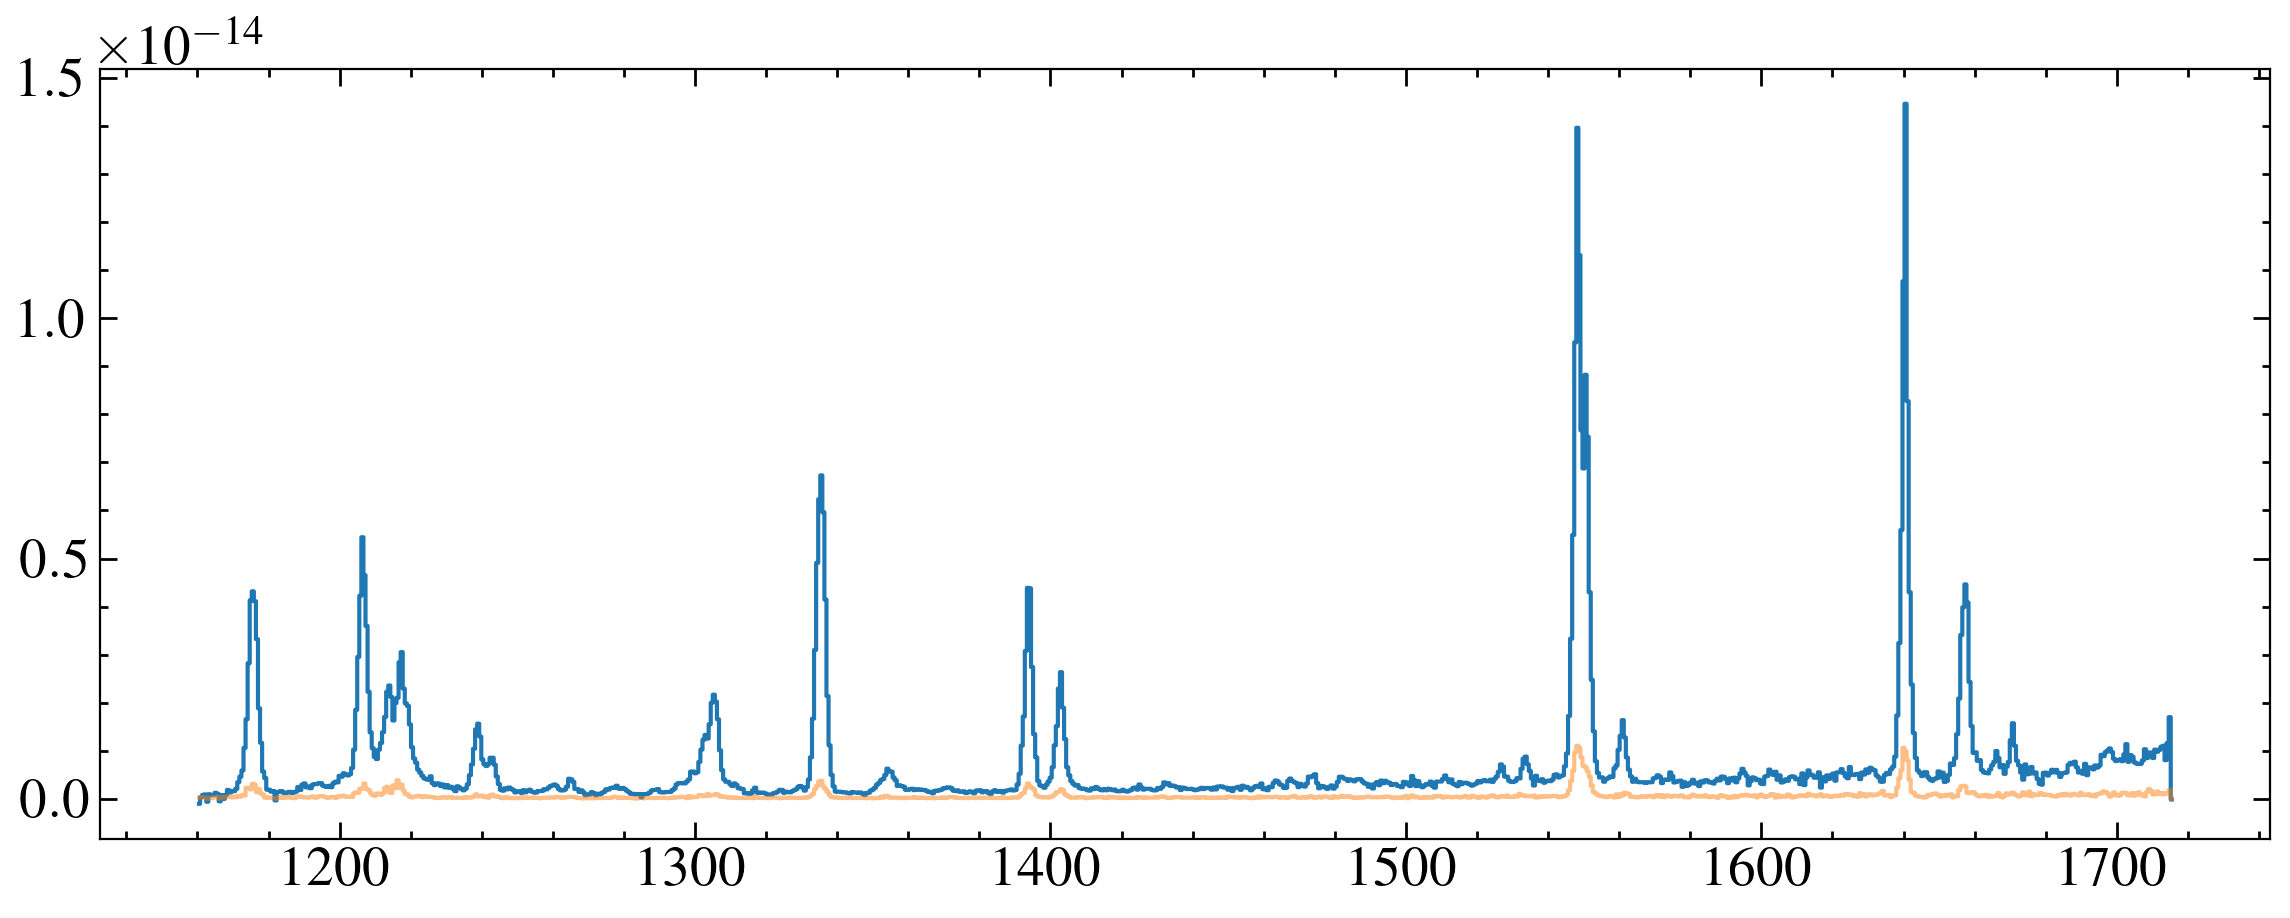

In [73]:
w_fuv = []
f_fuv = []
e_fuv = []
n =0
for x in new_x1ds:
    if fits.getheader(x, 0)['OPT_ELEM'] == 'G140L':
        data = fits.getdata(x, 1)[0]
        w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
        mask = (w > 1160)
        w, f, e = w[mask], f[mask], e[mask]
        if n == 0:
            w_fuv = w
            f_fuv.append(f)
            e_fuv.append(e)
        else:
            f_fuv.append(interp1d(w, f, fill_value='extrapolate')(w_fuv))
            e_fuv.append(interp1d(w, e, fill_value='extrapolate')(w_fuv))            
        n +=1

        
f_fuv, e_fuv = spectra_adder(np.array(f_fuv), np.array(e_fuv), scale_correct=True)


plt.step(w_fuv, f_fuv, where='mid')
plt.step(w_fuv, e_fuv, where='mid', alpha=0.5)

Gaussian
[9.62699792] km / s
Voigt
9.62731174597851 km / s 30.678850129711442


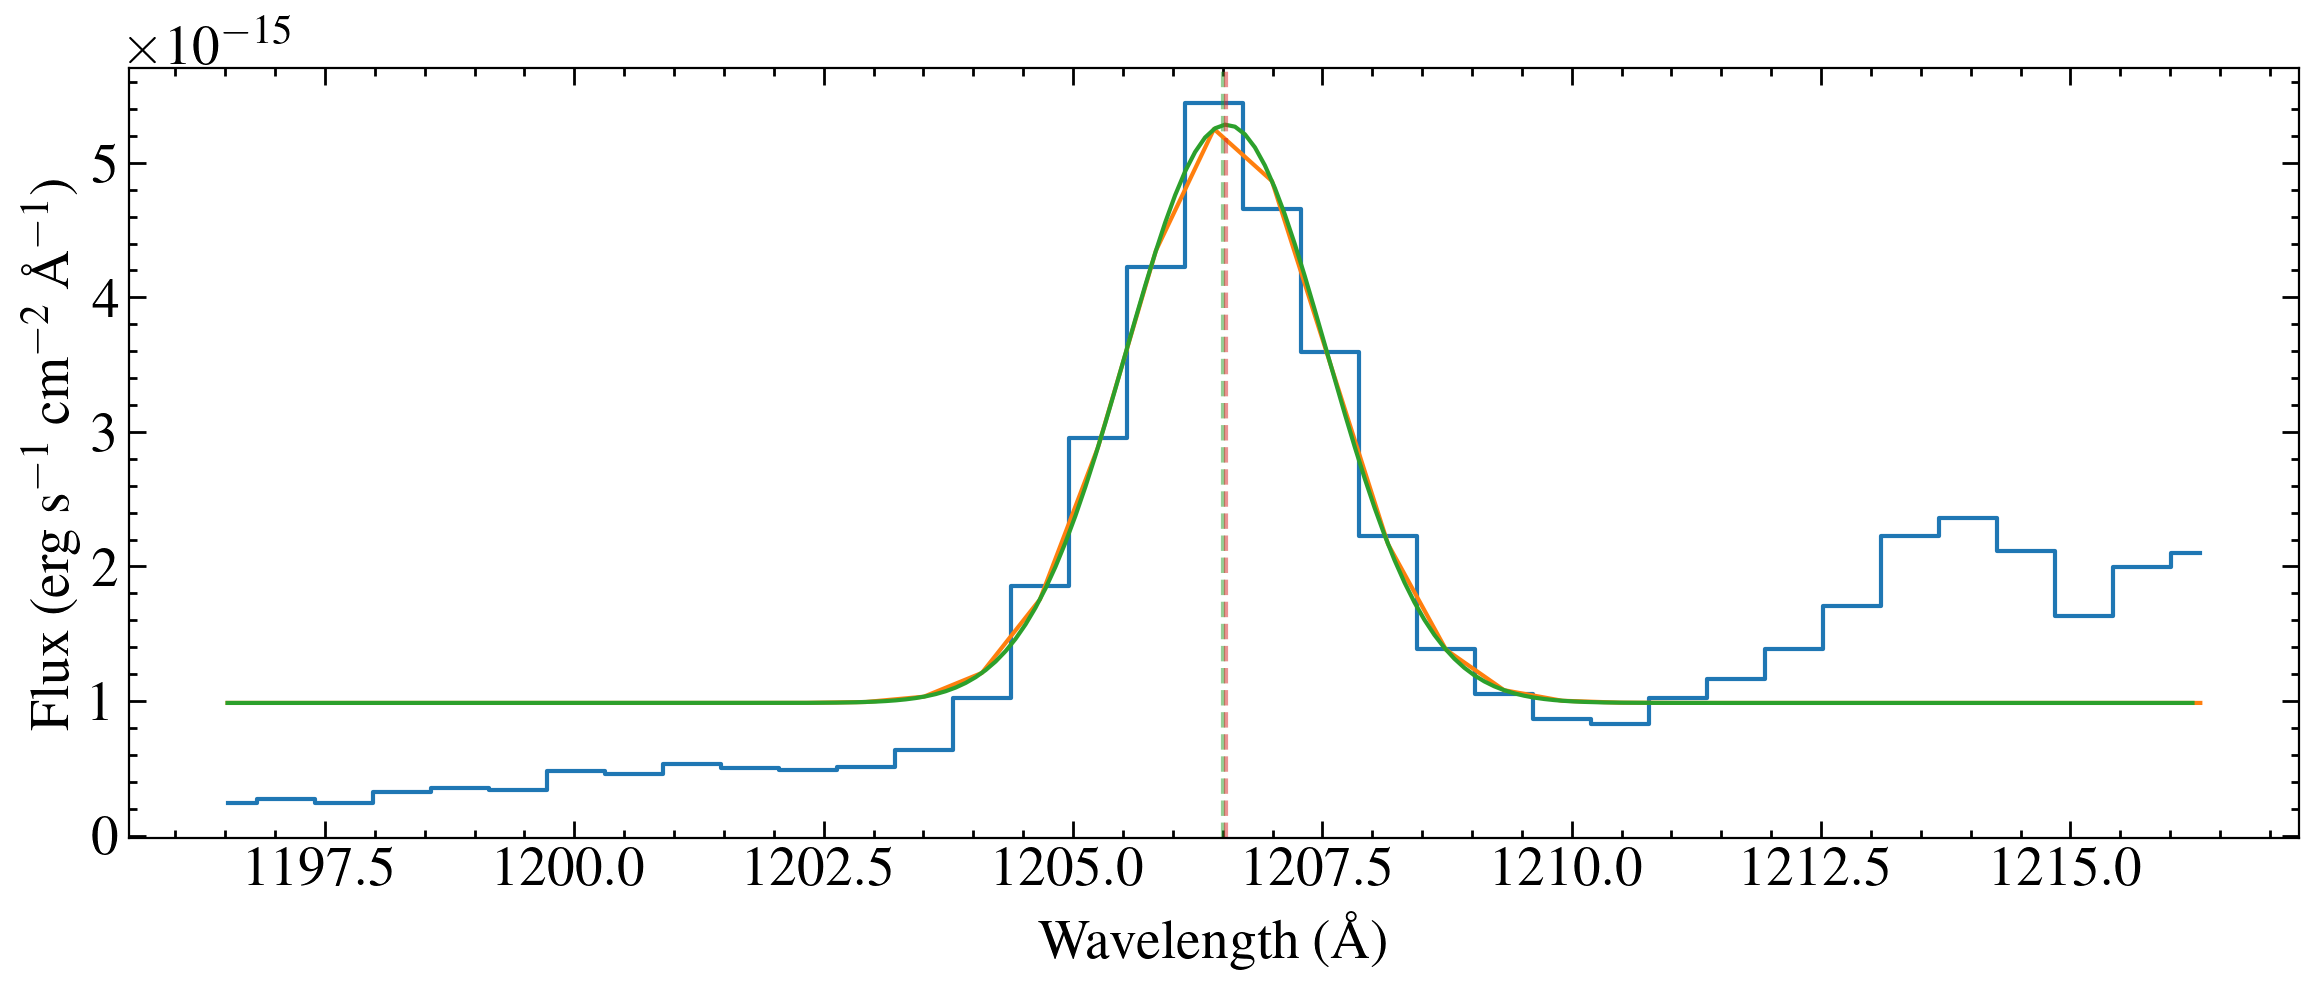

Gaussian
[   3.63879268 -957.16263178] km / s
Voigt
5.3221247595570915 km / s 9.161568149553574


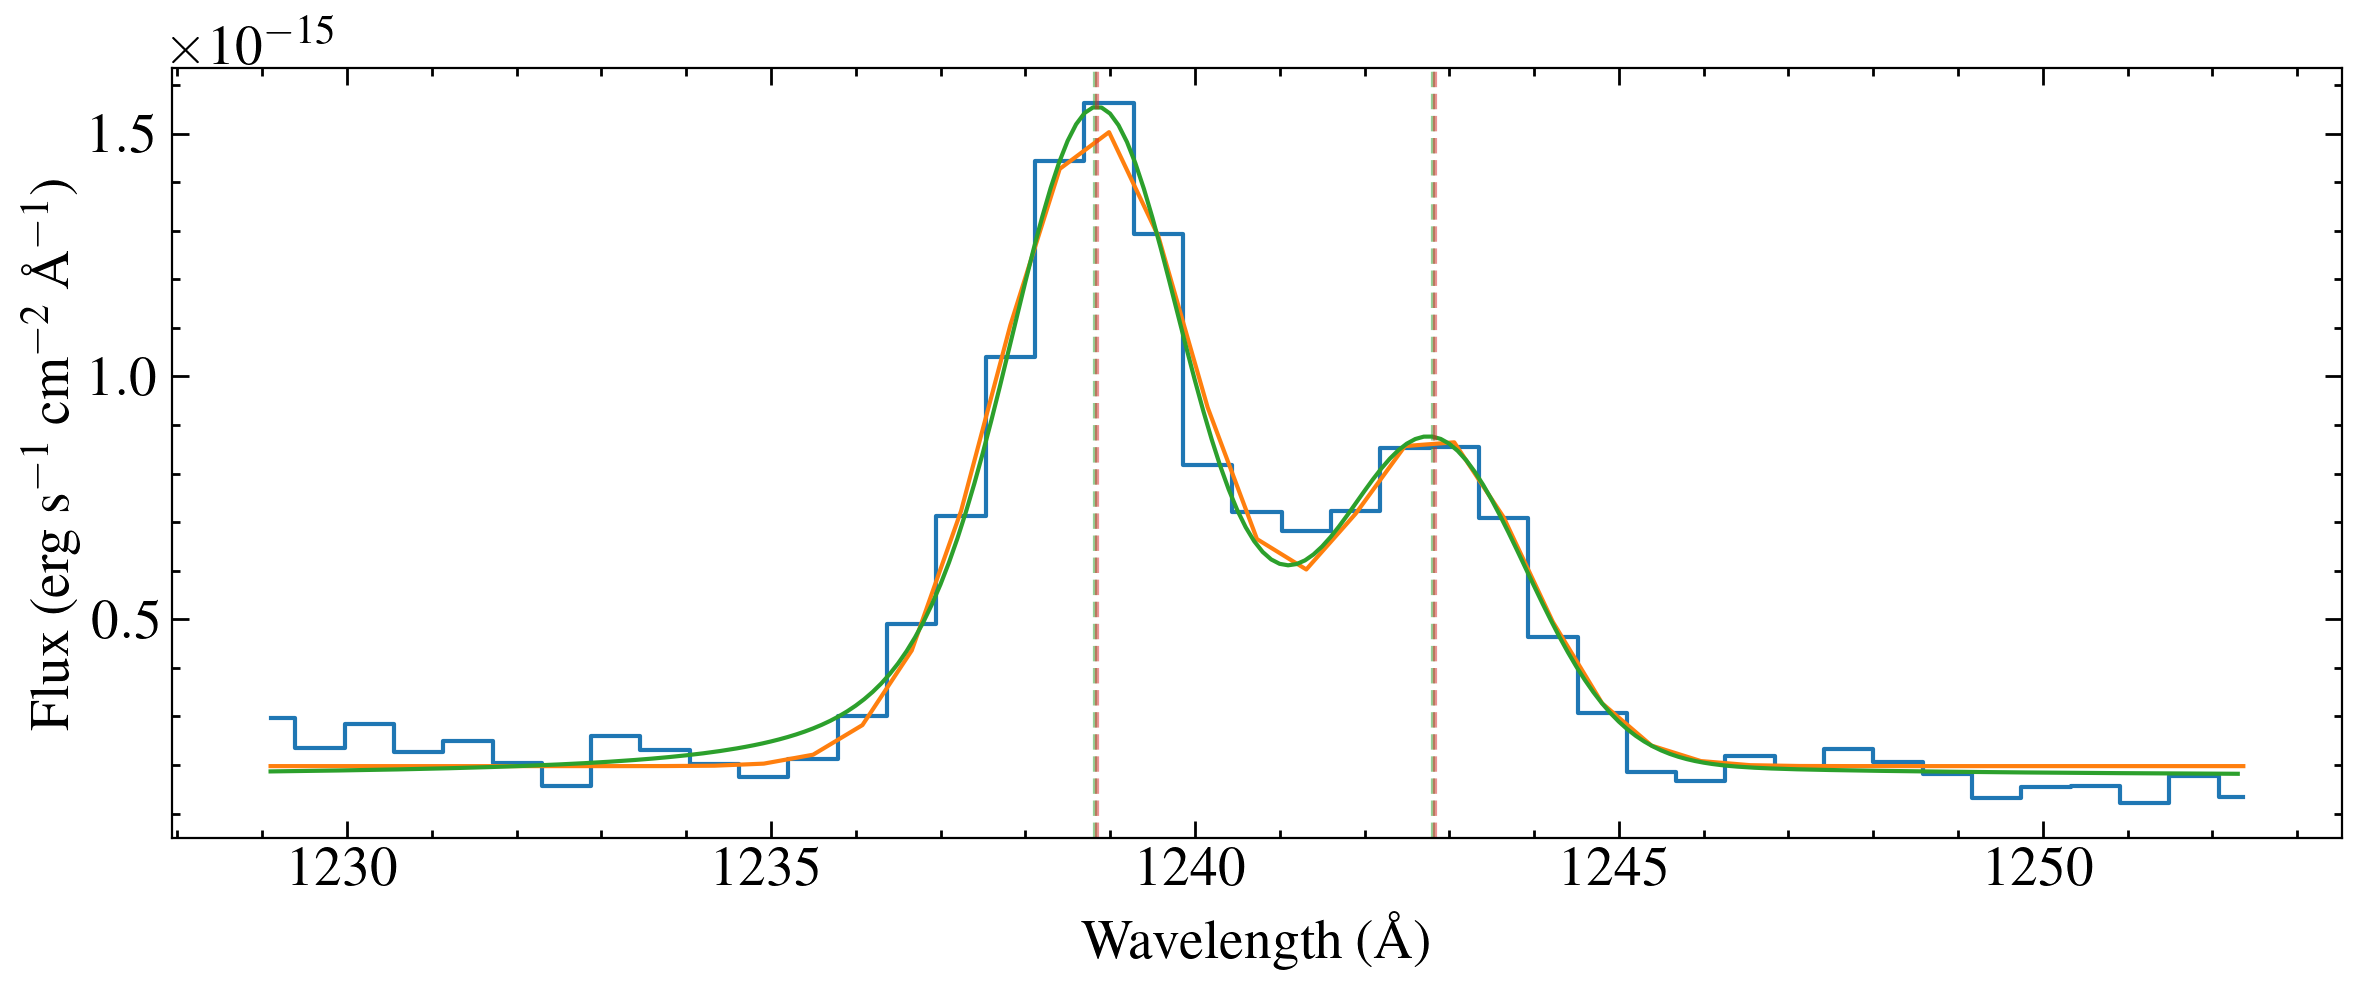

Gaussian
[   25.30400161 -1901.49591886] km / s
Voigt
25.341308086805192 km / s 3.470610367476711


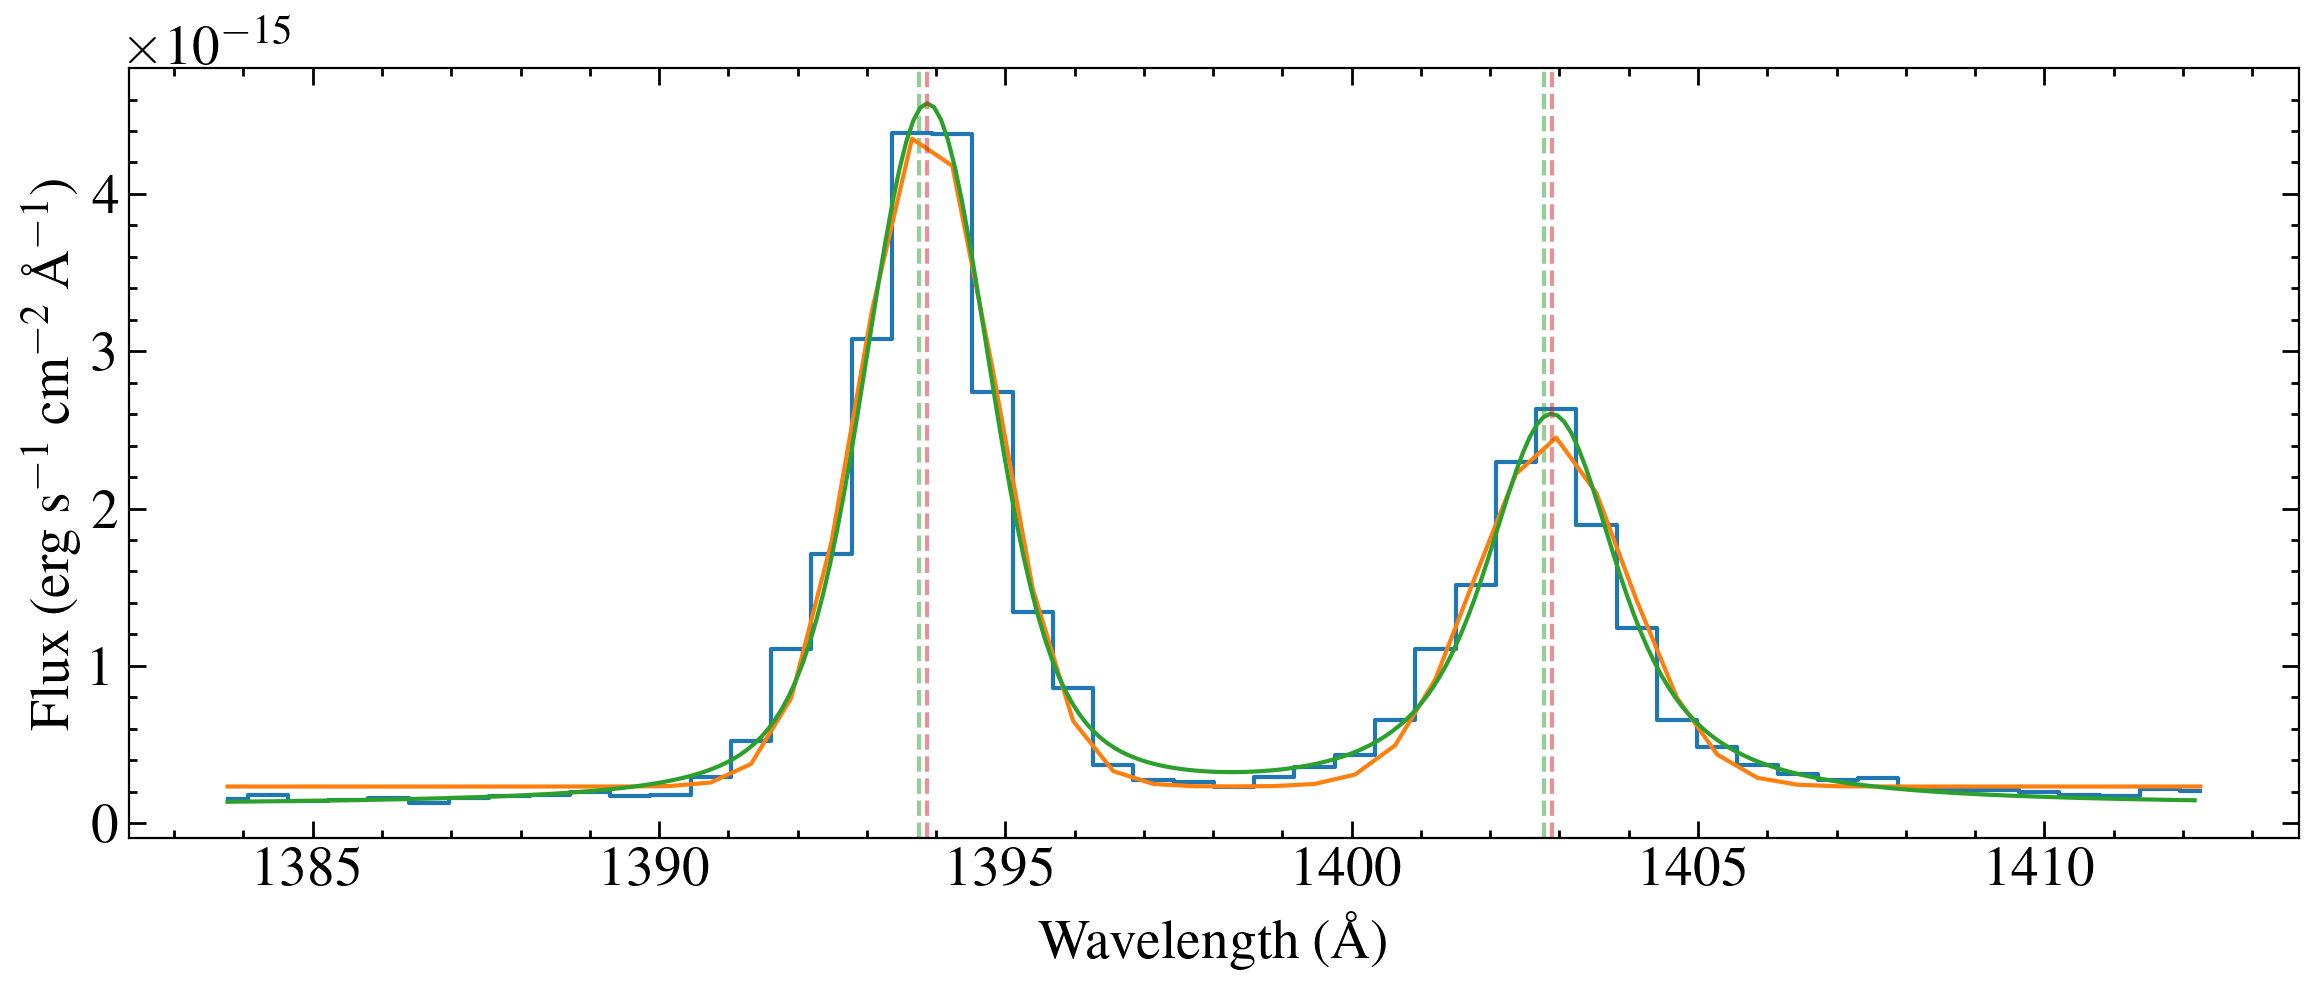

NonFiniteValueError: Objective function has encountered a non-finite value, this will cause the fit to fail!
Please remove non-finite values from your input data before fitting to avoid this error.

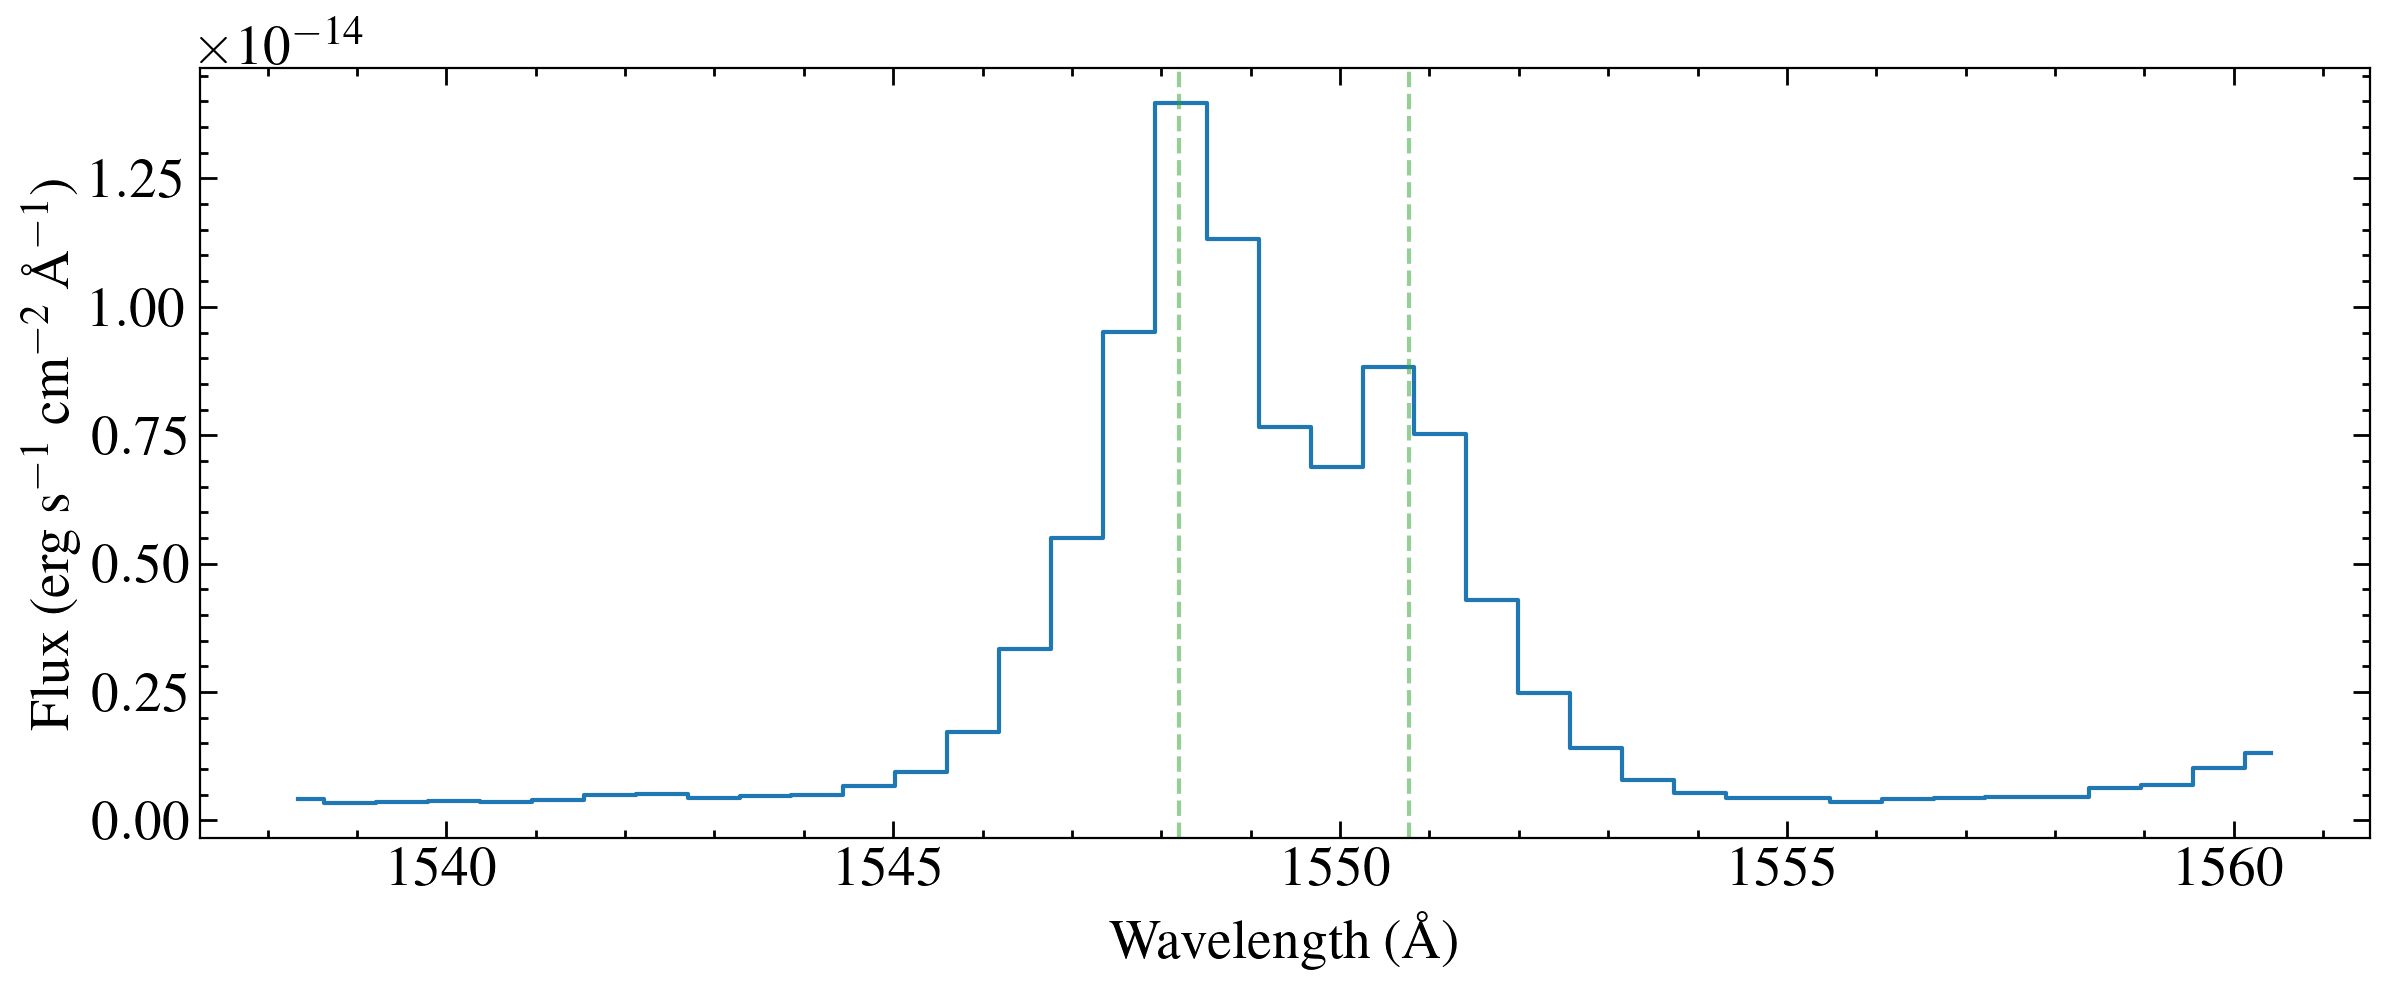

In [76]:
w1, f1 , e1 = w_fuv, f_fuv, e_fuv

for lines in good_lines:

    mask = (w1 > lines[0]-space) & (w1 < lines[-1]+space)
    w, f, e = w1[mask], f1[mask], e1[mask]
    plt.step(w, f, where='mid')
    plt.xlabel('Wavelength (\AA)')
    plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')


    [plt.axvline(line, c = 'C2', ls='--', alpha=0.5) for line in lines]

    if len(lines) > 1:

        gg_init = models.Const1D(0)+models.Gaussian1D(2e-13, lines[0], 0.5)+models.Gaussian1D(2e-13, lines[1], 0.5)
        v_init = models.Const1D(0)+models.Voigt1D(x_0=lines[0], amplitude_L=max(f), fwhm_L=0.5, fwhm_G=2.5)+ \
        models.Voigt1D(x_0=lines[1], amplitude_L=max(f), fwhm_L=0.5, fwhm_G=2.3)+models.Const1D(0)#, fixed = dict(amplitude=True))

        def tiedfunc1(mod):
                x_0 = mod.x_0_1.value+np.diff(lines)
                # fwhm_G = mod.fwhm_G_1.value
                return x_0

        def tiedfunc0(mod):
            mean = mod.mean_1.value+np.diff(lines)
            return mean



        gg_init.mean_2.tied=tiedfunc0

        v_init.x_0_2.tied=tiedfunc1

    else:
        gg_init = models.Const1D(0)+models.Gaussian1D(2e-13, lines[0], 0.5)
        v_init = models.Const1D(0)+models.Voigt1D(x_0=lines[0], amplitude_L=max(f), fwhm_L=0.5, fwhm_G=2)

    gg_fit = fitter(gg_init, w, f, maxiter=100000)
    v_fit = fitter(v_init, w, f, maxiter=100000)
    v_fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
#     print(gg_fit)
#             print(v_fit)
#             print(v_fit_e)

    print('Gaussian')
    obs_lam = gg_fit[1].mean.value
    dv = (obs_lam*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines*u.AA))
    print(dv)
#     print(np.mean(dv))


    print('Voigt')
    # obs_lam = np.array([v_fit[0].x_0.value, v_fit[1].x_0.value])
    # print(np.diff(obs_lam), np.diff(lines))
    obs_lam = v_fit[1].x_0.value
    dv = (obs_lam*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA))

    dv_e =  np.mean([abs(dv.value -((obs_lam+v_fit_e[1])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value),
                    abs(dv.value -((obs_lam-v_fit_e[1])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value)])

    print(dv, dv_e)

    fdvs.append(dv.value)
    fdves.append(dv_e)
    flines.append(np.mean(lines))


    # print(np.mean(dv))

    plt.plot(w, gg_fit(w))
    w_plot = np.arange(w[0], w[-1],0.1)
    plt.plot(w_plot, v_fit(w_plot))    

    line_width = 3
    for line in lines:
        obs_line = dv.to(u.AA,  equivalencies=u.doppler_optical(line*u.AA)).value
        plt.axvline(obs_line, c='C3', ls='--', alpha=0.5)

#             linef = np.trapz(v_fit(w_plot), w_plot)
#             contf = np.trapz(v_fit[0](w_plot), w_plot)
#             print(linef-contf)




    plt.show()

weights = 1/(np.array(fdves)**2)
avdv = np.average(fdvs, weights = weights)
avdve = (1/(np.sum(weights)))**0.5
        
        

In [ ]:
print(avdv, avdve)
print(target_dv, target_dve)
print(fdvs, fdves)

plt.errorbar(0, avdv, yerr=avdve, marker='o')
plt.errorbar(1, target_dv, yerr=target_dve, marker='o')

That worked as well as can be expected. Copying over the dv measurements for the g230l and g430l spectra so they're in the same place

Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(2, c0=0., c1=-0., c2=0.)>

    [1]: <Gaussian1D(amplitude=0., mean=2797.72393254, stddev=1.03827538)>

    [2]: <Gaussian1D(amplitude=0., mean=2804.90193254, stddev=1.03827538)>
Parameters:
             c0_0                  c1_0          ...      stddev_2     
    --------------------- ---------------------- ... ------------------
    7.413251004214818e-10 -5.298598982624808e-13 ... 1.0382753802754454
[4.13616387e-11 2.95668171e-14 5.28375150e-18 4.17496666e-15
 2.15428111e-01 1.78077338e-01]
147.08270935355637 km / s 23.09570569234188


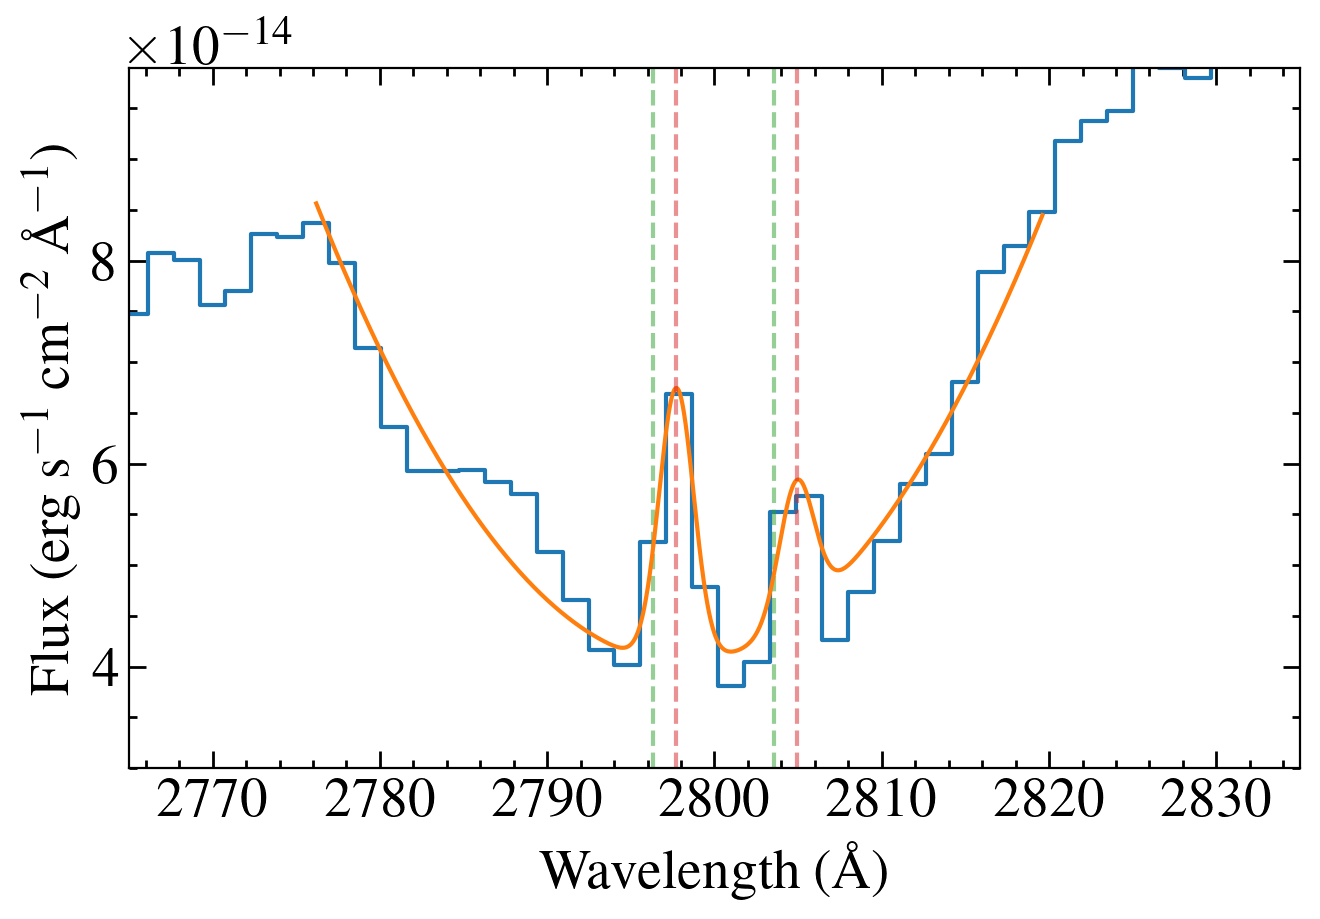

In [80]:
fig, ax = plt.subplots(figsize=(7, 5))

x = g230ls[0]
# print(fits.getheader(x, 0)['OPT_ELEM'])
data = fits.getdata(x, 1)[0]
# print(data['A2Center'])
# root = fits.getheader(x, 0)['ROOTNAME']
w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
# mask = w > 1250
#     w, f, e = w[mask], f[mask], e[mask]
ax.step(w, f, where='mid')
# ax.step(w, e, where='mid')
# plt.legend(frameon=True, loc=2)
# plt.xticks(visible=False)
ax.set_xlim(2765, 2835)
ax.set_ylim(0.3e-13, 0.99e-13)

lines=[2796.35, 2803.53]
[ax.axvline(line, ls='--', c='C2', alpha=0.5) for line in lines]
ax.set_xlabel('Wavelength (\AA)')
ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')



mg2 = [2796.352, 2803.53]
os = [6.08e-01, 3.03e-01]

lines = np.copy(mg2)

mask = (w > 2775) & (w < 2820)
wn, fn, en = w[mask], f[mask], e[mask]

# mod = models.Const1D(4e-14)
mod = models.Polynomial1D(2) 
for line in lines:
    line_guess = (20*u.km/u.s).to(u.AA, equivalencies = u.doppler_optical(line*u.AA)).value
    mod = mod+  models.Gaussian1D(amplitude=6e-14, mean = line_guess, stddev=0.5)


def tiedfunc0(mod):
    mean = mod.mean_1.value+np.diff(lines)
    return mean

def tiedamp(mod):
    amplitude = mod.amplitude_1.value/(os[0]/os[1])
    return amplitude

def tiedstd(mod):
    stddev = mod.stddev_1.value
    return stddev

mod.mean_2.tied=tiedfunc0
mod.stddev_2.tied = tiedstd
mod.amplitude_2.tied = tiedamp


mgfit = fitter(mod,wn, fn, maxiter=10000)
wmod = np.arange(wn[0], wn[-1], 0.01)
ax.plot(wmod, mgfit(wmod))

print(mgfit)
mgfit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
print(mgfit_e)

obs_lam = mgfit[1].mean.value
dv = (obs_lam*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA))

dv_e =  np.mean([abs(dv.value -((obs_lam+mgfit_e[-2])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value),
                abs(dv.value -((obs_lam-mgfit_e[-2])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value)])

print(dv, dv_e)

mgdv, mgdve = dv.value, dv_e

for line in lines:
        obs_line = dv.to(u.AA,  equivalencies=u.doppler_optical(line*u.AA)).value
        ax.axvline(obs_line, c='C3', ls='--', alpha=0.5)


fig.tight_layout()



In [83]:
guess = 0.1

x = g230ls[0]
hdr = fits.getheader(x)
cenwave = hdr['CENWAVE']
root = hdr['ROOTNAME']
w = fits.getdata(x, 1)[0]['WAVELENGTH']
mean_plate_scale = np.mean(np.diff(w))
print(mean_plate_scale)
target_shift = mgdv - target_dv
print(target_shift)
cenwave_shift = (target_shift*u.km/u.s).to(u.AA,  equivalencies=u.doppler_optical(cenwave*u.AA))
print(cenwave, cenwave_shift)
waveshift = cenwave_shift.value - cenwave
print(waveshift)
pixshift = waveshift/mean_plate_scale
print('Required pixels shift is {:.3f} pixels'.format(pixshift))

shifted_flt = '{}shifts/{}_flt.fits'.format(path, root)
shifted_raw =  '{}shifts/{}_raw.fits'.format(path, root)
# since we have turned off WAVECOR at the beginning, SHIFTA1 should be 0
SHIFTA1 = fits.getval(shifted_flt, "SHIFTA1", 1)
SHIFTA2 = fits.getval(shifted_flt, "SHIFTA2", 1)
SHIFTA1 += pixshift+guess
# update the the SHIFTA1, SHIFTA1 keywords in the _raw fits file first science extension
fits.setval(shifted_raw, "SHIFTA1", value=SHIFTA1, ext=1)
fits.setval(shifted_raw, "SHIFTA2", value=SHIFTA2, ext=1)

fits.setval(shifted_raw, "WAVECORR", value="OMIT", ext=0)
assert fits.getval(shifted_raw, keyword="WAVECORR", ext=0) == "OMIT"

res = stistools.calstis.calstis(shifted_raw, verbose=False, outroot='reextractions/hd120411/')
assert res == 0, f"CalSTIS exited with an error:  {res}"
    
    
    

1.5479121731329262
141.68270935355636
2376 2377.1229038904776 Angstrom
1.1229038904775734
Required pixels shift is 0.725 pixels

*** CALSTIS-0 -- Version 3.4.2 (19-Jan-2018) ***
Begin    10-Dec-2024 21:40:04 MST

Input    /media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo28030_raw.fits
Outroot  reextractions/hd120411/oeoo28030_raw.fits

*** CALSTIS-1 -- Version 3.4.2 (19-Jan-2018) ***
Begin    10-Dec-2024 21:40:04 MST
Input    /media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo28030_raw.fits
Output   reextractions/hd120411/oeoo28030_flt.fits
ERROR    Output file `reextractions/hd120411/oeoo28030_flt.fits' already exists.
calstis0 failed.


AssertionError: CalSTIS exited with an error:  1

Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(2, c0=0., c1=-0., c2=0.)>

    [1]: <Gaussian1D(amplitude=0., mean=2796.44964379, stddev=0.86035974)>

    [2]: <Gaussian1D(amplitude=0., mean=2803.62764379, stddev=0.86035974)>
Parameters:
             c0_0                   c1_0          ...      stddev_2     
    --------------------- ----------------------- ... ------------------
    6.206581632210444e-10 -4.4384548466809264e-13 ... 0.8603597419397674
[4.76600548e-11 3.40663975e-14 6.08736086e-18 5.35282617e-15
 3.28332647e-01 2.36807733e-01]
10.468235323792069 km / s 35.20002178460234


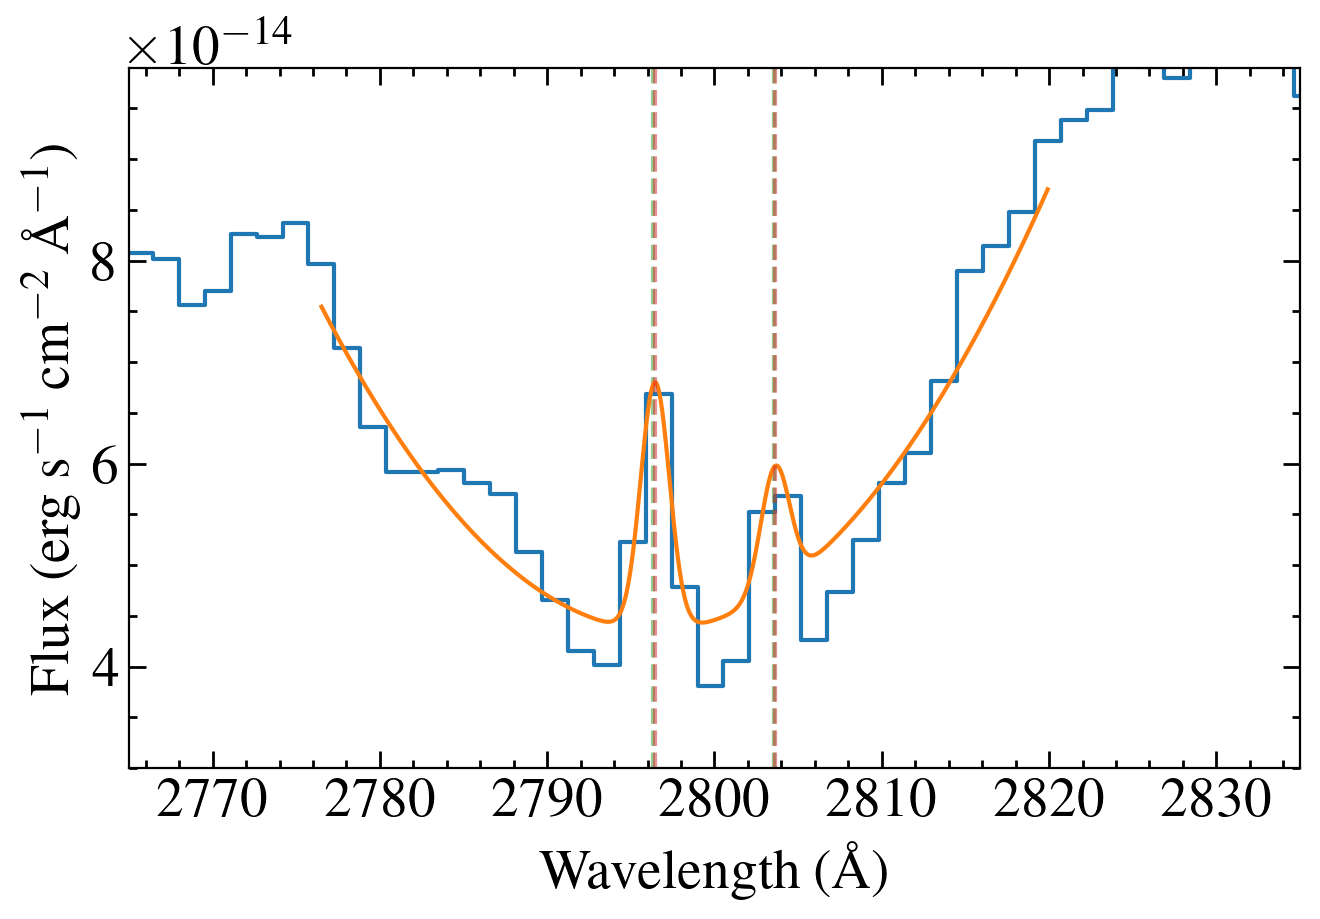

In [84]:
fig, ax = plt.subplots(figsize=(7, 5))

x = 'reextractions/hd120411/{}_x1d.fits'.format(root)
# print(fits.getheader(x, 0)['OPT_ELEM'])
data = fits.getdata(x, 1)[0]
# print(data['A2Center'])
# root = fits.getheader(x, 0)['ROOTNAME']
w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
# mask = w > 1250
#     w, f, e = w[mask], f[mask], e[mask]
ax.step(w, f, where='mid')
# ax.step(w, e, where='mid')
# plt.legend(frameon=True, loc=2)
# plt.xticks(visible=False)
ax.set_xlim(2765, 2835)
ax.set_ylim(0.3e-13, 0.99e-13)

lines=[2796.35, 2803.53]
[ax.axvline(line, ls='--', c='C2', alpha=0.5) for line in lines]
ax.set_xlabel('Wavelength (\AA)')
ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')



mg2 = [2796.352, 2803.53]
os = [6.08e-01, 3.03e-01]

lines = np.copy(mg2)

mask = (w > 2775) & (w < 2820)
wn, fn, en = w[mask], f[mask], e[mask]

# mod = models.Const1D(4e-14)
mod = models.Polynomial1D(2) 
for line in lines:
    line_guess = (20*u.km/u.s).to(u.AA, equivalencies = u.doppler_optical(line*u.AA)).value
    mod = mod+  models.Gaussian1D(amplitude=6e-14, mean = line_guess, stddev=0.5)


def tiedfunc0(mod):
    mean = mod.mean_1.value+np.diff(lines)
    return mean

def tiedamp(mod):
    amplitude = mod.amplitude_1.value/(os[0]/os[1])
    return amplitude

def tiedstd(mod):
    stddev = mod.stddev_1.value
    return stddev

mod.mean_2.tied=tiedfunc0
mod.stddev_2.tied = tiedstd
mod.amplitude_2.tied = tiedamp


mgfit = fitter(mod,wn, fn, maxiter=10000)
wmod = np.arange(wn[0], wn[-1], 0.01)
ax.plot(wmod, mgfit(wmod))

print(mgfit)
mgfit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
print(mgfit_e)

obs_lam = mgfit[1].mean.value
dv = (obs_lam*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA))

dv_e =  np.mean([abs(dv.value -((obs_lam+mgfit_e[-2])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value),
                abs(dv.value -((obs_lam-mgfit_e[-2])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value)])

print(dv, dv_e)

new_mgdv, new_mgdve = dv.value, dv_e

for line in lines:
        obs_line = dv.to(u.AA,  equivalencies=u.doppler_optical(line*u.AA)).value
        ax.axvline(obs_line, c='C3', ls='--', alpha=0.5)


fig.tight_layout()



In [ ]:
print(root)
print(new_mgdv, new_mgdve)
print(target_dv, target_dve)

plt.errorbar(0, new_mgdv, yerr=new_mgdve, marker='o')
plt.errorbar(1, target_dv, yerr=target_dve, marker='o')

Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(2, c0=-0., c1=0., c2=-0.)>

    [1]: <Gaussian1D(amplitude=-0., mean=3939.1098104, stddev=7.83055461)>

    [2]: <Gaussian1D(amplitude=-0., mean=3973.9298104, stddev=7.83055461)>
Parameters:
             c0_0                   c1_0         ...      stddev_2    
    ---------------------- --------------------- ... -----------------
    -7.592545031944506e-11 3.772418516556079e-14 ... 7.830554611301004
[1.33405299e-11 6.67188946e-15 8.34043473e-19 1.14071524e-14
 4.62816072e-01 5.21460512e-01 1.07814503e-14]
330.65272601880116 km / s 39.730385400200305


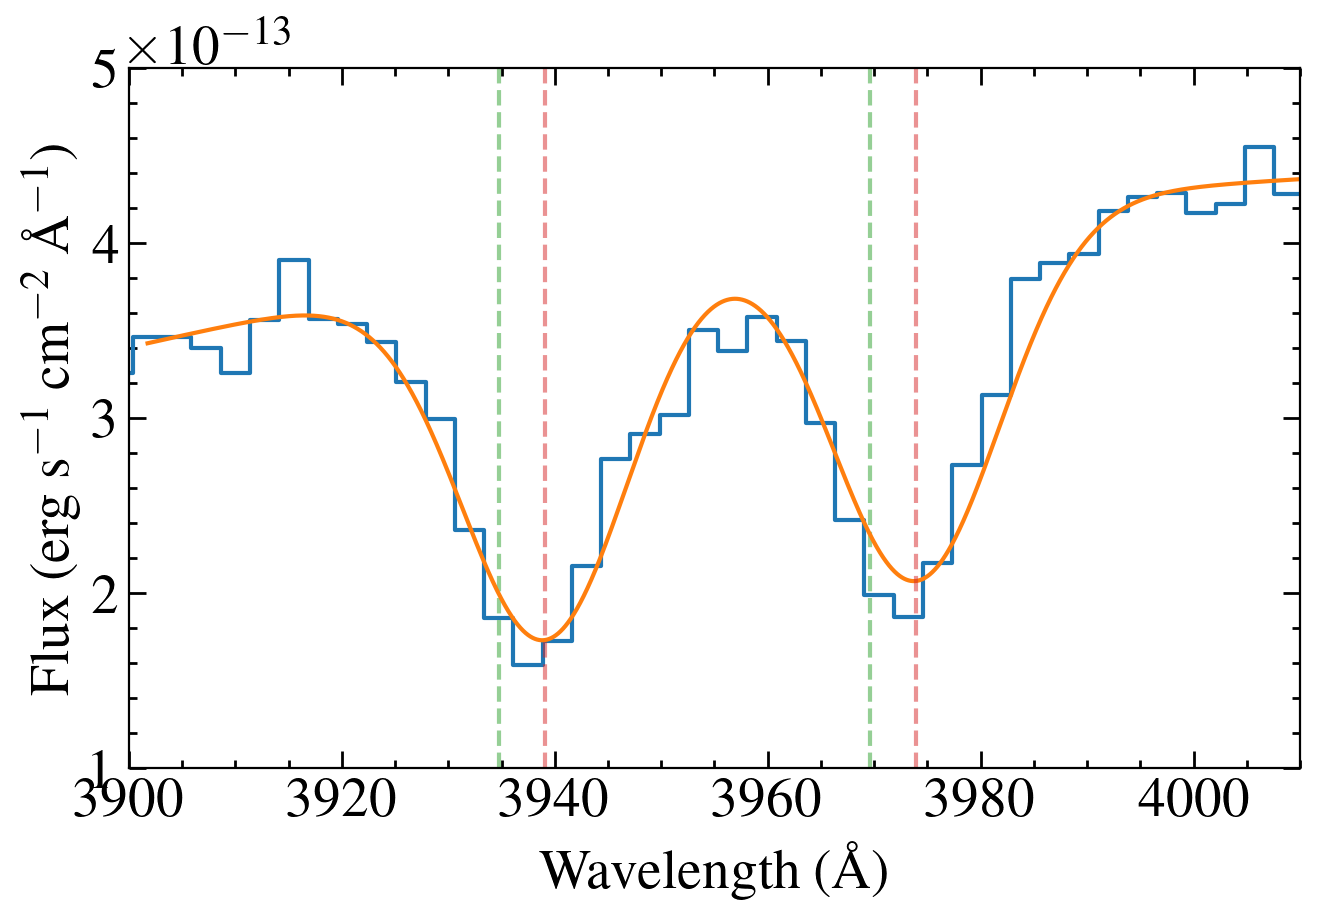

In [86]:
fig, ax = plt.subplots(figsize=(7, 5))

x = g430ls[0]
# print(fits.getheader(x, 0)['OPT_ELEM'])
data = fits.getdata(x, 1)[0]
# print(data['A2Center'])
# root = fits.getheader(x, 0)['ROOTNAME']
w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
# mask = w > 1250
#     w, f, e = w[mask], f[mask], e[mask]
ax.step(w, f, where='mid')
# ax.step(w, e, where='mid')
# plt.legend(frameon=True, loc=2)
# plt.xticks(visible=False)
ax.set_xlim(3900, 4010)
ax.set_ylim(1e-13, 5e-13)

ax.set_xlabel('Wavelength (\AA)')
ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')



# mg2 = [2796.352, 2803.53]
cahk = [3934.77, 3969.59]
# os = [6.08e-01, 3.03e-01]

lines = np.copy(cahk)
[ax.axvline(line, ls='--', c='C2', alpha=0.5) for line in lines]

mask = (w > 3900) & (w < 4100)
wn, fn, en = w[mask], f[mask], e[mask]

# mod = models.Const1D(4e-14)
mod = models.Polynomial1D(2) 
for line in lines:
    line_guess = (15*u.km/u.s).to(u.AA, equivalencies = u.doppler_optical(line*u.AA)).value
    mod = mod+  models.Gaussian1D(amplitude=-1e-13, mean = line_guess, stddev=1.0)


def tiedfunc0(mod):
    mean = mod.mean_1.value+np.diff(lines)
    return mean

def tiedamp(mod):
    amplitude = mod.amplitude_1.value/(os[0]/os[1])
    return amplitude

def tiedstd(mod):
    stddev = mod.stddev_1.value
    return stddev

mod.mean_2.tied=tiedfunc0
mod.stddev_2.tied = tiedstd
# mod.amplitude_2.tied = tiedamp


cafit = fitter(mod,wn, fn, maxiter=10000)
wmod = np.arange(wn[0], wn[-1], 0.01)
ax.plot(wmod, cafit(wmod))

print(cafit)
fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
print(fit_e)

obs_lam = cafit[1].mean.value
dv = (obs_lam*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA))

dv_e =  np.mean([abs(dv.value -((obs_lam+fit_e[-2])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value),
                abs(dv.value -((obs_lam-fit_e[-2])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value)])

print(dv, dv_e)

cadv, cadve = dv.value, dv_e 

for line in lines:
        obs_line = dv.to(u.AA,  equivalencies=u.doppler_optical(line*u.AA)).value
        ax.axvline(obs_line, c='C3', ls='--', alpha=0.5)


fig.tight_layout()




In [87]:
guess = -0.12

x = g430ls[0]
hdr = fits.getheader(x)
cenwave = hdr['CENWAVE']
root = hdr['ROOTNAME']
w = fits.getdata(x, 1)[0]['WAVELENGTH']
mean_plate_scale = np.mean(np.diff(w))
print(mean_plate_scale)
target_shift = cadv - target_dv
print(target_shift)
cenwave_shift = (target_shift*u.km/u.s).to(u.AA,  equivalencies=u.doppler_optical(cenwave*u.AA))
print(cenwave, cenwave_shift)
waveshift = cenwave_shift.value - cenwave
print(waveshift)
pixshift = waveshift/mean_plate_scale
print('Required pixels shift is {:.3f} pixels'.format(pixshift))

shifted_flt = '{}shifts/{}_flt.fits'.format(path, root)
shifted_raw =  '{}shifts/{}_raw.fits'.format(path, root)
# since we have turned off WAVECOR at the beginning, SHIFTA1 should be 0
SHIFTA1 = fits.getval(shifted_flt, "SHIFTA1", 1)
SHIFTA2 = fits.getval(shifted_flt, "SHIFTA2", 1)
SHIFTA1 += pixshift+guess
# update the the SHIFTA1, SHIFTA1 keywords in the _raw fits file first science extension
fits.setval(shifted_raw, "SHIFTA1", value=SHIFTA1, ext=1)
fits.setval(shifted_raw, "SHIFTA2", value=SHIFTA2, ext=1)

fits.setval(shifted_raw, "WAVECORR", value="OMIT", ext=0)
assert fits.getval(shifted_raw, keyword="WAVECORR", ext=0) == "OMIT"

res = stistools.calstis.calstis(shifted_raw, verbose=False, outroot='reextractions/hd120411/')
assert res == 0, f"CalSTIS exited with an error:  {res}"
    
    
    

2.7449993266408637
325.2527260188012
4300 4304.665183144403 Angstrom
4.665183144403272
Required pixels shift is 1.700 pixels

*** CALSTIS-0 -- Version 3.4.2 (19-Jan-2018) ***
Begin    10-Dec-2024 21:40:21 MST

Input    /media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo28040_raw.fits
Outroot  reextractions/hd120411/oeoo28040_raw.fits

*** CALSTIS-1 -- Version 3.4.2 (19-Jan-2018) ***
Begin    10-Dec-2024 21:40:22 MST
Input    /media/david/2tb_ext_hd/hddata/meats/hst/hd120411/shifts/oeoo28040_raw.fits
Output   reextractions/hd120411/oeoo28040_blv_tmp.fits
OBSMODE  ACCUM
APERTURE 52X0.2
OPT_ELEM G430L
DETECTOR CCD

Imset 1  Begin 21:40:22 MST
Epcfile  oeoo28amj_epc.fits
Warning  EPCTAB `oeoo28amj_epc.fits' not found.

CCDTAB   oref$16j1600do_ccd.fits
CCDTAB   PEDIGREE=INFLIGHT 01/05/2009 01/05/2009
CCDTAB   DESCRIP =Updated amp=D gain=4 atodgain and corresponding readnoise values---
CCDTAB   DESCRIP =Proposal 8057, by I. Dashevsky & P. Goudfrooij

DQICORR  PERFORM
DQITAB   oref$

AssertionError: CalSTIS exited with an error:  1

Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(2, c0=-0., c1=0., c2=0.)>

    [1]: <Gaussian1D(amplitude=-0., mean=3934.94393202, stddev=8.02818476)>

    [2]: <Gaussian1D(amplitude=-0., mean=3969.76393202, stddev=8.02818476)>
Parameters:
             c0_0                   c1_0          ...      stddev_2    
    ---------------------- ---------------------- ... -----------------
    -8.839756008514295e-13 2.6078319936795625e-16 ... 8.028184762944228
[1.64909594e-11 8.24447004e-15 1.03027683e-18 1.40612493e-14
 5.68183123e-01 6.55501297e-01 1.31647508e-14]
13.251983577660697 km / s 49.94303229769213


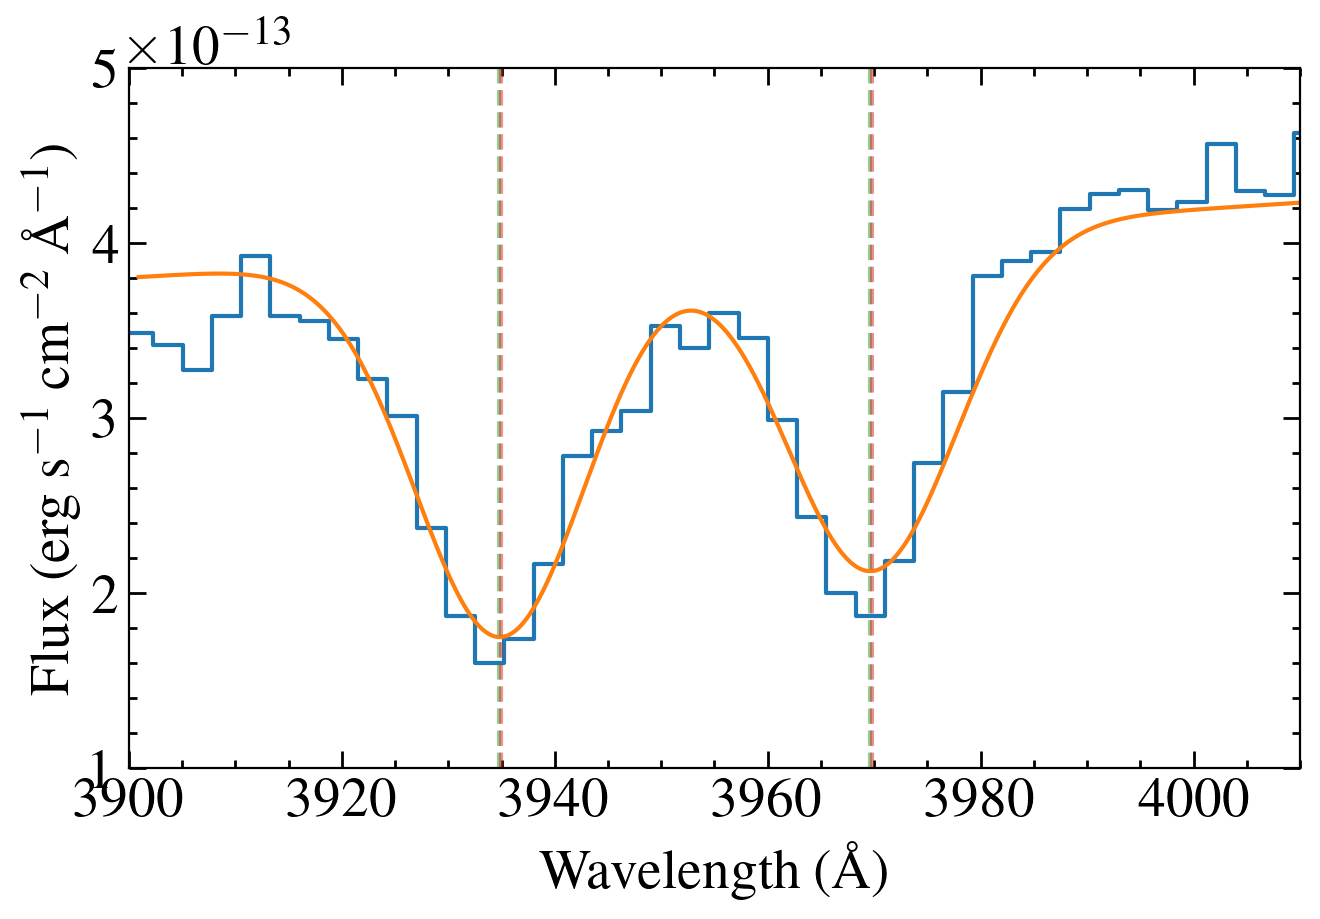

In [88]:
fig, ax = plt.subplots(figsize=(7, 5))

x = 'reextractions/hd120411/{}_sx1.fits'.format(root)

# print(fits.getheader(x, 0)['OPT_ELEM'])
data = fits.getdata(x, 1)[0]
# print(data['A2Center'])
# root = fits.getheader(x, 0)['ROOTNAME']
w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
# mask = w > 1250
#     w, f, e = w[mask], f[mask], e[mask]
ax.step(w, f, where='mid')
# ax.step(w, e, where='mid')
# plt.legend(frameon=True, loc=2)
# plt.xticks(visible=False)
ax.set_xlim(3900, 4010)
ax.set_ylim(1e-13, 5e-13)

ax.set_xlabel('Wavelength (\AA)')
ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')



# mg2 = [2796.352, 2803.53]
cahk = [3934.77, 3969.59]
# os = [6.08e-01, 3.03e-01]

lines = np.copy(cahk)
[ax.axvline(line, ls='--', c='C2', alpha=0.5) for line in lines]

mask = (w > 3900) & (w < 4100)
wn, fn, en = w[mask], f[mask], e[mask]

# mod = models.Const1D(4e-14)
mod = models.Polynomial1D(2) 
for line in lines:
    line_guess = (-15*u.km/u.s).to(u.AA, equivalencies = u.doppler_optical(line*u.AA)).value
    mod = mod+  models.Gaussian1D(amplitude=-1e-13, mean = line_guess, stddev=1.0)


def tiedfunc0(mod):
    mean = mod.mean_1.value+np.diff(lines)
    return mean

def tiedamp(mod):
    amplitude = mod.amplitude_1.value/(os[0]/os[1])
    return amplitude

def tiedstd(mod):
    stddev = mod.stddev_1.value
    return stddev

mod.mean_2.tied=tiedfunc0
mod.stddev_2.tied = tiedstd
# mod.amplitude_2.tied = tiedamp


cafit = fitter(mod,wn, fn, maxiter=10000)
wmod = np.arange(wn[0], wn[-1], 0.01)
ax.plot(wmod, cafit(wmod))

print(cafit)
fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
print(fit_e)

obs_lam = cafit[1].mean.value
dv = (obs_lam*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA))

dv_e =  np.mean([abs(dv.value -((obs_lam+fit_e[-2])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value),
                abs(dv.value -((obs_lam-fit_e[-2])*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lines[0]*u.AA)).value)])

print(dv, dv_e)

new_cadv, new_cadve = dv.value, dv_e 

for line in lines:
        obs_line = dv.to(u.AA,  equivalencies=u.doppler_optical(line*u.AA)).value
        ax.axvline(obs_line, c='C3', ls='--', alpha=0.5)


fig.tight_layout()




In [ ]:
print(root)
print(new_cadv, new_cadve)
print(target_dv, target_dve)

plt.errorbar(0, new_cadv, yerr=new_cadve, marker='o')
plt.errorbar(1, target_dv, yerr=target_dve, marker='o')

In [ ]:
import prepare_stis

x1dpath = 'reextractions/hd120411/'
savepath = 'draft_hlsp/hd120411/'
hlsp = 'meats_hlsp_info.csv'
version = 1
prepare_stis.make_stis_spectrum(x1dpath, version, hlsp, savepath = savepath, plot=True, save_fits=True, normfac=1.0, star = 'hd-120411')

Ok so why? Looking at the jit files

In [97]:
jits = glob.glob('{}*jit.fits'.format(path))
jits

['/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27010_jit.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27020_jit.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27030_jit.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo27040_jit.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28010_jit.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28020_jit.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28030_jit.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/hd120411/oeoo28040_jit.fits']

In [98]:
fits.getdata(jits[0], 1).names

['Seconds',
 'V2_dom',
 'V3_dom',
 'V2_roll',
 'V3_roll',
 'SI_V2_AVG',
 'SI_V2_RMS',
 'SI_V2_P2P',
 'SI_V3_AVG',
 'SI_V3_RMS',
 'SI_V3_P2P',
 'RA',
 'DEC',
 'Roll',
 'LimbAng',
 'TermAng',
 'LOS_Zenith',
 'Latitude',
 'Longitude',
 'Mag_V1',
 'Mag_V2',
 'Mag_V3',
 'BrightLimb',
 'FGS_flags',
 'DayNight',
 'Recenter',
 'TakeData',
 'SlewFlag']

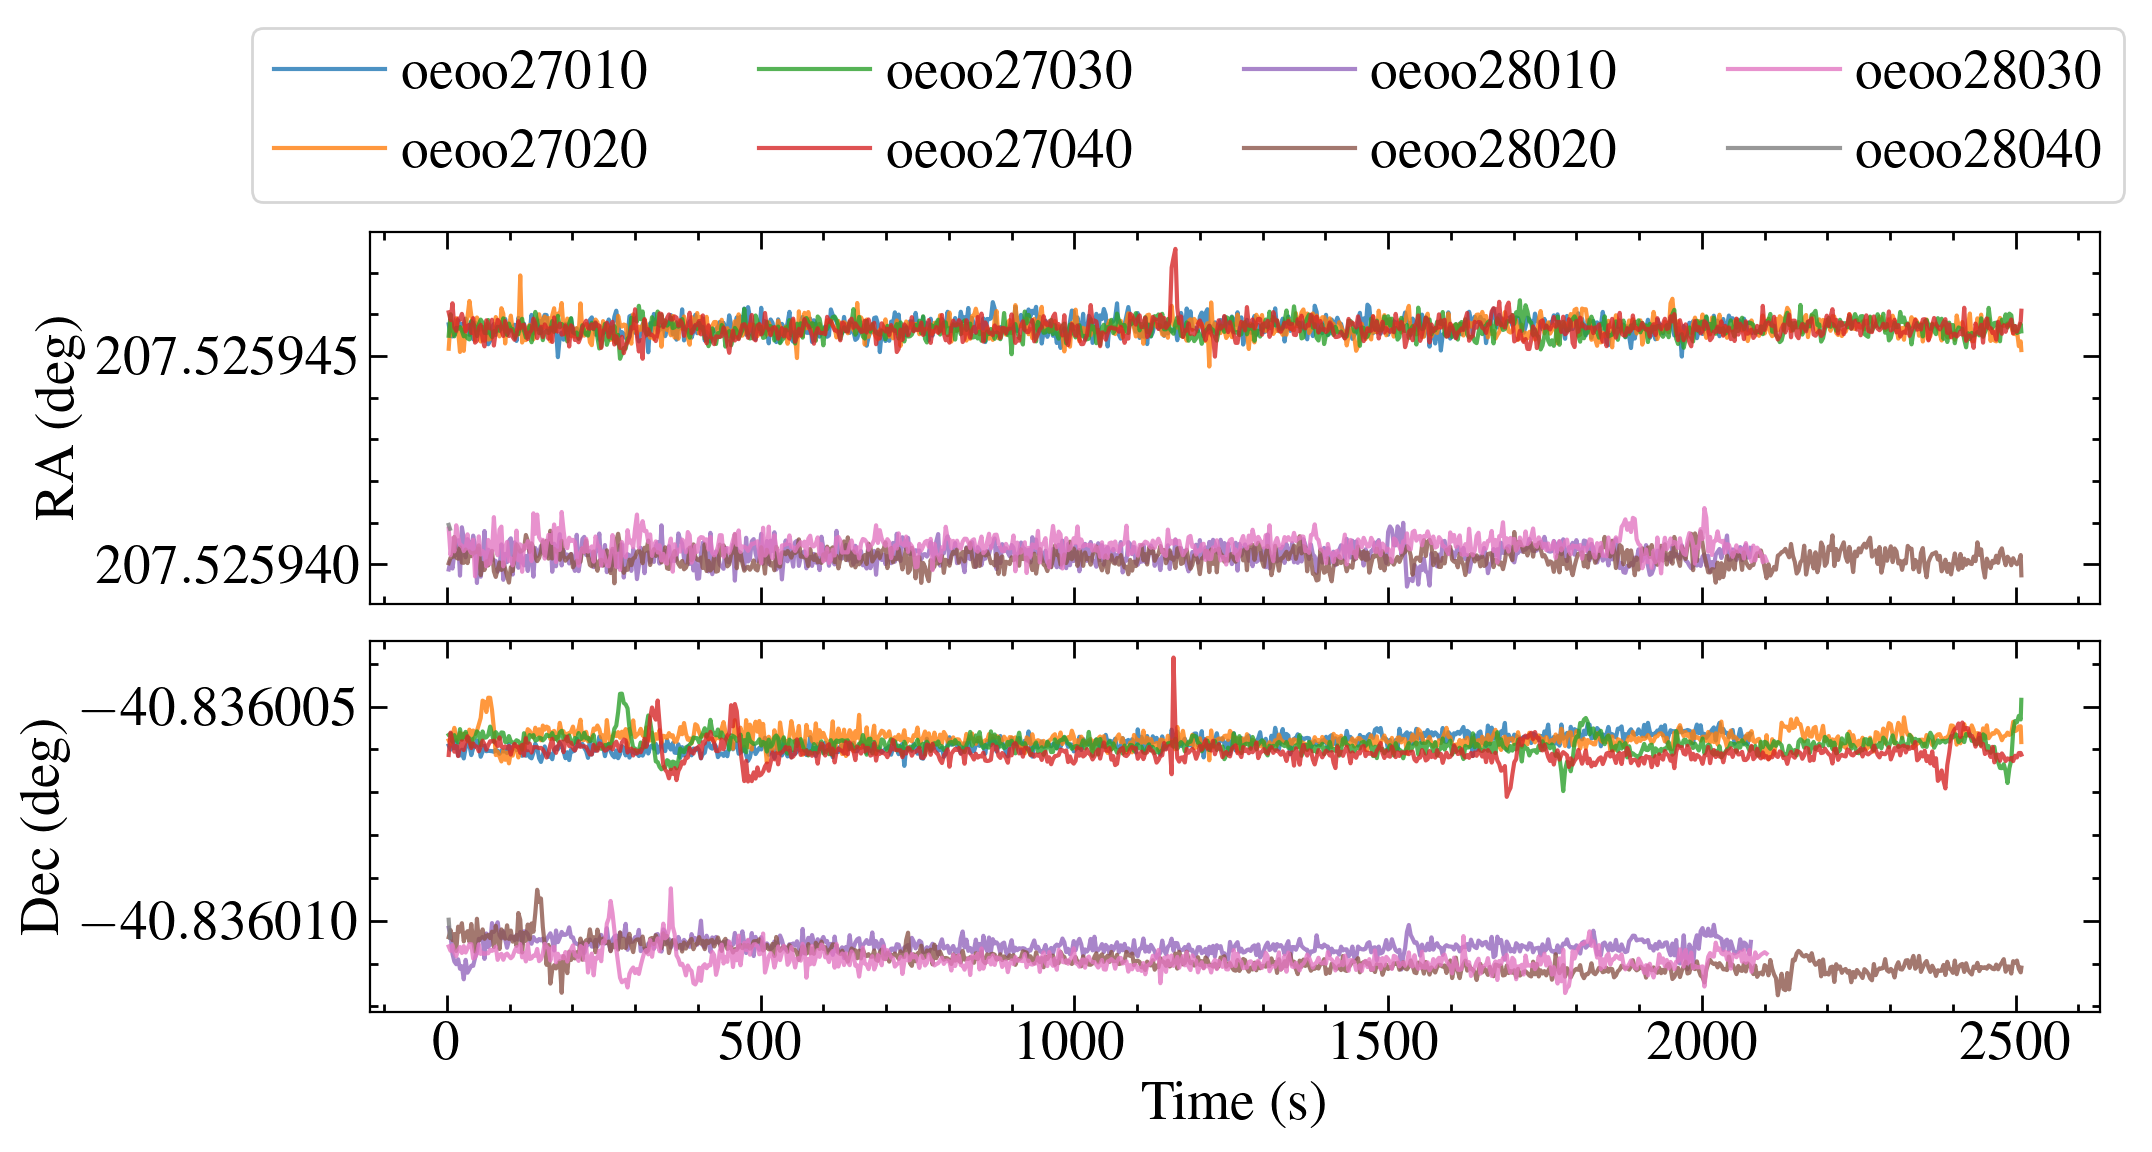

In [132]:
fig, axes = plt.subplots(nrows =2, sharex=True, figsize=(11, 6))

for jit in jits:
    data = fits.getdata(jit, 1)
    root = fits.getheader(jit, 0)['ROOTNAME']
    time, ra, dec = data['Seconds'], data['RA'], data['DEC']
    axes[0].plot(time, ra, label = root, alpha=0.8)
    axes[1].plot(time, dec, alpha=0.8)


axes[0].get_xaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=False))
axes[0].get_yaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=False))
axes[1].get_xaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=False))
axes[1].get_yaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=False))

axes[0].set_ylabel('RA (deg)')
axes[1].set_ylabel('Dec (deg)')
axes[1].set_xlabel('Time (s)')


lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines, labels)

fig.legend(lines, labels, loc='outside upper right',
          frameon=True, ncol=4, shadow=False)

fig.tight_layout()
fig.subplots_adjust(hspace=0.1, top=0.8)

In [141]:
# fig, ax = plt.subplots(figsize=(5, 5))

# for jit in jits:
#     data = fits.getdata(jit, 1)
#     root = fits.getheader(jit, 0)['ROOTNAME']
#     time, ra, dec = data['Seconds'], data['RA'], data['DEC']
#     ax.plot(ra, dec, alpha=0.7)

# ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=False))
# ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=False))